# Machine learning
Field of study that gives computers the capability to learn without being explicitly programmed.Ml algorithms can give you insights about a set of data without you having to write any custom code specific to the problem.Instead of writing code, you feed data to the algorithm and it builds its own logic based on the data.

# Model
A model is a specific representation learned from data by applying some machine learning algorithm. A model is also called hypothesis.

# Feature
A feature is an individual measurable property of our data. A set of numeric features can be conveniently described by a feature vector. Feature vectors are fed as input to the model. For example, in order to predict a fruit, there may be features like color, smell, taste, etc.

# Target (Label)
A target variable or label is the value to be predicted by our model. For the fruit example discussed in the features section, the label with each set of input would be the name of the fruit like apple, orange, banana, etc.

# Training
The idea is to give a set of inputs(features) and it’s expected outputs(labels), so after training, we will have a model (hypothesis) that will then map new data to one of the categories trained on.

# Prediction
Once our model is ready, it can be fed a set of inputs to which it will provide a predicted output(label).

# Ml steps
1) Data Collection 
2) Data Pre Processing
3) Divide the input data into training,cross-validation and test sets.
4) Building models with suitable algorithms and techniques on the training set.
5) Testing our conceptualized model with data which was not fed to the model at the time of training 
6) evaluating its performance using metrics such as F1 score, precision and recall.

# Preprocessing 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.compose import ColumnTransformer

In [ ]:
# Feature Scaling:-
# Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. 
# It is performed during the data pre-processing to handle highly varying magnitudes or values
# If feature scaling is not done, then a machine learning algorithm tends to weigh greater values higher 
# and consider smaller values as the lower values

In [ ]:
# min-max normalization:-
# This technique re-scales a feature or observation value with distribution value between 0 and 1.

In [ ]:
# standardization:-
# It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean and std 1.

In [3]:
dataset = pd.read_csv('data/Data.csv')
x = dataset.iloc[:, 1:3].values
print("data",x)
# Taking care of missing data compute method is mean 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x = imputer.fit_transform(x)
# Feature Scaling
sc_x = StandardScaler()
x_scaled = sc_x.fit_transform(x)
print("scaled data",x_scaled)
# normalisation 
norm_x = MinMaxScaler(feature_range=(0,1))
x_norm = norm_x.fit_transform(x)
print("normalised data",x_norm)

data [[4.4e+01 7.2e+04]
 [2.7e+01 4.8e+04]
 [3.0e+01 5.4e+04]
 [3.8e+01 6.1e+04]
 [4.0e+01     nan]
 [3.5e+01 5.8e+04]
 [    nan 5.2e+04]
 [4.8e+01 7.9e+04]
 [5.0e+01 8.3e+04]
 [3.7e+01 6.7e+04]]
scaled data [[ 7.58874362e-01  7.49473254e-01]
 [-1.71150388e+00 -1.43817841e+00]
 [-1.27555478e+00 -8.91265492e-01]
 [-1.13023841e-01 -2.53200424e-01]
 [ 1.77608893e-01  6.63219199e-16]
 [-5.48972942e-01 -5.26656882e-01]
 [ 0.00000000e+00 -1.07356980e+00]
 [ 1.34013983e+00  1.38753832e+00]
 [ 1.63077256e+00  1.75214693e+00]
 [-2.58340208e-01  2.93712492e-01]]
normalised data [[0.73913043 0.68571429]
 [0.         0.        ]
 [0.13043478 0.17142857]
 [0.47826087 0.37142857]
 [0.56521739 0.45079365]
 [0.34782609 0.28571429]
 [0.51207729 0.11428571]
 [0.91304348 0.88571429]
 [1.         1.        ]
 [0.43478261 0.54285714]]


In [ ]:
# categorical data
# two types(nominal, ordinal:- where ordinal is oredered based on ranking where nominal is not)
# example of ordinal:- education level (“high school”,”BS”,”MS”,”PhD”)
# Label Encoding:- refers to converting the labels into numeric form ex:- Height(Tall, Medium, Straight:- [0,1,2])
# one hot encoder:-
# It refers to splitting the column which contains numerical categorical data to many columns depending on 
# the number of categories present in that column. 
# Each column contains “0” or “1” corresponding to which column it has been placed
# this is also called creating dummy variables 
# avoid dummy variable trap by always removing last one:- len(dummy var) - 1   
# white black (1,2):- white:- (0,1) no need of black  
# it will eliminate multi colinearity in which two or more explanatory variables in a multiple regression model 
# are highly linearly related. 
# The Variance Inflation Factor (VIF) measures the impact of collinearity among the variables in a 
# regression model. The Variance Inflation Factor (VIF) is 1/Tolerance,

In [15]:
X = dataset.iloc[:, :-1].values
print('data',X)
# replace missing data with mean 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
print('labelled data',sorted(list(X[:,0])))
print('inversed label data:',labelencoder_X.inverse_transform(sorted(list(X[:, 0]))))
# below 0 indicates 1st column 
transformer = ColumnTransformer(
    transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [0]              # The column(s) to be applied on.
         )
    ]
)
X = transformer.fit_transform(X)
print('one hot encoded data',X)

data [['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
labelled data [0, 0, 0, 0, 1, 1, 1, 2, 2, 2]
inversed label data: ['France' 'France' 'France' 'France' 'Germany' 'Germany' 'Germany' 'Spain'
 'Spain' 'Spain']
one hot encoded data [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [10]:
ls = ['a','b','c','a','b','d']
lb = LabelEncoder()
new_ls = lb.fit_transform(ls)
inverse_ls = lb.inverse_transform(new_ls)
print(new_ls,':',inverse_ls)

[0 1 2 0 1 3] : ['a' 'b' 'c' 'a' 'b' 'd']


In [ ]:
# dict vectorizer for categorical var(one hot encoding)
# one hot encoding for categorical variables using dictvectorizer
# Transforms lists of feature-value mappings to vectors.This transformer turns lists of mappings 
# (dict-like objects) of feature names to feature values into Numpy arrays

In [15]:
sales_data = [
   {'sales': 850000,  'day': 'Monday'},
   {'sales': 700000,  'day': 'Wednesday'},
   {'sales': 650000,  'day': 'Thursday'},
   {'sales': 600000,  'day': 'Wednesday'}
]
from sklearn.feature_extraction import DictVectorizer
##onehotencode the categorical column
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(sales_data)
vec.get_feature_names()

['day=Monday', 'day=Thursday', 'day=Wednesday', 'sales']

In [ ]:
# using train test split we can create training, testing and validation sets for both x and y 
# random split:- Controls the shuffling applied to the data before applying the split. Pass an int 
# for reproducible output across multiple function calls.

In [18]:
titanic = pd.read_csv('data/titanic_cleaned.csv')
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# supervised learning
training algorithm is like a teacher supervising the whole process.
the training data will consist of inputs paired with the correct outputs.
Training alg search for patterns in the data that correlate with the desired outputs. 
After training, algorithm will take in new unseen inputs and determines which label the new inputs be classified based on training data. 
The objective of a supervised learning model is to predict the correct label for newly presented input data.

## Regression
model attempts to find the important relationship between dependent and independent variables. The goal of a regression algorithm is to predict a continuous number such as sales, income, and test scores

## Classification
Logistic Regression is used when the dependent variable(target) is categorical.<br>
Example:-<br>
To predict whether an email is spam (1) or (0)
Whether the tumor is malignant (1) or not (0)

<h1 style="color:skyblue">Linear Regression</h1><br>
Linear regression is used for finding linear relationship between target and one or more predictors. There are two types of linear regression- Simple and Multiple.

# Simple Linear Regression
Simple linear regression is useful for finding relationship between two continuous variables. One is predictor or independent variable and other is response or dependent variable
Using the training data, a regression line is obtained which will give minimum error. This linear equation is then used for any new data
Y(pred) = mx + c (m:-weight/slope, c:-bias/intercept)

## Gradient Descent
update the value of m and c, such that the line corresponding to those values is the best fitting line or gives the minimum error(mean squared error).
Gradient Descent is an optimization alg used to minimize the cost function by iteratively moving in the direction of the steepest descent. Size of each step is determined by parameter α known as Learning Rate. The cost function is the technique of evaluating “the performance of our algorithm/model”. It takes both predicted outputs by the model and actual outputs and calculates how much wrong the model was in its prediction. It outputs a higher number if our predictions differ a lot from the actual values.

# Multiple linear Regression 
Y = b0 + b1 * x1 + b2 * x2 + b3 * x3 + …… bn * xn <br>
Y = Dependent variable and x1, x2, x3, …… xn = multiple independent variables
## Assumptions
Linearity: The relationship between dependent and independent variables should be linear.
Homoscedasticity: Constant variance of the errors should be maintained.
Multivariate normality: Multiple Linear Regression assumes that the residuals are normally distributed.
Lack of Multicollinearity: Multicollinearity occurs in regression analysis when two or more independent variables are highly correlated, meaning they provide redundant information about the dependent variable.It is assumed that there is little or no multicollinearity in the data.
### Collinearity
Collinearity is a condition in which some of the independent variables are highly correlated. Why is this a problem? Collinearity tends to inflate the variance of at least one estimated regression coefficient,ˆβj . This can cause at least some regression coefficients to have the wrong sign.

## Building Model(Step wise regression)
1)Backward Elimination 
2)Forward Selection 
<br>
They are two popular feature selection techniques used in linear regression to identify the most relevant predictors (independent variables). They help in building a simpler and more interpretable model by eliminating irrelevant or redundant features.
Based on p value(statistically significance level)
<br>
1. Forward Selection:
Start with no predictors.
Add one feature at a time that improves the model the most (based on p-value).
Stop when no further improvement is seen.
2. Backward Elimination:
Start with all predictors.
Remove the least significant feature (based on p-value).
Repeat until all remaining features are significant.
3. Stepwise Regression:
Combines Forward Selection and Backward Elimination.
Start with no predictors or a full model.
Add or remove features at each step based on a chosen criterion.
Continue until no significant changes occur.

## Performance Metrics
R squared:-  how well the regression line fits with the actual results; proportion of the variance in the dependent variable that is predictable from the independent variable(s).
Adjusted R square:- adding more predictors (x variables) will always increase the R-squared, making it inaccurate as the predictors increase.
The adjusted R-squared on the other hand, accounts for the increase in number of predictors and it increases only if it decreases overall error of predictions.    

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as prfs_score
import joblib

In [ ]:
"""
The problem that we are going to solve here is that given a set of features that describe a house in Boston, 
our machine learning model must predict the house price
"""

In [4]:
# importing the data 
USAhousing = pd.read_csv('data/USA_Housing.csv')
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [5]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
# fit the data 
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [6]:
# pickle the model 
joblib.dump(lm, 'data/LR_model.pkl')

['data/LR_model.pkl']

In [7]:
# load the pickled model 
lr_model = joblib.load('data/LR_model.pkl')
lr_model

LinearRegression()

In [8]:
# intercepts and coefficients 
print('intercept:',lr_model.intercept_)
coeff_df = pd.DataFrame(lr_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

intercept: -2640159.796852677


Coefficient
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

In [9]:
# predict
predictions = lr_model.predict(X_test)

In [10]:
# visalisations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

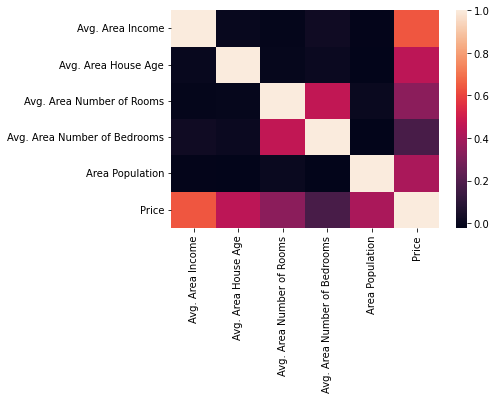

In [20]:
# correlation matrix
sns.heatmap(USAhousing.corr())

Text(0, 0.5, 'price')

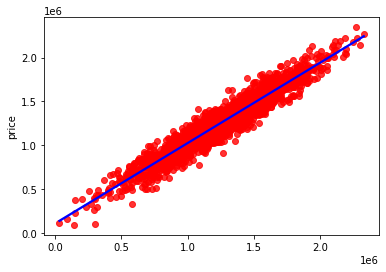

In [21]:
# viz regression 
df_pred = {'actual':y_test, 'predicted':predictions}
sns.regplot(x='actual',y='predicted',data=df_pred, scatter_kws={"color": "red"},line_kws={"color": "blue"})
plt.xlabel('')
plt.ylabel('price')

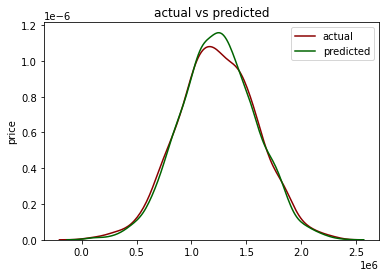

In [22]:
# viz distribution of y-actual and predicted,it shows here almost similar meaning predicted well
sns.distplot(df_pred['actual'], color='darkred', hist=False)
sns.distplot(df_pred['predicted'], color='darkgreen', hist=False)
plt.legend(['actual', 'predicted'])
plt.title('actual vs predicted')
plt.xlabel('')
plt.ylabel('price')
plt.show()

In [40]:
# accuracy(R2)
lr_model.score(X,y)

0.9179558725201059

In [41]:
# loss function(MSE)
metrics.mean_squared_error(y_test, predictions)

10460958907.208992

<h1 style="color:skyblue">Polynomial regression</h1><br>
Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial
<br>
These are basically used to define or describe non-linear phenomenon such as:<br>
Growth rate of tissues.<br>
Progression of disease epidemics<br>
Distribution of carbon isotopes in lake sediments<br>
y = a + b1x + b2x^2 +....+ bnx^n

## Bias Variance Tradeoff
Bias:- refers to the error due to the model’s simplistic assumptions in fitting the data. A high bias means that the model is unable to capture the patterns in the data and this results in under-fitting.
<br>
Variance:- refers to the error due to the complex model trying to fit the data. High variance means the model passes through most of the data points and it results in over-fitting the data.
<br>
as the model complexity increases, the bias decreases and the variance increases and vice-versa. Ideally, a machine learning model should have low variance and low bias. But practically it’s impossible to have both. Therefore to achieve a good model that performs well both on the train and unseen data, a trade-off is made.

In [ ]:
# we predict salaries based on position levels 

In [14]:
dataset = pd.read_csv('data/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [15]:
dataset

Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000

In [16]:
# polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [17]:
# fit polynomial features with degree 4
# y = a + b1x + b2x^2 + b3x^3 + b4x^4
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
# then fit linear regression 
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
print('data\n',X)
print('poly features\n',X_poly)

data
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
poly features
 [[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


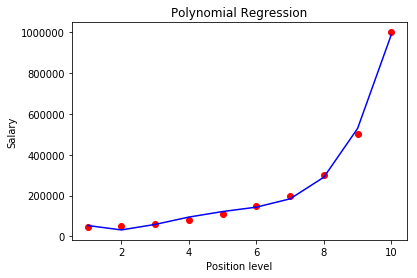

In [19]:
# visualise polynomial regression
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [20]:
# accuracy
lin_reg_2.score(poly_reg.fit_transform(X),y)

0.9973922891706614

In [21]:
# loss function
metrics.mean_squared_error(y,lin_reg_2.predict(poly_reg.fit_transform(X)))

210343822.84382468

In [22]:
# parameters
lin_reg_2.coef_

array([      0.        , -211002.33100292,   94765.44289063,
        -15463.28671331,     890.15151515])

<h1 style="color:skyblue">Logistic Regression</h1><br>
Logistic regression is a classification algorithm used to assign observations to a discrete set of classes
logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.<br>
Types of logistic regression<br>
Binary (Pass/Fail)<br>
Multi (Cats, Dogs, Sheep)<br>
Ordinal (Low, Medium, High)<br>
In order to map predicted values to probabilities, we use the sigmoid function. The function maps any real value into another value between 0 and 1<br>
𝑆(𝑧)=π=1/1+𝑒−𝑧(z is linear fn; e is natural log)<br>
Decision boundary:-<br>
In order to map above probabilities to a discrete class (true/false, cat/dog), we select a threshold value or tipping point above which we will classify values into class 1 and below which we classify values into class 2.<br>
p>=0.5->class=1;p<0.5->class=0<br>
For logistic regression with multiple classes we could select the class with the highest predicted probability.<br>
cost function:- cross entropy(log loss) increases as the predicted probability diverges from the actual label.

## performance measures of log reg(confusion matrix)
True Positive:You predicted positive and it’s true.<br>
True Negative:You predicted negative and it’s true.<br>
False Positive:(Type 1 Error) You predicted positive and it’s false.<br>
False Negative:(Type 2 Error) You predicted negative and it’s false.<br>
Recall/TPR(rate)/sensitivity:Out of all the positive classes, how much we predicted correctly. It should be high as possible. TP/TP+FN<br>
Precision:Out of all the positive classes we have predicted , how many are actually positive. TP /TP+FP<br>
Accuracy:Out of all the classes, how much we predicted correctly TP+TN/total<br> 
F Score:- F-score helps to measure Recall and Precision at the same time using harmonic mean 2.Recall.Precision/Recall+precision<br>
specificity:TN/TN+FP
FPR: 1 - specificity; FP/TN+FP  

## AUROC(Area Under the Receiver Operating Characteristics Curve)
we can use AUC - ROC Curve when we need to check or visualize the performance of the multi - class classification problem<br>
ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes; Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s<br>
An excellent model has AUC near to the 1 which means it has good measure of separability. A poor model has AUC near to the 0 which means it has worst measure of separability

In [ ]:
# titanic dataset:- survival or deceased 

In [116]:
train = pd.read_csv('data/titanic_train.csv')
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [117]:
# pre processing

# remove columns that we dont want here i.e Cabin
train.drop('Cabin',axis=1,inplace=True)

# missing values  
# impute 
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
# drop missing value 
train.dropna(inplace=True)

# handle categorical var same as one hot encoding and remove the first to avoid dummy trap 
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

# concat training data with sex and embark df 
train = pd.concat([train,sex,embark],axis=1)

In [118]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [121]:
# train
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
# test
predictions = logmodel.predict(X_test)
# probability of the sample for each class in the model
predictions_prob = logmodel.predict_proba(X_test)

In [123]:
print(X_test.head())
print(predictions[:5])
print(predictions_prob[:5])

     PassengerId  Pclass   Age  SibSp  Parch    Fare  male  Q  S
511          512       3  24.0      0      0    8.05     1  0  1
613          614       3  24.0      0      0    7.75     1  1  0
615          616       2  24.0      1      2   65.00     0  0  1
337          338       1  41.0      0      0  134.50     0  0  0
718          719       3  24.0      0      0   15.50     1  1  0
[0 0 1 1 0]
[[0.85246519 0.14753481]
 [0.89974031 0.10025969]
 [0.20831073 0.79168927]
 [0.1090127  0.8909873 ]
 [0.89343782 0.10656218]]


In [124]:
# evaluation metrics 
print(metrics.classification_report(y_test,predictions))
print([f"{round(score*100,2)}%" for score in list(prfs_score(y_test,predictions,average='binary')) if score != None]) 

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.83      0.64      0.72       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267

['82.72%', '64.42%', '72.43%']


In [125]:
# confusion metrics 
print('TP  FP\nFN  TN\n')
print(metrics.confusion_matrix(y_test,predictions))

TP  FP
FN  TN

[[149  14]
 [ 37  67]]


In [ ]:
# MNIST hand written digit id  

In [107]:
from sklearn.datasets import load_digits
digits = load_digits()

In [108]:
# Print to show there are 1797 images (8 by 8 resolution images for a dimensionality of 64)
print("Image Data Shape",digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape",digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [109]:
import numpy as np 

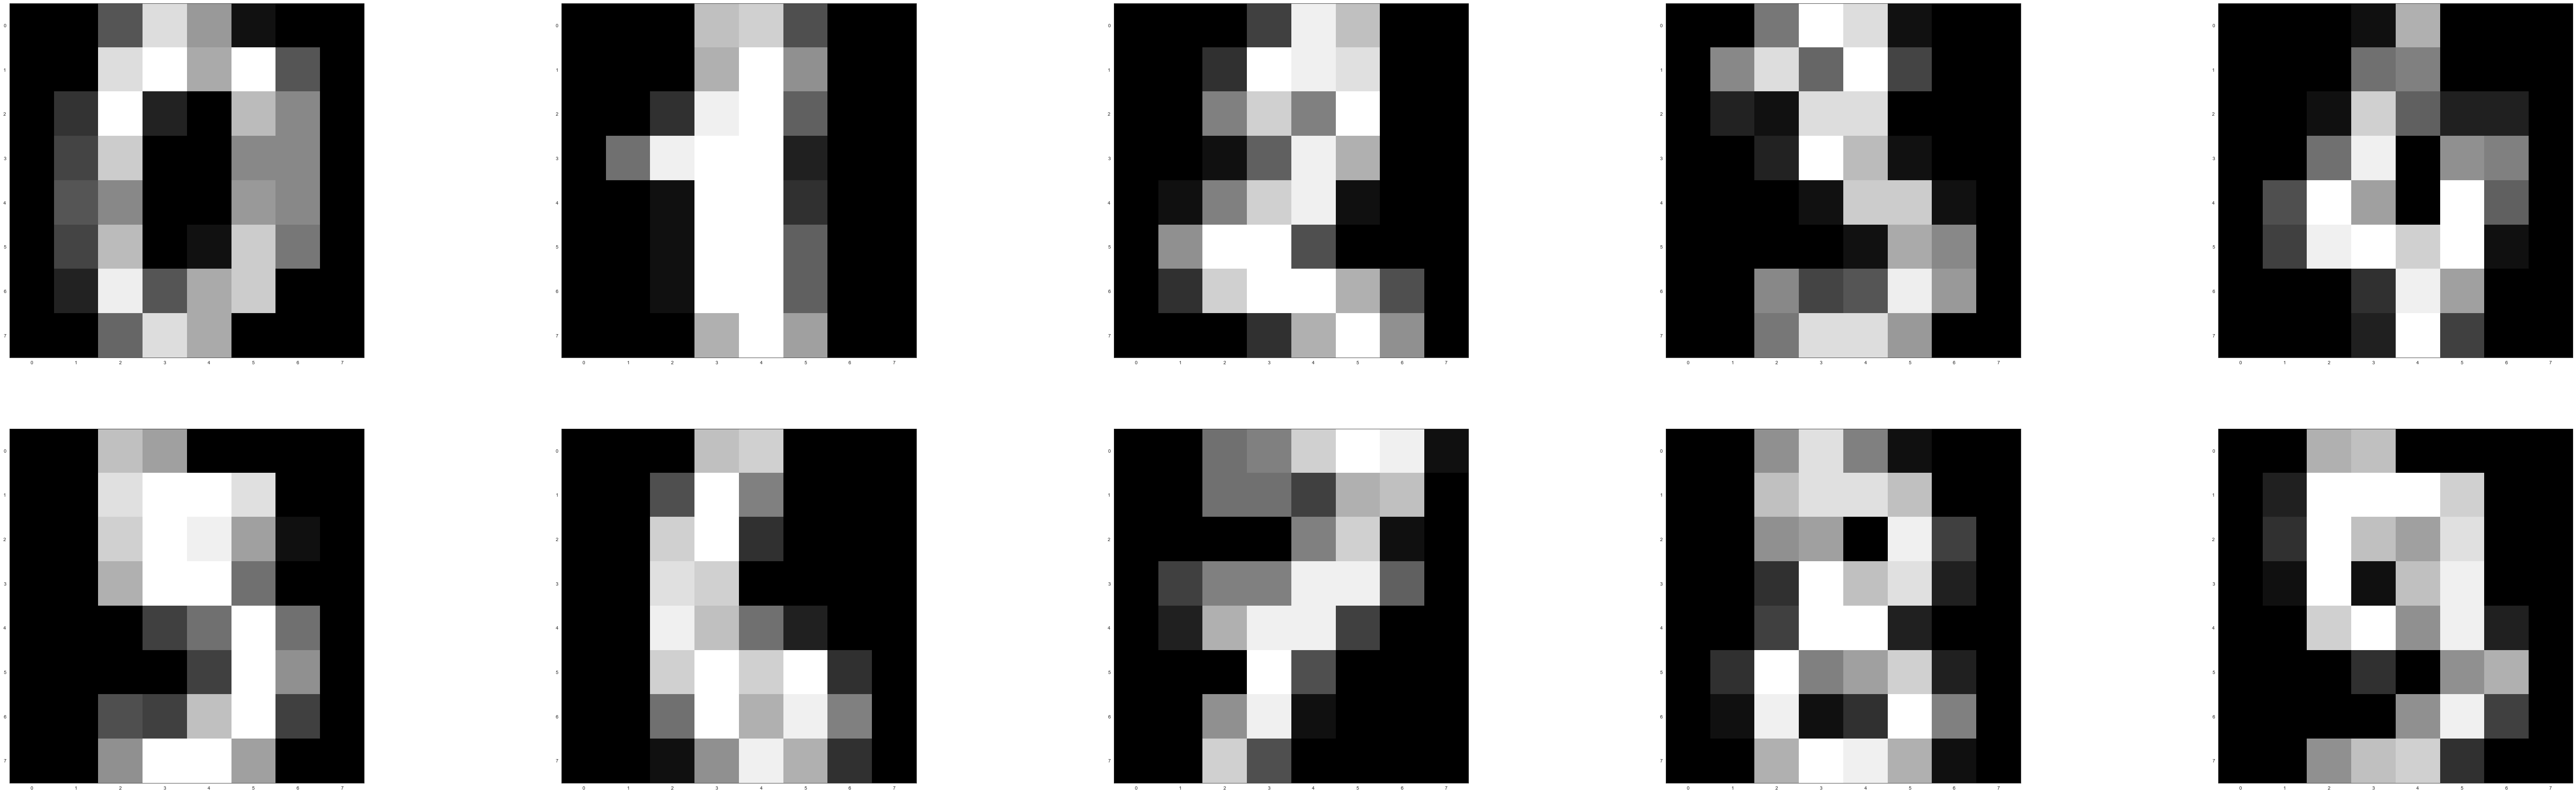

In [110]:
# viz the digits 
plt.figure(figsize=(100,30))
for index,image in enumerate(digits.data[0:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)

In [111]:
# test train split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [112]:
# train
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
# classes
logmodel.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [115]:
# predict
predictions = logmodel.predict(x_test[0:10])
# probability of the sample for each class in the model
predictions_prob = logmodel.predict_proba(x_test[0:10])
print(predictions,'\n', predictions_prob)

[2 8 2 6 6 7 1 9 8 5] 
 [[2.37159106e-14 1.83775275e-12 9.99999999e-01 3.54256336e-11
  9.24368545e-17 3.37951424e-11 1.28529020e-18 5.29572236e-10
  4.62408961e-12 2.95942370e-15]
 [7.18730415e-08 3.41521923e-04 8.15808160e-05 6.95785805e-13
  8.76415176e-02 1.04676841e-05 2.93198284e-05 3.06770331e-09
  9.11895469e-01 4.85859383e-08]
 [3.27992748e-21 6.69038095e-11 1.00000000e+00 2.28512694e-12
  2.44413553e-19 7.81124901e-14 3.68695050e-21 1.08445126e-14
  6.47207107e-15 3.04881069e-18]
 [1.70972660e-06 1.23338343e-09 6.72496188e-11 6.28802473e-15
  3.02906828e-04 4.63175314e-05 9.98336548e-01 1.91603851e-13
  1.31251693e-03 6.56343367e-21]
 [1.52278131e-05 1.62159188e-12 2.97495856e-10 6.06037111e-13
  1.01000512e-09 1.18115996e-07 9.99959309e-01 1.73486500e-12
  2.53436839e-05 2.25831087e-17]
 [2.77474042e-15 1.50400974e-09 4.18486457e-09 7.96947489e-10
  7.64191578e-09 7.62024951e-15 1.34001090e-14 9.99999986e-01
  9.68116391e-12 9.86526500e-11]
 [3.04391395e-16 9.99996712e-01 1.

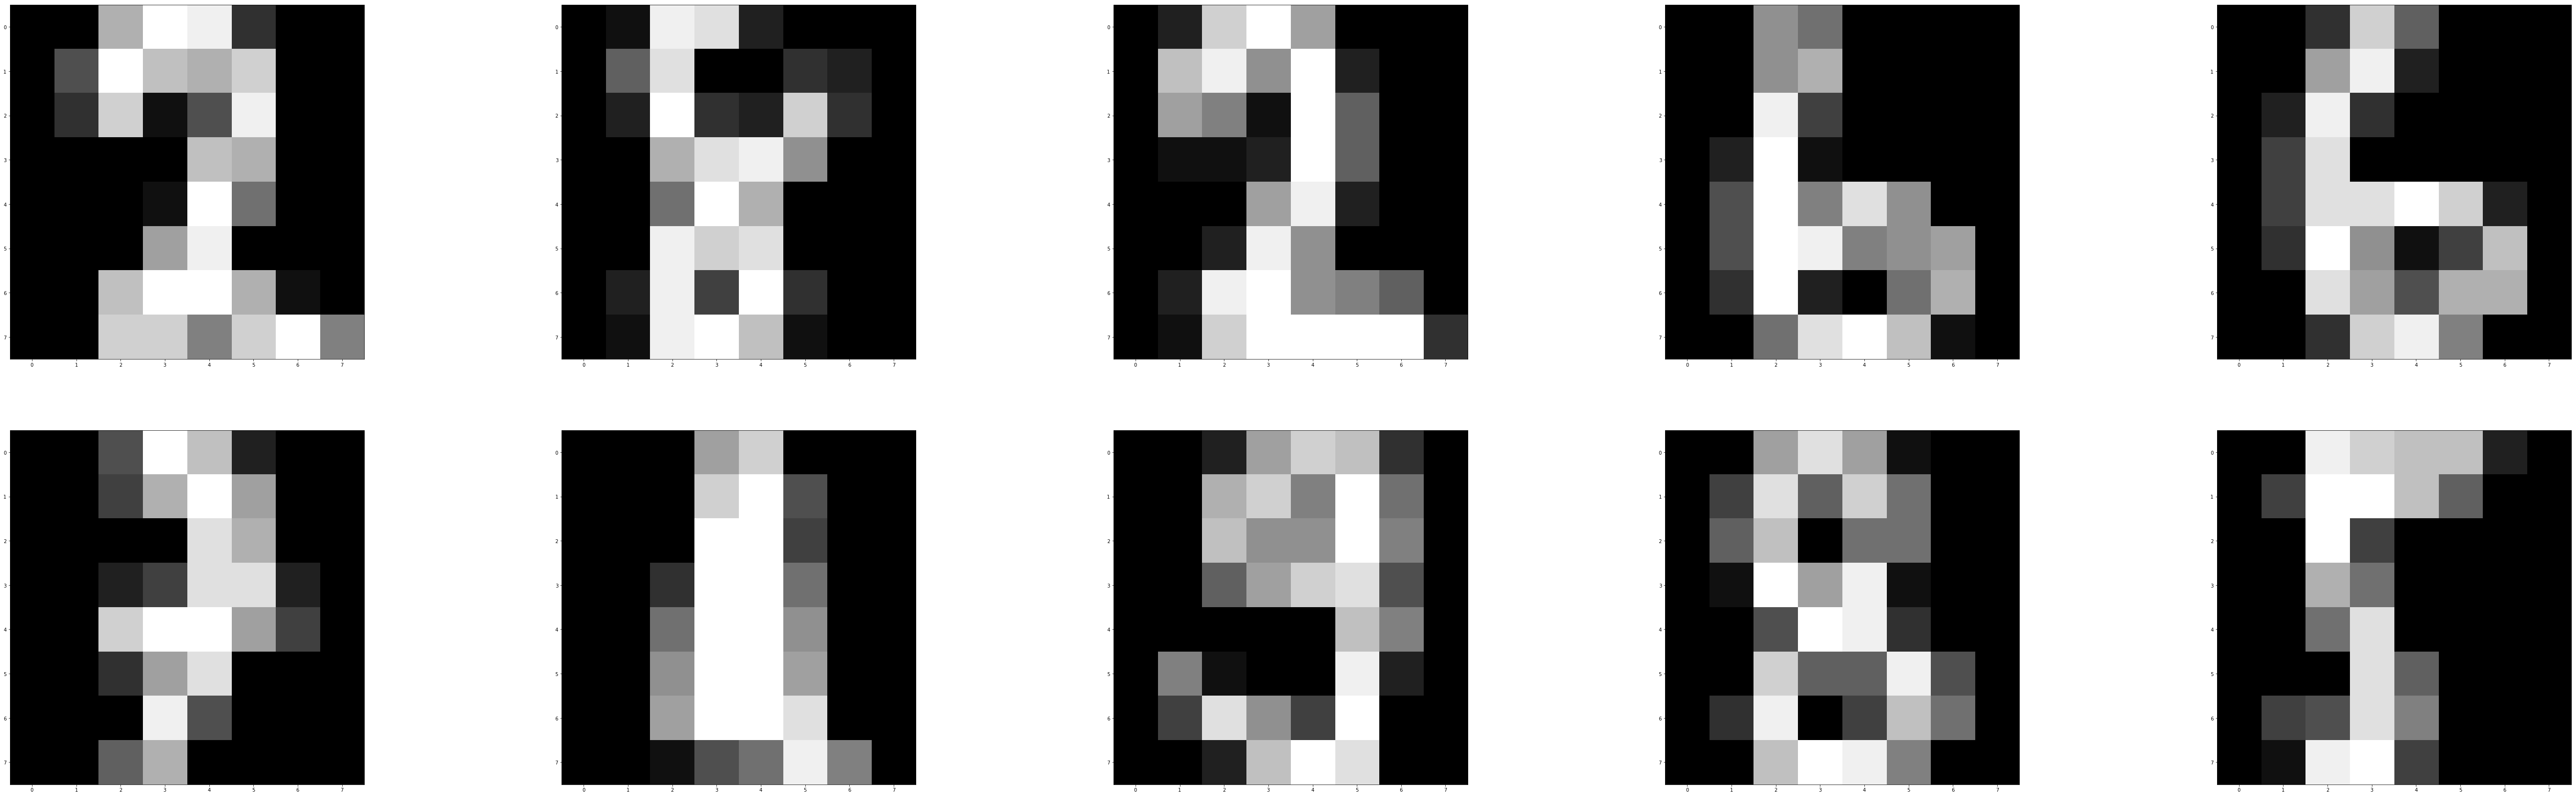

In [41]:
# viz the above predicied test data 
plt.figure(figsize=(100,30))
for index,image in enumerate(x_test[0:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)

In [42]:
# accuracy 
score = logmodel.score(x_test,y_test)
score

0.9533333333333334

In [43]:
# evaluation metrics 
print(metrics.classification_report(y_test[0:10],predictions))
cm = metrics.confusion_matrix(y_test[0:10], predictions)

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         1
          2       1.00      1.00      1.00         2
          5       1.00      1.00      1.00         1
          6       1.00      1.00      1.00         2
          7       1.00      1.00      1.00         1
          8       1.00      1.00      1.00         2
          9       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00        10



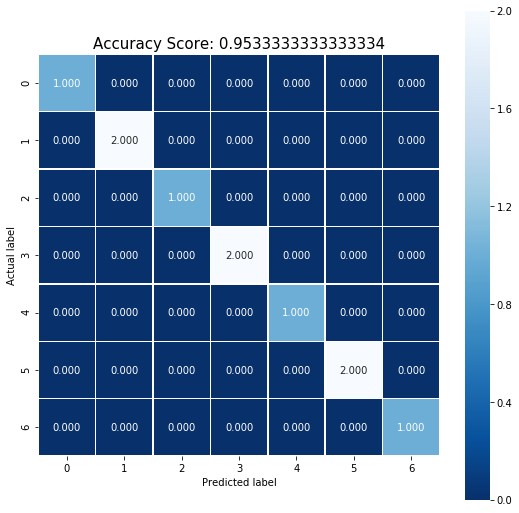

In [44]:
# confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
# Compute AUROC Curve from prediction scores.

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_iris(return_X_y=True)
# Algorithm to use in the optimization problem
# liblinear is limited to small data sets and one versus rest schemes 
# OVR:-
# is a heuristic(learn by itself) method for using binary classification algorithms for multi-class 
# classification. It involves splitting the multi-class dataset into multiple binary classification 
# problems
clf = LogisticRegression(solver="liblinear").fit(X, y)
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

0.9913333333333334

<h1 style="color:skyblue">KNN(K Nearest Neighbours)</h1><br>
K-NN is a instance based non-parametric and lazy learning classification algorithm<br>
It is called Lazy algorithm because it does not need any training data points for model generation. All training data is used in the testing phase which makes training faster and testing phase slower and costlier<br>
K-Nearest Neighbor (K-NN) is a simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure.<br>
An object is classified by vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors<br>
To determine which of the K instances in the training dataset are most similar to a new input, a distance measure is used

## Distance metrics
Minkowski:p=1 Manhattan; p=2 Euclidean<br>
euclidean matrix:-d(p,q) = sqrt((p1-q1)2+(p2-q2)2+...+(pn-qn)2)//n is the dimension<br> 
Cosine similarity:-find similarities between different documents. In cosine metric we measure the degree of angle between two documents

## Process
Divide the data into training and test data.<br>
Select a value K using elbow method by plotting k value with model error rate as the k value should not be too small or too large as it may cause nosie or wrong classification<br>
Determine which distance function is to be used.<br>
Choose a sample from the test data that needs to be classified and compute the distance to its n training samples.<br>
Sort the distances obtained and take the k-nearest data samples.<br>
Assign the test class to the class based on the majority vote of its k neighbors.

## Curse of Dimensionality
KNN performs better with a lower number of features than a large number of features. You can say that when the number of features increases than it requires more data. Increase in dimension also leads to the problem of overfitting. To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions. This problem of higher dimension is known as the Curse of Dimensionality.<br>
To deal with the problem of the curse of dimensionality, you need to perform principal component analysis before applying any machine learning algorithm, or you can also use feature selection approach. Research has shown that in large dimension Euclidean distance is not useful anymore. Therefore, you can prefer other measures such as cosine similarity, which get decidedly less affected by high dimension.

In [ ]:
# predict whether is patient is having cancer (Malignant tumor) or not (Benign tumor)

In [45]:
knn = pd.read_csv('data/breast cancer prediction.csv')
knn.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [46]:
# cancer types malignant and Benign 
knn['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [47]:
#impute Diagnosis categorical value 
def diagnosis_value(diagnosis): 
    if diagnosis == 'M': 
        return 1
    else: 
        return 0
knn['diagnosis'] = knn['diagnosis'].apply(diagnosis_value) 
knn['diagnosis'].unique()

array([1, 0])

In [48]:
import warnings
warnings.simplefilter(action='ignore')

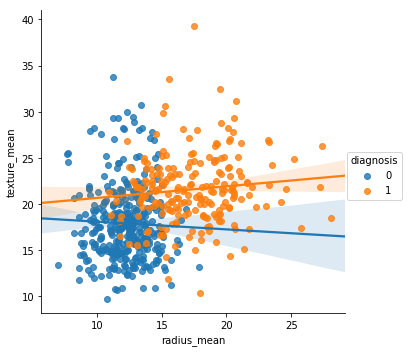

In [49]:
# viz the classes of Diagnosis based on radius and texture 
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = knn)

In [50]:
knn.drop(['Unnamed: 32', 'id'], axis = 1,inplace=True) 

In [51]:
X = knn.iloc[:, 1:] 
y = knn['diagnosis']

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 

In [54]:
# train 
knnmodel = KNeighborsClassifier(n_neighbors = 13) 
knnmodel.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [55]:
pred = knnmodel.predict(X_test)

In [56]:
X_test[:5]

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
204        12.47         18.60           81.09      481.9          0.09965   
70         18.94         21.31          123.60     1130.0          0.09009   
131        15.46         19.48          101.70      748.9          0.10920   
431        12.40         17.68           81.47      467.8          0.10540   
540        11.54         14.44           74.65      402.9          0.09984   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
204            0.1058         0.08005              0.03821         0.1925   
70             0.1029         0.10800              0.07951         0.1582   
131            0.1223         0.14660              0.08087         0.1931   
431            0.1316         0.07741              0.02799         0.1811   
540            0.1120         0.06737              0.02594         0.1818   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
204                 0.06373  ...         14.97          24.64   
70                  0.05461  ...         24.86          26.58   
131                 0.05796  ...         19.26          26.00   
431                 0.07102  ...         12.88          22.91   
540                 0.06782  ...         12.26          19.68   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
204            96.05       677.9            0.1426             0.2378   
70            165.90      1866.0            0.1193             0.2336   
131           124.90      1156.0            0.1546             0.2394   
431            89.61       515.8            0.1450             0.2629   
540            78.78       457.8            0.1345             0.2118   

     concavity_worst  concave points_worst  symmetry_worst  \
204           0.2671               0.10150          0.3014   
70            0.2687               0.17890          0.2551   
131           0.3791               0.15140          0.2837   
431           0.2403               0.07370          0.2556   
540           0.1797               0.06918          0.2329   

     fractal_dimension_worst  
204                  0.08750  
70                   0.06589  
131                  0.08019  
431                  0.09359  
540                  0.08134  

[5 rows x 30 columns]

In [57]:
pred[:5]

array([0, 1, 1, 0, 0])

In [58]:
# evaluation metrics 
print(metrics.classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       121
          1       0.97      0.93      0.95        67

avg / total       0.96      0.96      0.96       188



In [59]:
# score 
knnmodel.score(X_test,y_test)

0.9627659574468085

In [60]:
# confusion metrics 
metrics.confusion_matrix(y_test,pred)

array([[119,   2],
       [  5,  62]])

In [61]:
# picking right k using elbow method 
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

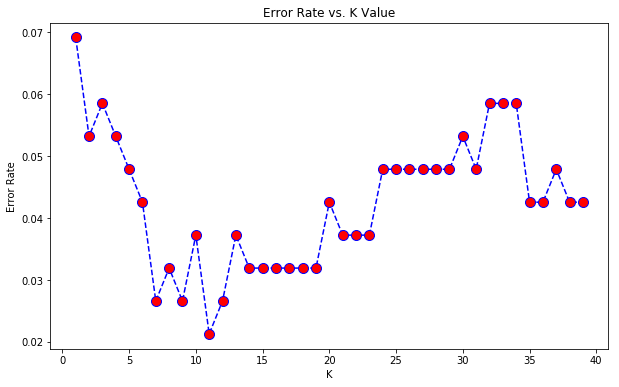

In [62]:
# you can see that near k>10 and k<15 error rate is low 
# thats why we picked k as 13 
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

<h1 style="color:skyblue">Decision Tree</h1><br>
used for solving both regression and classification problems<br>
The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data<br>
In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node<br>
Decision trees classify the examples by sorting them down the tree from the root to some leaf/terminal node, with the leaf/terminal node providing the classification of the example.<br>
Decision Trees follow Sum of Product (SOP) representation. The Sum of product (SOP) is also known as Disjunctive Normal Form. For a class, every branch from the root of the tree to a leaf node having the same class is conjunction (product) of values, different branches ending in that class form a disjunction (sum).

## Steps
It begins with the original set S as the root node.<br>
On each iteration of the algorithm, it iterates through the very unused attribute of the set S and calculates Entropy(H) and Information gain(IG) of this attribute.<br>
It then selects the attribute which has the smallest Entropy or Largest Information gain.<br>
The set S is then split by the selected attribute to produce a subset of the data.<br>
The algorithm continues to recur on each subset, considering only attributes never selected before.

## Terminologies
Root Node: It represents the entire population or sample and this further gets divided into two or more homogeneous sets.<br>
Splitting: It is a process of dividing a node into two or more sub-nodes.<br>
Decision Node: When a sub-node splits into further sub-nodes, then it is called the decision node.<br>
Leaf / Terminal Node: Nodes do not split is called Leaf or Terminal node.<br>
Pruning: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.<br>
Branch / Sub-Tree: A subsection of the entire tree is called branch or sub-tree.<br>
Parent and Child Node: A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.

## Attribute selection
Entropy:-Entropy is a measure of the randomness/impurity in the information being processed.A branch with an entropy of zero is a leaf node and A brach with entropy more than zero needs further splitting<br>
Information Gain:-Information gain or IG is a statistical property that measures how well a given attribute separates the training examples according to their target classification. Information gain is a decrease in entropy.<br> 
It computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values<br>
Gini Index:- also known as Gini impurity, calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly. If all the elements are linked with a single class then it can be called pure.subtracting the sum of the squared probabilities of each class from one; Gini Index works with the categorical target variable(“Success” or “failure") performing only Binary splits.Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled. Gini index varies between values 0 and 1, where 0 expresses the purity of classification, i.e. All the elements belong to a specified class or only one class exists there. And 1 indicates the random distribution of elements across various classes. The value of 0.5 of the Gini Index shows an equal distribution of elements over some classes. 

## Avoiding over fitting(Pruning)
The splitting process results in fully grown trees until the stopping criteria are reached. But, the fully grown tree is likely to overfit the data, leading to poor accuracy on unseen data<br>
In pruning, you trim off the branches of the tree, i.e., remove the decision nodes starting from the leaf node such that the overall accuracy is not disturbed. This is done by segregating the actual training set into two sets: training data set, D and validation data set, V. Prepare the decision tree using the segregated training data set, D. Then continue trimming the tree accordingly to optimize the accuracy of the validation data set,V<br>
Decision trees suffer from bias and variance. You will have a large bias with simple trees and a large variance with complex trees.

## Parameter Tuning
max_depth:The deeper the tree, the more splits it has and it captures more information about the data;we use k fold cross validation to find it<br>
min_samples_split:It represents the minimum number of samples required to split an internal node<br>
min_samples_leaf:Its The minimum number of samples required to be at a leaf node<br>
max_features:It represents the number of features to consider when looking for the best split

## k fold cross validation
Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.<br>
In this method, we split the data-set into k number of subsets(known as folds) then we perform training on the all the subsets but leave one(k-1) subset for the evaluation of the trained model. In this method, we iterate k times with a different subset reserved for testing purpose each time.

In [ ]:
# Diabetes prediction

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("data/diabetes.csv", header=None, names=col_names)

In [154]:
# preprocessing
pima.drop(pima[pima['pregnant']=='Pregnancies'].index,inplace=True)

In [155]:
# feature selection
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [156]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [157]:
# train and test 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",max_depth=4)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [158]:
X_test[:20].reset_index(drop=True)

pregnant insulin   bmi age glucose  bp pedigree
0         7     135    26  51     136  74    0.647
1         1       0  26.1  22     151  60    0.179
2         6       0    25  27     109  60    0.206
3         3       0  34.4  46      61  82    0.243
4         1     180  36.1  25     116  78    0.496
5         0       0  38.8  22     119  66    0.259
6         4       0    35  29     122  68    0.394
7         1      50  22.3  24     119  54    0.205
8         1       0  38.1  30      97  70    0.218
9         0     142  41.5  22     105  64    0.173
10        7       0    32  39     137  90    0.391
11        1      73  25.9  36      95  74    0.673
12        0      14  59.4  25     180  78     2.42
13       11     144  36.1  50     138  74    0.557
14        0      89     0  21     118  64    1.731
15        9       0  30.4  49     165  88    0.302
16        1      96  34.6  32     115  70    0.529
17        5      22  29.6  40     126  78    0.439
18        2       0  22.2  23      99   0    0.108
19        5       0  33.7  25      78  48    0.654

In [159]:
y_pred[:20]

array(['0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '0', '1', '0', '0', '0', '0'], dtype=object)

In [160]:
# evaluation metrics 
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       146
           1       0.76      0.61      0.68        85

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



In [161]:
# score 
clf.score(X_test,y_test)

0.7878787878787878

In [175]:
# viz the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz #### homebrew install 
import pydotplus
dot_data = StringIO()
dot_data_rfc = StringIO()

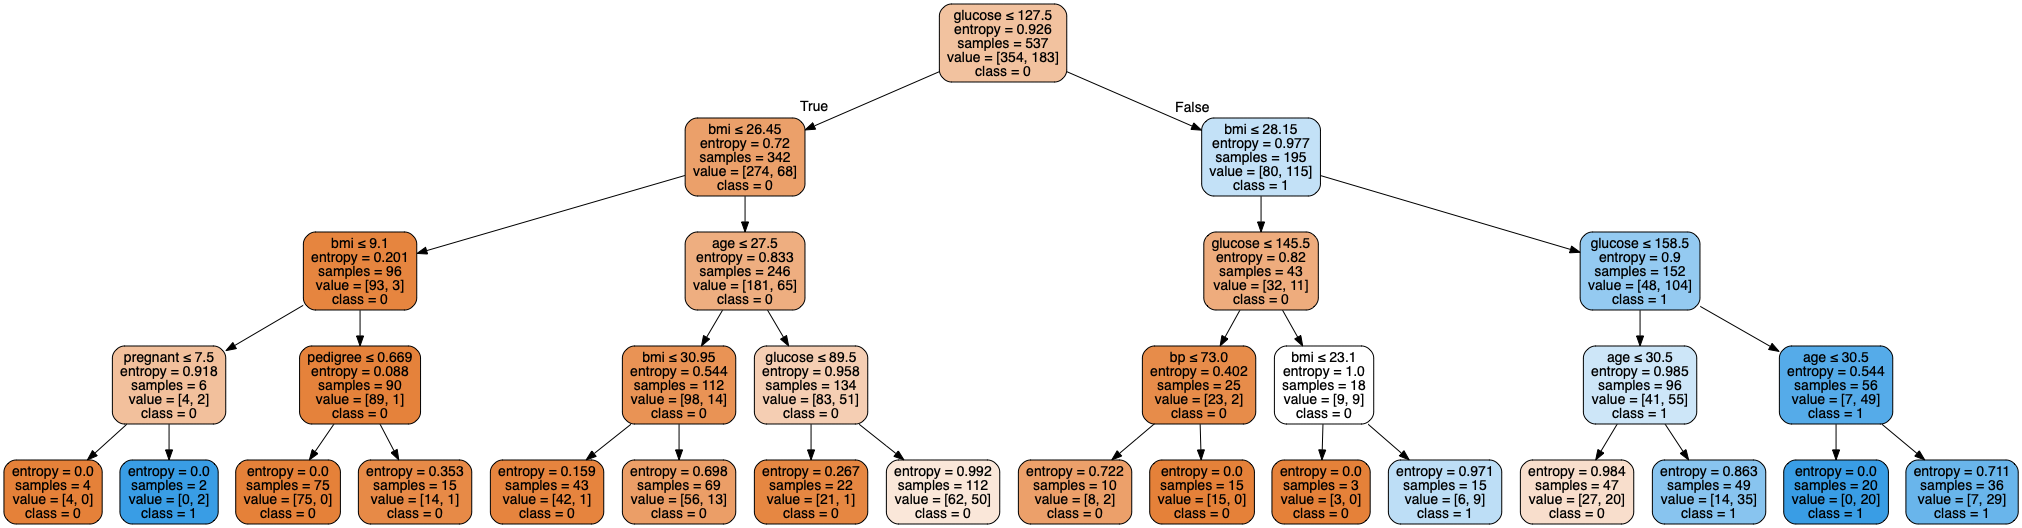

In [163]:
#This function generates a GraphViz representation of the decision tree in and exports it in dot format 
# Graphviz is a open-source tool for drawing graphs specified in DOT language
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) # Load graph as defined by data in DOT format.   
graph.write_png('diabetes.png')
Image(graph.create_png(),height=10000,width=10000)

In [164]:
# finding max depth using k fold cross validation
from sklearn.model_selection import cross_val_score

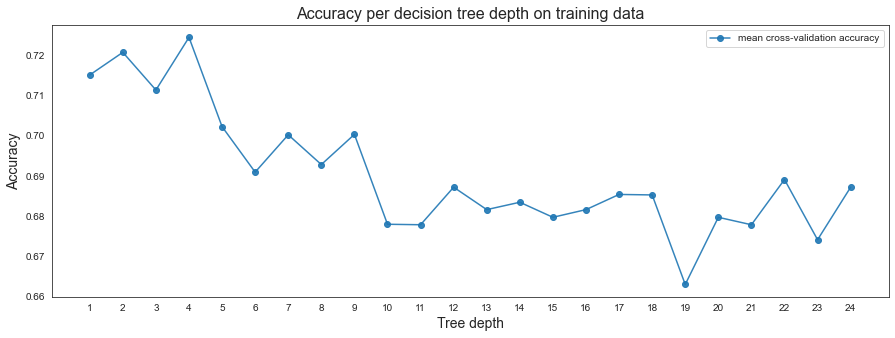

In [165]:
# function for fitting trees of various depths on the training data using k fold cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_mean = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring) # cv is no of folds
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
    cv_scores_mean = np.array(cv_scores_mean)
    return cv_scores_mean
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean,title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ylim = plt.ylim()
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean,'Accuracy per decision tree depth on training data')

<h1 style="color:skyblue"> Random Forrests </h1><br>
Ensemble methods:combines several decision trees to produce better predictive performance than utilizing a single decision tree. The main principle behind the ensemble model is that a group of weak learners come together to form a strong learner.<br>
Bagging(Bootstrap Aggregation):create several subsets of data from training sample chosen randomly with replacement. Now, each collection of subset data is used to train their decision trees in parallel. As a result, we end up with an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree.Training set for each of the base classifiers is independent of each other. Many of the original data may be repeated in the resulting training set while others may be left out.Bagging reduces overfitting (variance) by averaging or voting, however, this leads to an increase in bias, which is compensated by the reduction in variance though<br>
Random Forest: extension over bagging. It takes one extra step where in addition to taking the random subset of data, it also takes the random selection of features rather than using all features to grow trees. When you have many random trees. It’s called Random Forest

In [45]:
# Bagging Classifier 
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
dataset = pd.read_csv('data/Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values
kfold = model_selection.KFold(n_splits = 3)
# initialize the base classifier
base_cls = DecisionTreeClassifier()
# no. of base classifier
num_trees = 500
# bagging classifier
model = BaggingClassifier(base_estimator = base_cls, n_estimators = num_trees,
                          random_state = seed)
results = model_selection.cross_val_score(model, X, y, cv = kfold)
print("accuracy :",results.mean())

accuracy : 0.2597928436911488


In [ ]:
# Random Forrests 

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
# It has 100 trees
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [168]:
rfc_pred = rfc.predict(X_test)

In [169]:
# evaluation
print(metrics.classification_report(y_test,rfc_pred))
print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       146
           1       0.78      0.60      0.68        85

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231

Accuracy: 0.7922077922077922


In [170]:
metrics.confusion_matrix(y_test,rfc_pred)

array([[132,  14],
       [ 34,  51]])

In [171]:
# when we compare the above random forrest with below decision tree you can clearly see the improvement 

In [172]:
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# evaluate
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6796536796536796


In [173]:
# feature selection using Random forrests
# we can omit features with low score 
feature_imp = pd.Series(rfc.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

glucose     0.251328
bmi         0.190424
pedigree    0.142378
age         0.141006
bp          0.102505
pregnant    0.090996
insulin     0.081363
dtype: float64

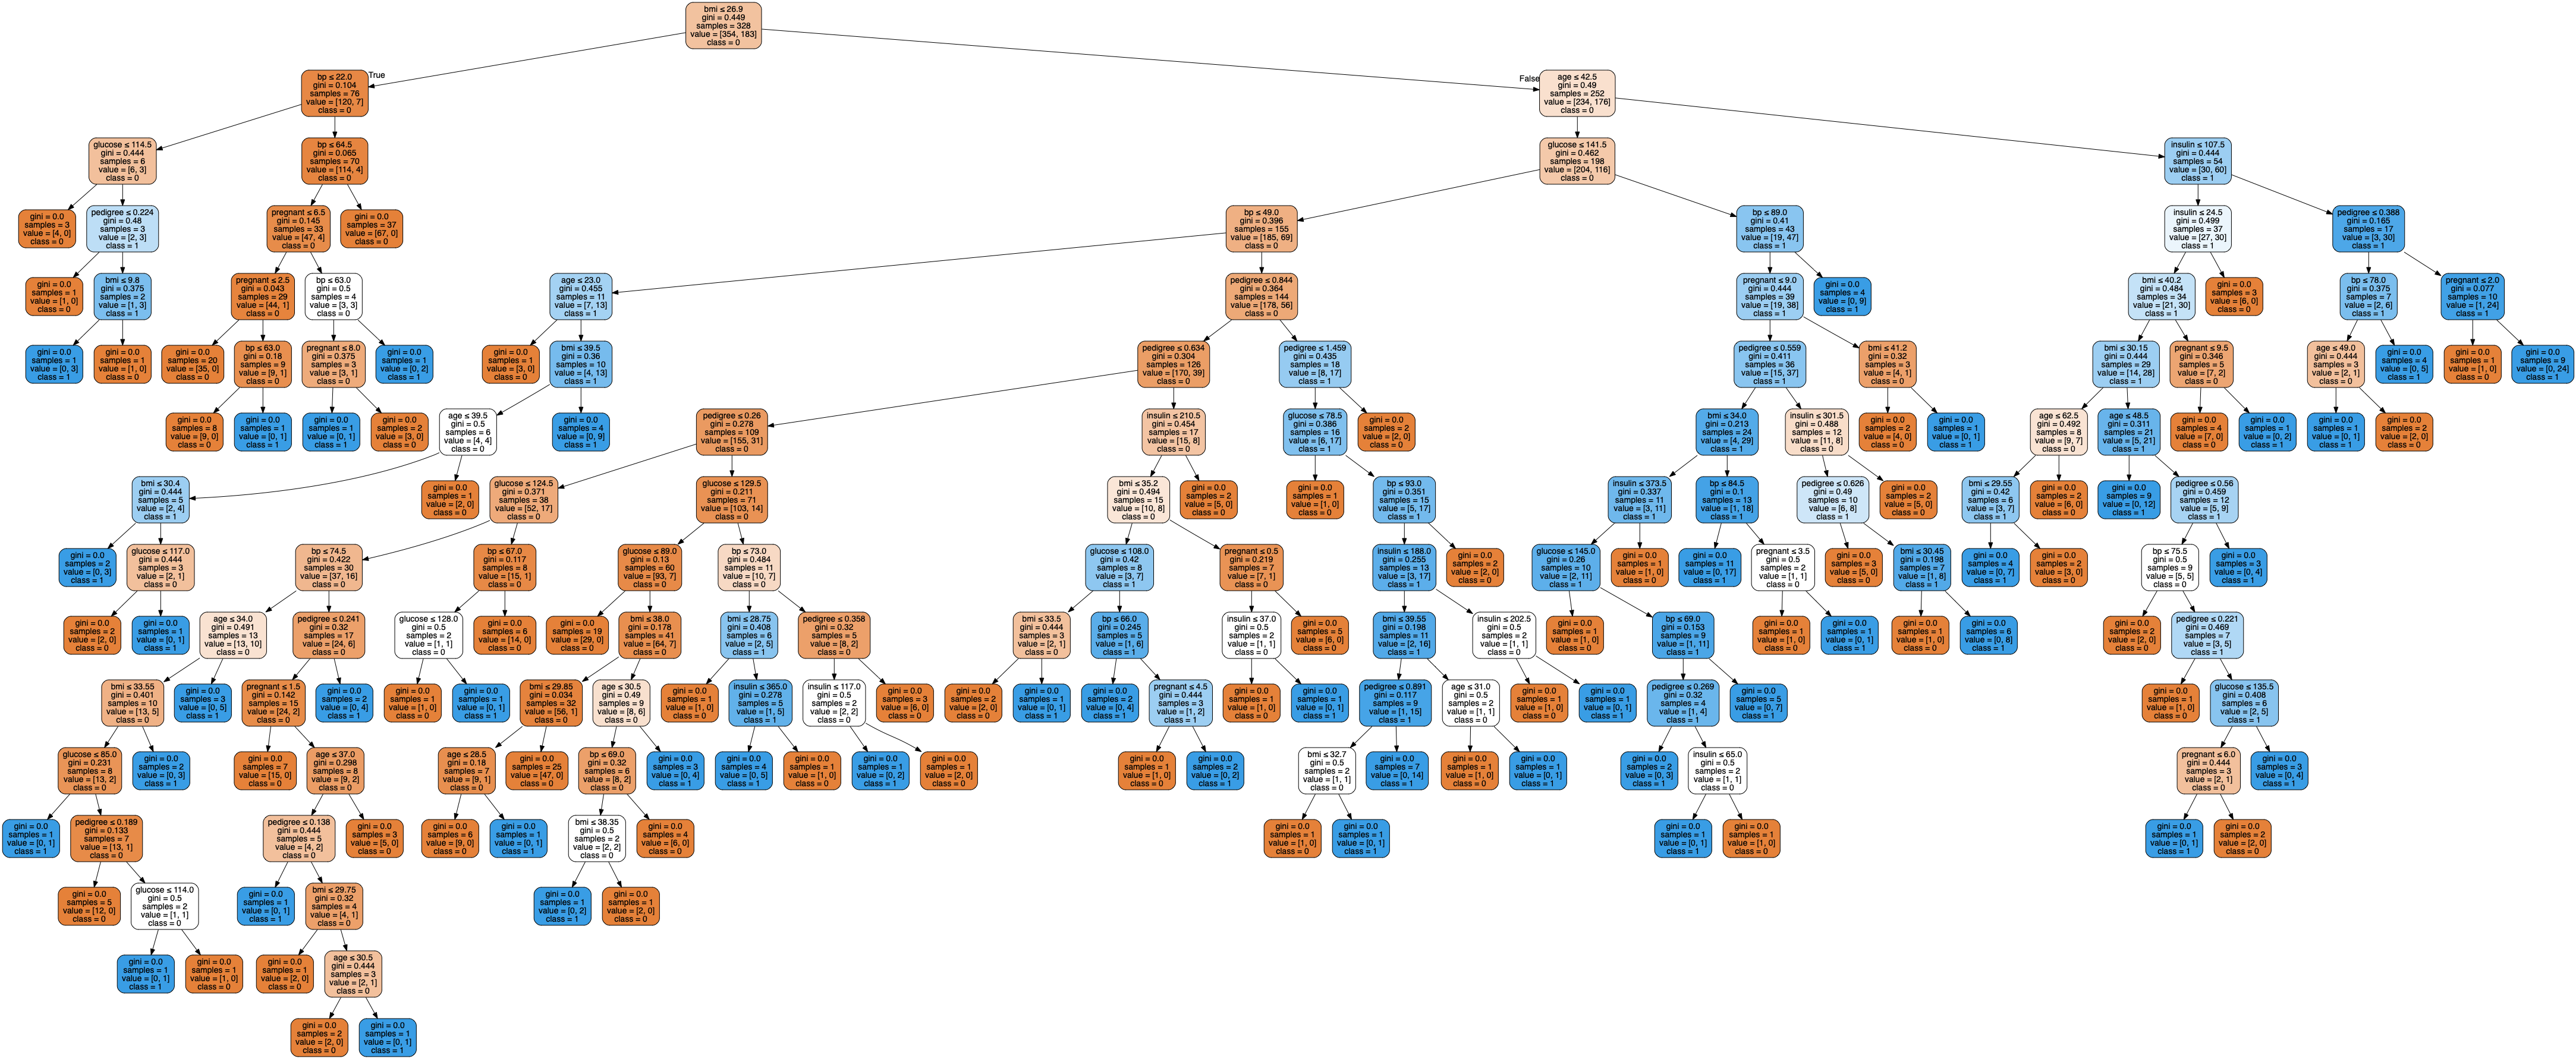

In [181]:
# viz decision tree in a random forrest 
plt.rcParams['figure.figsize'] = [15, 15]
export_graphviz(rfc.estimators_[0], out_file=dot_data_rfc,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data_rfc.getvalue()) # Load graph as defined by data in DOT format.   
graph[0].write_png('diabetes_rfc.png')
Image(graph[0].create_png(),height=10000,width=10000)

<h1 style="color:skyblue">Scalar Vector Machine</h1><br>
The classifier separates data points using a hyperplane with the largest amount of margin. That's why an SVM classifier is also known as a discriminative classifier. SVM finds an optimal hyperplane which helps in classifying new data points.<br>
SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces. It is used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition.<br>
 SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.<br>

## terminologies:
Support Vectors:data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins<br>
Hyperplane:decision plane which separates between a set of objects having different class memberships.<br>
margin:its a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.<br>

## Dealing with in seperable and non linear planes(Kernels):
In such situation, SVM uses a kernel trick to transform the input space to a higher dimensional space; it converts nonseparable problem to separable problems by adding more dimension to it; Now you can easily segregate these points using linear separation.<br>
kernels:<br>
1)Linear: normal dot product any two given observations; K(x, xi) = sum(x * xi)<br>
2)Polynomial: distinguish curved or nonlinear input space; K(x,xi) = 1 + sum(x * xi)^d (d is the degree of the polynomial)<br>
3)Radial Basis fn(exponential): map an input space in infinite dimensional space; K(x,xi) = exp(-gamma * sum((x – xi^2)); 

## Hyper parameters
1)Regularization(c):tells the SVM optimization how much you want to avoid misclassifying each training example.For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.<br>
2)Gamma(RBF):-The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. In other words, with low gamma, points far away from plausible seperation line are considered in calculation for the seperation line. Where as high gamma means the points close to plausible line are considered in calculation.<br>
3)Margin:A margin is a separation of line to the closest class points.

In [ ]:
# Spam classification in mails

In [4]:
from collections import Counter
from sklearn import svm

In [5]:
from sklearn import datasets

In [6]:
import os

In [34]:
# data cleaning 
# remove stop words by considering only most frequent 3000 words of dictionary from email
def make_Dictionary(root_dir):
    all_words = []
    emails = [os.path.join(root_dir,f) for f in os.listdir(root_dir)]
    for mail in emails:
        with open(mail) as m:
            for line in m:
                words = line.split()
                all_words += words
    # get all the words in all the documents of all training and testing files and get their count using Counter
    dictionary = Counter(all_words)

    for item in list(dictionary):
        # keep only alphabets whose length > 1
        if item.isalpha() == False:
            del dictionary[item]
        elif len(item) == 1:
            del dictionary[item]
    # get the most common 3000 words 
    dictionary = dictionary.most_common(3000)

    return dictionary

# feature extraction 
# feature matrix here is frequency matrix 
"""
word      :   Hi this is Alice Happy Birthday
frequency :   1   1    1  2      1      1
word      :   Hi this is Alice Happy Birthday
frequency :   1   1    1  2      1      1
"""

def extract_features(mail_dir):
    files = [os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)]
    # init feature matrix and train_labels with zeroes
    features_matrix = np.zeros((len(files),3000))
    train_labels = np.zeros(len(files))
    count = 0;
    docID = 0;
    for fil in files:
        with open(fil) as fi:
            # read file along with line no's 
            for i,line in enumerate(fi):
                if i == 2:
                    words = line.split()
                    for word in words:
                        wordID = 0
                        for i,d in enumerate(dictionary):
                            if d[0] == word:
                                wordID = i
                                # set word frequency as feature matrix 
                                features_matrix[docID,wordID] = words.count(word)
        train_labels[docID] = 0;
        filepathTokens = fil.split('/')
        lastToken = filepathTokens[len(filepathTokens) - 1]
        # check if file is a spam file and set label as 1
        if lastToken.startswith("spmsg"):
            train_labels[docID] = 1;
            count = count + 1
        # inc docID 
        docID = docID + 1
    return features_matrix, train_labels



TRAIN_DIR = "data/mail/train-mails"
TEST_DIR = "data/mail/test-mails"

# get the word dict
dictionary = make_Dictionary(TRAIN_DIR)
# get the feature matrix and training labels 
print("reading and processing emails from file.")
features_matrix, labels = extract_features(TRAIN_DIR)
test_feature_matrix, test_labels = extract_features(TEST_DIR)
# model training 
model = svm.SVC(kernel="rbf", C=10000)
print("Training model.")
model.fit(features_matrix, labels)
# testing 
predicted_labels = model.predict(test_feature_matrix)
# evaluation 
print("accuracy",metrics.accuracy_score(test_labels, predicted_labels))

reading and processing emails from file.
Training model.
accuracy 0.9576923076923077


In [35]:
# evaluation 
print(metrics.classification_report(test_labels,predicted_labels))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       130
         1.0       0.96      0.95      0.96       130

    accuracy                           0.96       260
   macro avg       0.96      0.96      0.96       260
weighted avg       0.96      0.96      0.96       260



In [ ]:
# vizualizing svm

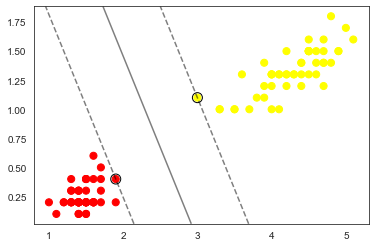

In [9]:
# linearly seperable plot 

# feature selection 
iris = sns.load_dataset("iris")
# remove species virginica 
df=iris[(iris['species']!='virginica')]
# drop column sepal length and width 
df=df.drop(['sepal_length','sepal_width'], axis=1)
# replace categorical values with 0 and 1 
df=df.replace('setosa', 0)
df=df.replace('versicolor', 1)
X=df.iloc[:,0:2]
y=df['species']
# modelling 
model = svm.SVC(kernel='linear', C=1E10)
model.fit(X, y)
# plotting 
ax = plt.gca()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
# return distance of the samples X to the separating hyperplane.
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [10]:
# non linearly seperable
from sklearn.datasets.samples_generator import make_circles
from mpl_toolkits import mplot3d

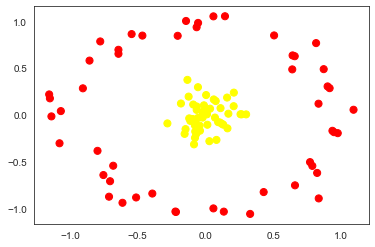

In [11]:
# non linearly seperable
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Text(0.5, 0, 'r')

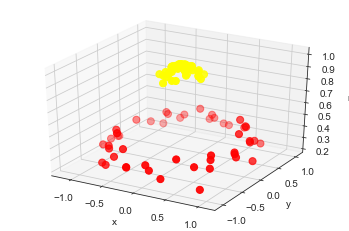

In [12]:
#setting the 3rd dimension with RBF centered on the middle clump
r = np.exp(-(X ** 2).sum(1))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

## Parameter tuning using Grid Search CV
Exhaustive search over specified parameter values for an estimator.
The parameters of the estimator used to apply these methods are optimized by cross validated grid-search over a parameter grid. More dimensions means more time complexity
commonly used when dimensions are <= 4

In [24]:
from sklearn.model_selection import GridSearchCV

In [20]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    return best_model, cv_results 

In [21]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [23]:
model, cv_results = svc_param_selection(X, y, 5)
print('the best parameters are',model.get_params())

for mean, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print('{} for {}'.format(round(mean, 3), params))

the best parameters are {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
0.913 for {'C': 0.001, 'gamma': 0.001}
0.913 for {'C': 0.001, 'gamma': 0.01}
0.913 for {'C': 0.001, 'gamma': 0.1}
0.96 for {'C': 0.001, 'gamma': 1}
0.913 for {'C': 0.01, 'gamma': 0.001}
0.913 for {'C': 0.01, 'gamma': 0.01}
0.913 for {'C': 0.01, 'gamma': 0.1}
0.96 for {'C': 0.01, 'gamma': 1}
0.913 for {'C': 0.1, 'gamma': 0.001}
0.913 for {'C': 0.1, 'gamma': 0.01}
0.92 for {'C': 0.1, 'gamma': 0.1}
0.96 for {'C': 0.1, 'gamma': 1}
0.913 for {'C': 1, 'gamma': 0.001}
0.933 for {'C': 1, 'gamma': 0.01}
0.98 for {'C': 1, 'gamma': 0.1}
0.967 for {'C': 1, 'gamma': 1}
0.933 for {'C': 10, 'gamma': 0.001}
0.98 for {'C': 10, 'gamma': 0.01}
0.98 for {'C': 10, 'gamma': 0.1}
0.953 for {'C': 10, 'gamma': 1}


<h1 style="color:skyblue">Naive Bayes</h1><br>
P(A|B) = P(B|A) P(A) / P(B)<br>
P(A|B) is “Probability of A given B”(posterior probability), the probability of A given that B happens<br>
P(A) is Probability of A(Class prior probability)<br>
P(B|A) is “Probability of B given A”(likelihood), the probability of B given that A happens<br>
P(B) is Probability of B(predictor prior probability)<br>
ex:- P(Fire|Smoke) means how often there is fire when we see smoke.P(Smoke|Fire) means how often we see smoke when there is fire.<br>
This classifier assumes the features (in this case we had words as input) are independent. Hence the word naive<br>
Naive Bayes classifier calculates the probabilities for every class. Then it selects the class with highest probability.

In [ ]:
# IMDB movie review data set 
# Sentiment analysis 

In [97]:
data = pd.read_csv("data/IMDB  Reviews.csv",nrows=2000)

In [98]:
print(data.columns)
print(data.shape)

Index(['review', 'sentiment'], dtype='object')
(2000, 2)


In [99]:
data.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [ ]:
# Data preprocessing 
"""
1) Begin by removing the html tags
2) Remove any punctuations or limited set of special characters like , or . or # etc.
3) Check if the word is made up of english letters and is not alpha-numeric
4) Check to see if the length of the word is greater than 2 
5) Convert the word to lowercase
6) Remove Stopwords(stop words are used to eliminate unimportant words the, a ,an etc)
7) Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)
    process of reducing a word to its word stem or to the roots of words(stem of friendships is friendship) 
    by removing the affixes of a word 
"""

In [100]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
# get stop words 
stop = set(stopwords.words('english')) 
# get stemmer 
sno = nltk.stem.SnowballStemmer('english') 

def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [101]:
i=0
str1=' '
final_string=[]
all_positive_words=[] 
all_negative_words=[] 
s=''
for sent in data['review'].values:
    filtered_sentence=[]
    # clean html 
    sent=cleanhtml(sent) 
    for w in sent.split():
        # clean punc 
        for cleaned_words in cleanpunc(w).split():
            # cleaned words should be alpha & len > 2 
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):
                # and  are lower and not stop words 
                if(cleaned_words.lower() not in stop):
                    # convert the clean word to lower stemmed form in utf 
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    # get all positive words 
                    if (data['sentiment'].values)[i] == "positive": 
                        all_positive_words.append(s) 
                    # get all negative words 
                    if(data['sentiment'].values)[i] == "negative":
                        all_negative_words.append(s) 
                else:
                    continue
            else:
                continue 
    
    str1 = b" ".join(filtered_sentence) 
    final_string.append(str1)
    i+=1

In [102]:
data['cleaned_review']=final_string

In [103]:
# label encoding 
def posneg(x):
    if x=="negative":
        return 0
    elif x=="positive":
        return 1
    return x

filtered_score = data["sentiment"].map(posneg)
data["score"] = filtered_score

In [104]:
# test train split 
X = data['cleaned_review']
y = data['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [105]:
# set y as int 
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [ ]:
"""
TF-IDF(Term Frequency Inverse document frequency) Vectorizing
This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies 
the importance of the word in the document and corpus
Terminology:
t — term (word)
d — document (set of words)
N — count of corpus
corpus — the total document set
Term Frequency:tf(t,d) = count of t in d / number of words in d
Document Frequency:df(t) = occurrence of t in documents
Inverse document frequency:idf(t) = log(N/(df + 1))
tf-idf(t, d) = tf(t, d) * log(N/(df + 1))
"""

In [106]:
# convert text into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2)) #1-unigrams and 2-bigrams
tf_idf_train = tf_idf_vect.fit_transform(X_train.values) # use fit_transform for training data 
tf_idf_test = tf_idf_vect.transform(X_test.values) # use transform for test data 

In [ ]:
# hyper parameter alpha: smoothing 
"""
added when word is not there in the corpus 
a pseudo-count, will be incorporated in every probability estimate. Consequently, no probability will be zero. 
this is a way of regularizing Naive Bayes, and when the pseudo-count is zero, it is called Laplace smoothing
"""

In [107]:
alpha_range = list(np.arange(1,50,5))
len(alpha_range)

10

In [108]:
# parameter tuning 
from sklearn.naive_bayes import MultinomialNB

alpha_scores=[]

for a in alpha_range:
    clf = MultinomialNB(alpha=a)
    scores = cross_val_score(clf, tf_idf_train, y_train, cv=5, scoring='accuracy')
    alpha_scores.append(scores.mean())
    print(a,scores.mean())

1 0.816405878381369
6 0.815665095848189
11 0.8134039713300172
16 0.7999599346735684
21 0.7970027478413454
26 0.7850568177449497
31 0.7708636758565469
36 0.7581742721171304
41 0.7358028162516435
46 0.7171599502175852


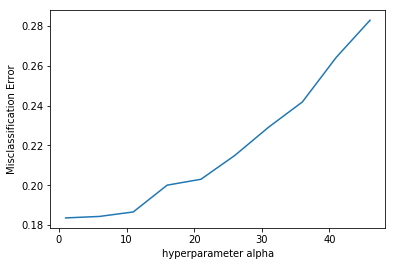

In [109]:
# plot alpha vs misclassification error 
MSE = [1 - x for x in alpha_scores]

# plot misclassification error vs alpha
plt.plot(alpha_range, MSE)

plt.xlabel('hyperparameter alpha')
plt.ylabel('Misclassification Error')
plt.show()

In [110]:
# train 
# from above you can clearly see alpha 1 has best accuracy 
clf = MultinomialNB()
clf.fit(tf_idf_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [111]:
# test
y_pred_test = clf.predict(tf_idf_test)

accuracy 86.96969696969697
             precision    recall  f1-score   support

          0       0.86      0.88      0.87       331
          1       0.88      0.86      0.87       329

avg / total       0.87      0.87      0.87       660



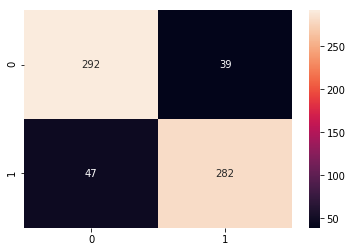

In [112]:
# evaluation 
print('accuracy',metrics.accuracy_score(y_test, y_pred_test) * float(100))
print(metrics.classification_report(y_test, y_pred_test))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test),annot=True,fmt='d')

In [113]:
# most freq 10 positive words 
from collections import Counter
counted_words = Counter(all_positive_words)
words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

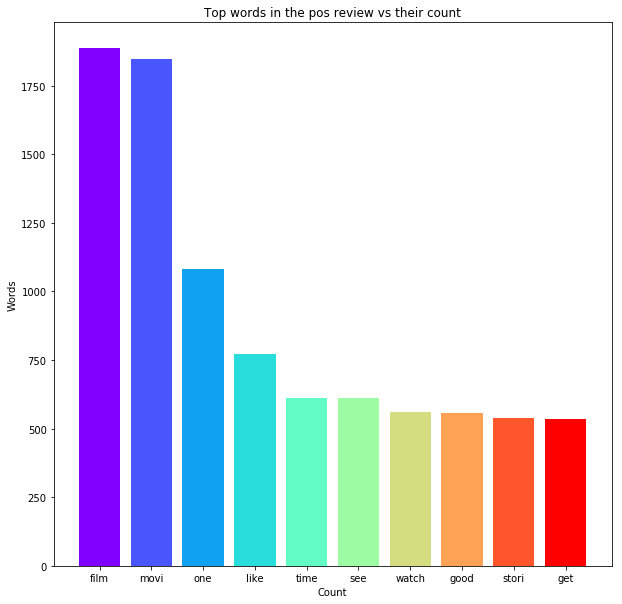

In [114]:
# plot it 
import matplotlib.cm as cm
from matplotlib import rcParams

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 10, 10

plt.title('Top words in the pos review vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts, color=colors)

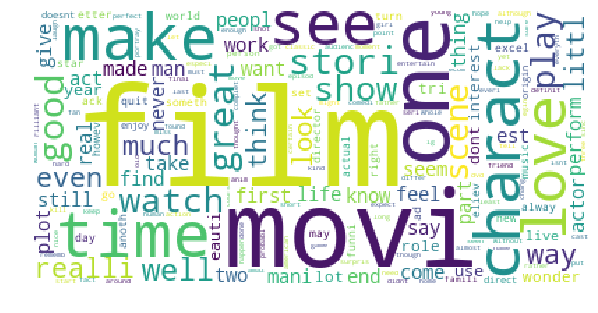

In [115]:
# Word Cloud 
from wordcloud import WordCloud, STOPWORDS

pos_words = [str(val).lstrip("b'").rstrip("'") for val in all_positive_words]
positive = ' '.join(pos_words)
stopwords = STOPWORDS
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(positive)
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Unsupervised Learning 
It works with unlabelled data<br> 
goals of unsupervised learning are How do you find the underlying structure of a dataset? How do you summarize it and
group(cluster) it most usefully? How do you effectively represent data in a compressed format(Dimensionality Regression) which represents data using less columns or features eliminating redundant features  

<h1 style="color:skyblue">K means clustering</h1><br>
The goal of clustering is to create groups of data points such that points in different clusters are dissimilar while points within a cluster are similar.<br>
With k-means clustering, we want to cluster our data points into k groups. A larger k creates smaller groups with more granularity(distinguishable), a lower k means larger groups and less granularity.<br>
The output of the algorithm would be a set of “labels” assigning each data point to one of the k groups. In k-means clustering, the way these groups are defined is by creating a centroid for each group. The centroids are like the heart of the cluster, they “capture” the points closest to them and add them to the cluster.<br>
Evaluation:<br>
1)Inertia: tells how far away the points within a cluster are. Therefore, a small of inertia is needed.<br>
How many clusters(elbow method):The idea behind good clustering is having a small value of inertia, and small number of clusters; The value of inertia decreases as the number of clusters increase and such point is called elbow point;<br> 
2)Silhouette Score:The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation); calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b)<br>
3)v-measure score:harmonic mean between homogeneity and completeness; for this you need actual labels<br> 
4)Homogenity: each cluster has data-points belonging to the same class label<br>
5)Completeness: all data-points belonging to the same class are clustered into the same cluster.

In [ ]:
# course clustering based on hash tags 

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
hashtags_df=pd.read_csv("data/Course-Hashtags.csv")
#Seperate Hashtags and titles to lists
hash_list = hashtags_df["HashTags"].tolist()
title_list = hashtags_df["Course"].tolist()
vectorizer = TfidfVectorizer(stop_words='english')
hash_matrix=vectorizer.fit_transform(hash_list)
print("\n Feature names Identified :\n")
print(vectorizer.get_feature_names())
hashtags_df


 Feature names Identified :

['advanced', 'automation', 'bigdata', 'datascience', 'design', 'developer', 'gcp', 'graphics', 'hadoop', 'ide', 'intermediate', 'java', 'jdbc', 'kubernetes', 'machinelearning', 'patterns', 'programming', 'python', 'scala', 'scripting']


Course  \
0         Apache Spark Essential Training   
1                  Java Memory Management   
2           Python Automation and Testing   
3                     Python for Graphics   
4     Machine Learning and AI Foundations   
5    Java : Database Integration and JDBC   
6                           R Programming   
7                  Python Design Patterns   
8                 Hadoop for Data Science   
9                       Java IDE Overview   
10  Data Science on Google Cloud Platform   
11                 Scala for Data Science   
12         Kubernetes for Java Developers   
13                       Python Scripting   

                                    HashTags  
0        BigData,DataScience,MachineLearning  
1                  Java,Advanced,Programming  
2                Python,Automation,Scripting  
3                  Python,Graphics,Scripting  
4   DataScience,MachineLearning,Intermediate  
5                      Java,JDBC,Programming  
6              R,Programming,MachineLearning  
7                     Python,Design,Patterns  
8                 Hadoop,DataScience,BigData  
9                       Java,Programming,IDE  
10              DataScience,GCP,Intermediate  
11                 Scala,DataScience,BigData  
12               Java,Kubernetes,Programming  
13                Python,Scripting,Developer

In [43]:
from sklearn.cluster import KMeans
#Split data into 3 clusters
kmeans = KMeans(n_clusters=3).fit(hash_matrix)
#get Cluster labels.
clusters=kmeans.labels_
#Print cluster label and Courses under each cluster
for group in set(clusters):
    print("\nGroup : ",group, "\n-------------------")
    for i in hashtags_df.index:
        if ( clusters[i] == group):
            print(title_list[i])


Group :  0 
-------------------
Apache Spark Essential Training
Machine Learning and AI Foundations
Hadoop for Data Science
Data Science on Google Cloud Platform
Scala for Data Science

Group :  1 
-------------------
Java Memory Management
Java : Database Integration and JDBC
R Programming
Java IDE Overview
Kubernetes for Java Developers

Group :  2 
-------------------
Python Automation and Testing
Python for Graphics
Python Design Patterns
Python Scripting


In [ ]:
# Customer Segmentation 

In [116]:
df = pd.read_csv('data/Mall_Customers.csv')

In [117]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [118]:
df.drop(["CustomerID"], axis = 1, inplace=True)

In [ ]:
#EDA

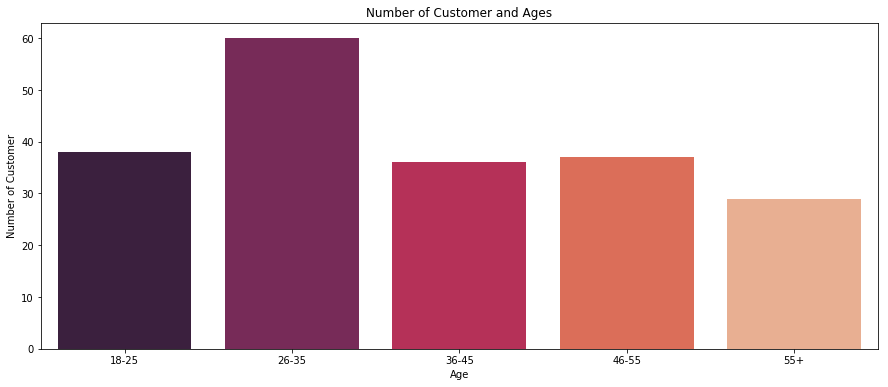

In [119]:
# no of customers as per age 
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

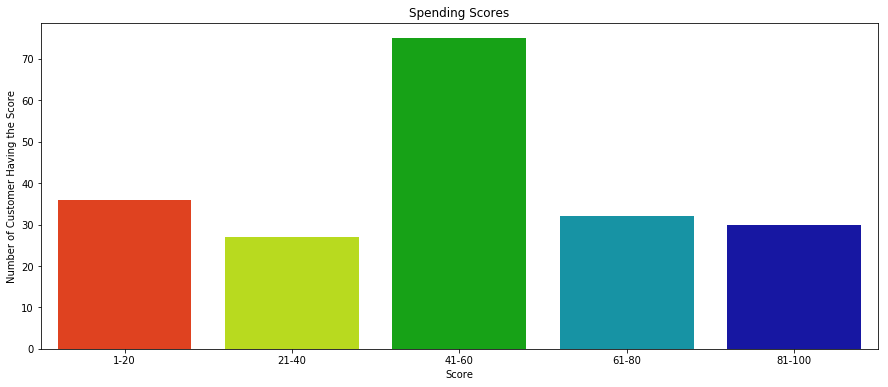

In [120]:
# spending scores
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

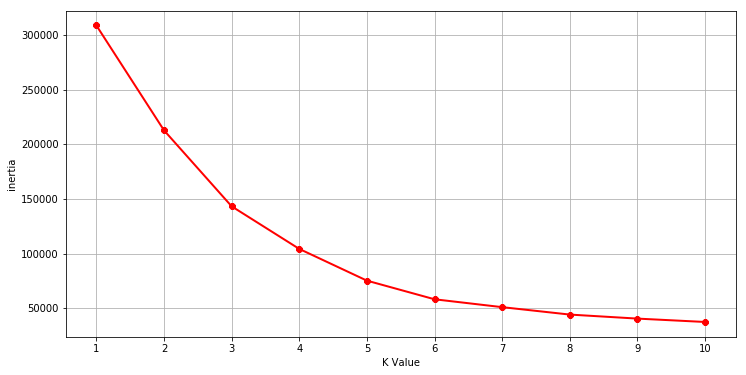

In [121]:
# k means choosing k using elbow method with inertia vs no of k clusters 
from sklearn.cluster import KMeans

inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),inertia, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("inertia")
plt.show()

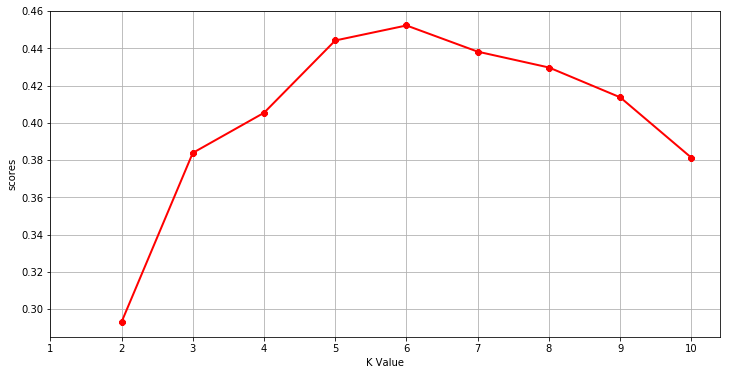

In [122]:
# plotting accuracy for different clusters using Silhouette score 
scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    score = metrics.silhouette_score(df.iloc[:,1:],kmeans.labels_)
    scores.append(score)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(2,11),scores, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("scores")
plt.show()

In [123]:
# evaluation
from sklearn.metrics import silhouette_score, v_measure_score

for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=0).fit(df.iloc[:,1:])
    preds = km.predict(df.iloc[:,1:])
    # accuracy score 
    print("Score for number of cluster(s) {}: {}".format(i,abs(km.score(df.iloc[:,1:]))))
    # silhouette score 
    silhouette = silhouette_score(df.iloc[:,1:],preds)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    # v measure 
    """
    v_measure = v_measure_score(y,preds)
    print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    """
    print("-"*100)

Score for number of cluster(s) 2: 212840.16982097196
Silhouette score for number of cluster(s) 2: 0.293166070535953
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: 143342.751571706
Silhouette score for number of cluster(s) 3: 0.3839349967742105
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: 104366.15145556205
Silhouette score for number of cluster(s) 4: 0.40546302077733304
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: 75350.77917248779
Silhouette score for number of cluster(s) 5: 0.44428597560893024
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 6: 58300.44332159071
Silhouette score for number of cluster(s) 6: 0.4523443947724053
--------------

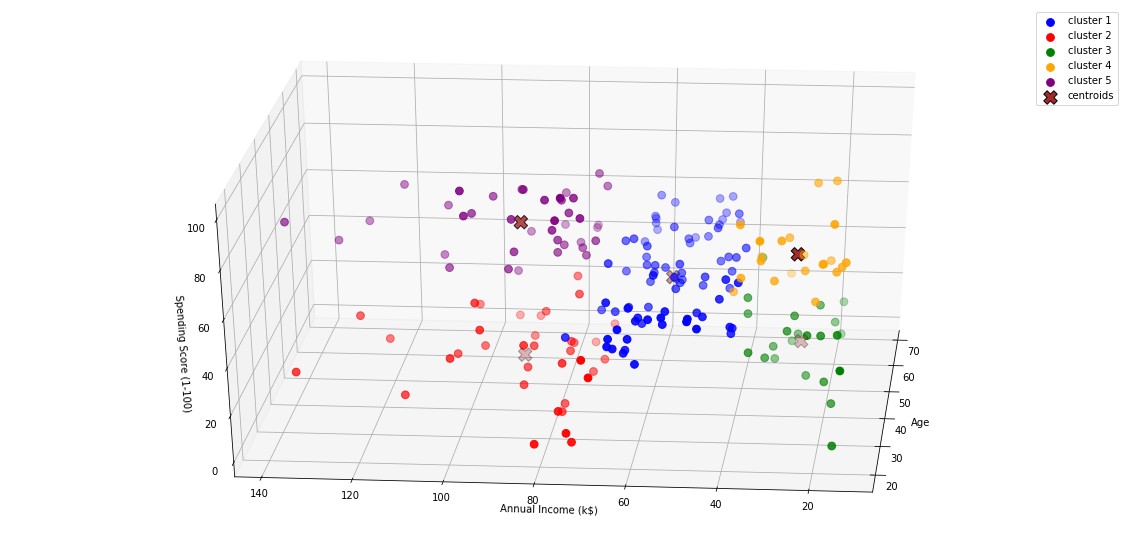

In [124]:
# vizualizing the clusters based on all the features 
km = KMeans(n_clusters=5)
# fit and predict 
clusters = km.fit_predict(df.iloc[:,1:])

df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60, label='cluster 1')
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60, label='cluster 2')
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60, label='cluster 3')
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60, label='cluster 4')
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60, label='cluster 5')
ax.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],km.cluster_centers_[:, 2],
    s=180, marker='X',
    c='brown', edgecolor='black',
    label='centroids'
)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
# Clustering national anthems 

In [125]:
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk import SnowballStemmer
from unidecode import unidecode

In [126]:
# importing the data 
data = pd.read_csv('data/anthems/anthems.csv', encoding='utf-8')
data.columns = map(str.lower, data.columns)
continents = ['Europe', 'South_America', 'North_America','Asia','Africa','Oceania']
data = data.loc[data['continent'].isin(continents)]
# indian anthem 
data[data['country'] == 'India']['anthem'][97]

"Thou art the ruler of the minds of all people, Dispenser of India's destiny. Thy name rouses the hearts of Punjab, Sindh,  Gujarat and Maratha, Of the Dravida and Odisha and Bengal; It echoes in the hills of Vindhya and the Himalayas, Mingles in the music of Ganga and Yamuna and is chanted by The waves of the Indian sea. They pray for thy blessings and sing thy praise. The saving of all people waits in thy hand, Thou dispenser of India's destiny. Victory, victory, victory to thee"

In [127]:
# pre processing(stop words and stemming)
# remove specefic words 
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

In [128]:
def processCorpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    # get all the countries, nationalities and other kinds of words 
    countries_list = [line.rstrip('\n') for line in open('data/anthems/lists/countries.txt')] # Load .txt file line by line
    nationalities_list = [line.rstrip('\n') for line in open('data/anthems/lists/nationalities.txt')] # Load .txt file line by line
    other_words = [line.rstrip('\n') for line in open('data/anthems/lists/stopwords_scrapmaker.txt')] # Load .txt file line by line
    
    for document in corpus:
        index = corpus.index(document)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
        
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)
        listOfTokens = removeWords(listOfTokens, countries_list)
        listOfTokens = removeWords(listOfTokens, nationalities_list)
        listOfTokens = removeWords(listOfTokens, other_words)
        
        listOfTokens = applyStemming(listOfTokens, param_stemmer)
        listOfTokens = removeWords(listOfTokens, other_words)
        
        corpus[index]   = " ".join(listOfTokens)
        # Transliterate an Unicode object into an ASCII string
        corpus[index] = unidecode(corpus[index])

    return corpus

In [129]:
language = 'english'
# prepare a corpus of anthems 
corpus = data['anthem'].tolist()
corpus = processCorpus(corpus, language)
# preprocessed indian anthem 
corpus[87][0:460]

'stand peopl sing jubil prepar accept respons steadfast righteous love peopl steadfast righteous love peopl attain content peac peopl achiev heart beat love promot happi uniti love promot happi uniti beseech god protect lead day love hand bless govern peopl bless govern peopl'

In [130]:
# vectorize it 
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())
final_df = tf_idf

In [131]:
# k means 
def run_KMeans(max_k, data):
    inertia = []
    kmeans_results = dict()
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters = k, init = 'k-means++')
        # create a dict 
        kmeans_results.update({k : kmeans.fit(data)})
        # get the inertia list 
        inertia.append(kmeans.inertia_)
    return kmeans_results,inertia

In [132]:
def plot_inertia(max_k,inertia):
    plt.figure(figsize=(12,6))    
    plt.grid()
    plt.plot(range(1,max_k),inertia, linewidth=2, color="red", marker ="8")
    plt.xlabel("K Value")
    plt.xticks(np.arange(1,max_k,1))
    plt.ylabel("inertia")
    plt.show()

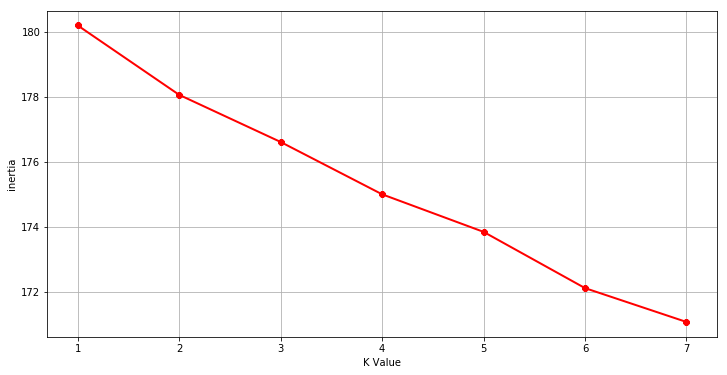

In [133]:
# run k means 
kmeans_results,inertia = run_KMeans(8, final_df)
plot_inertia(8,inertia)

In [134]:
# cluster analysis(top features/words in each cluster with top score)
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

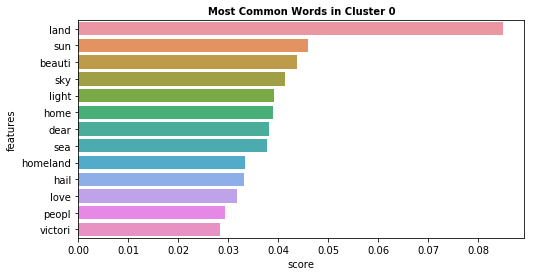

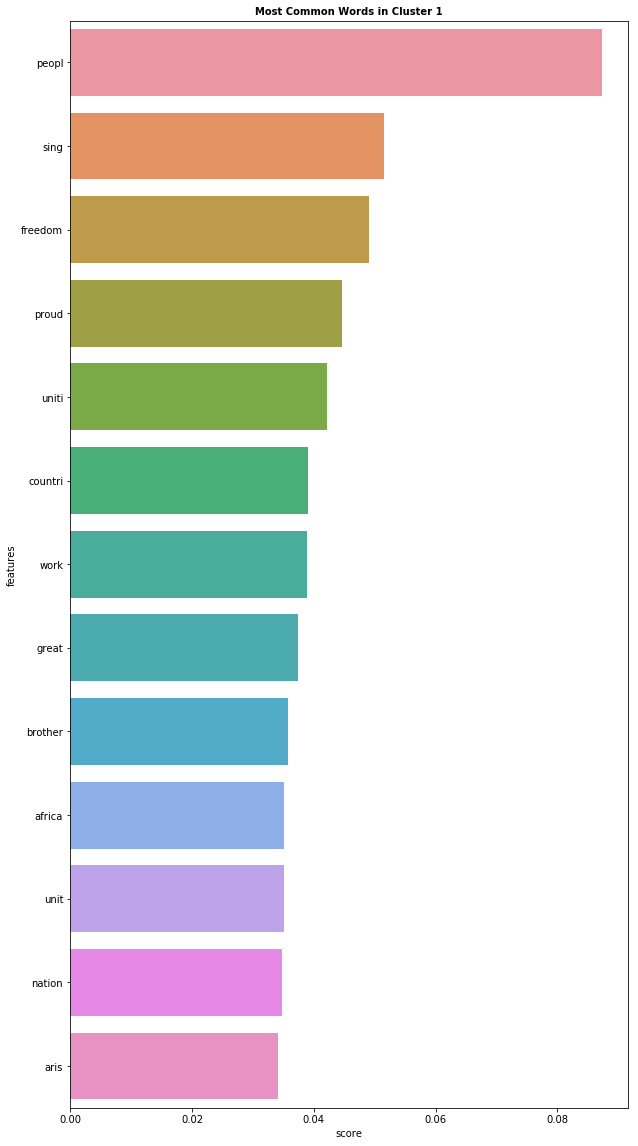

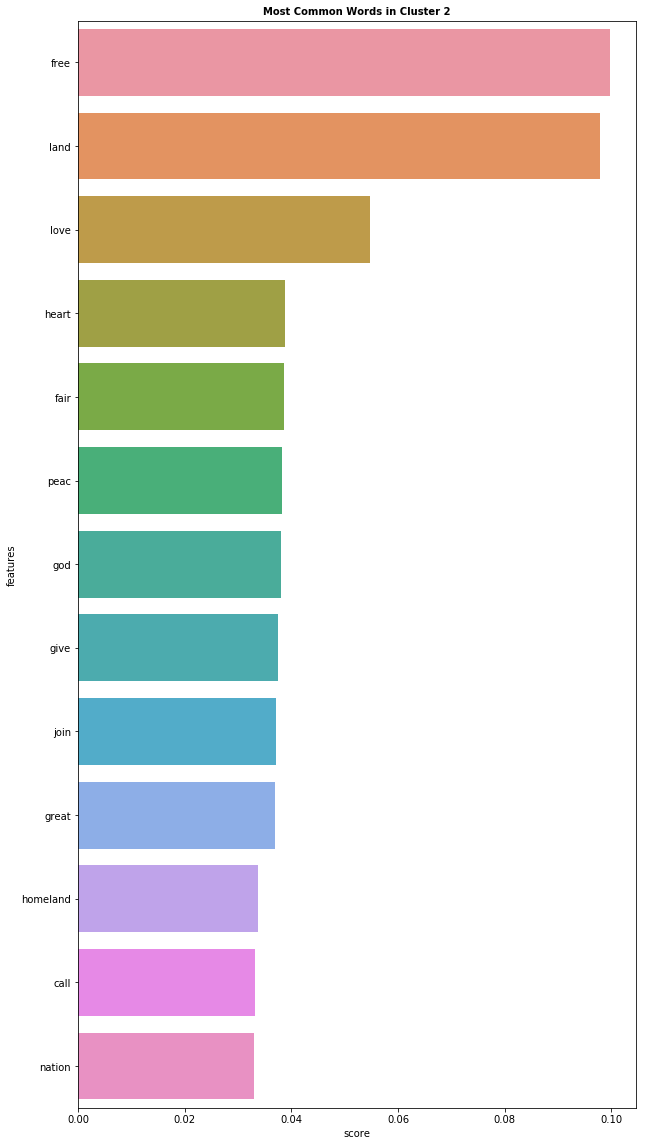

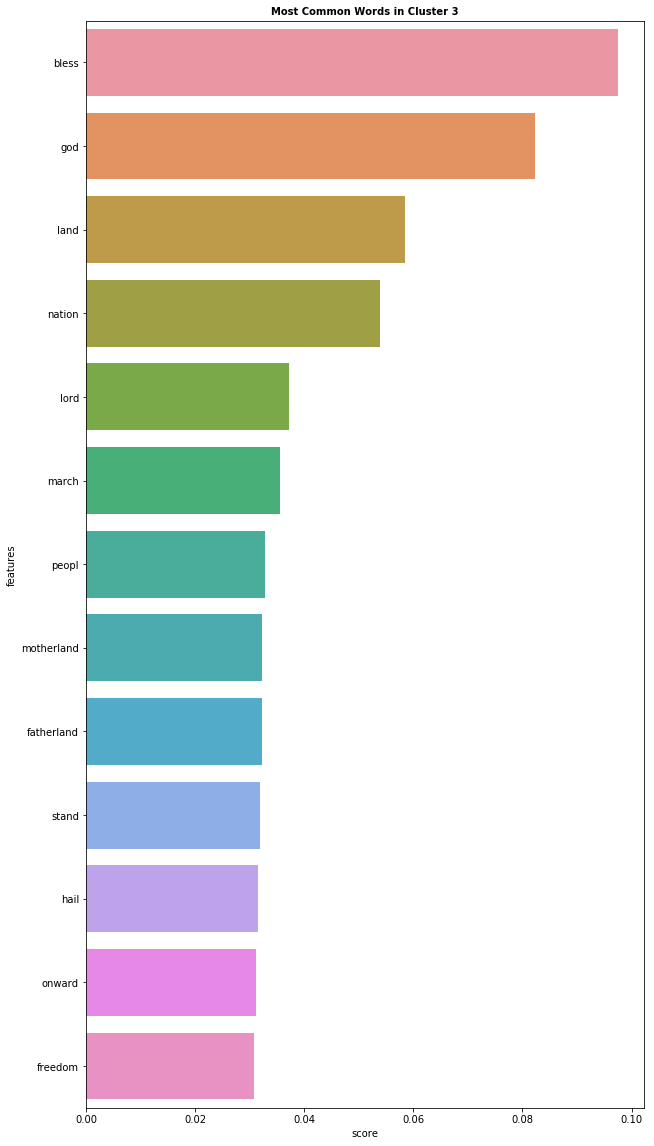

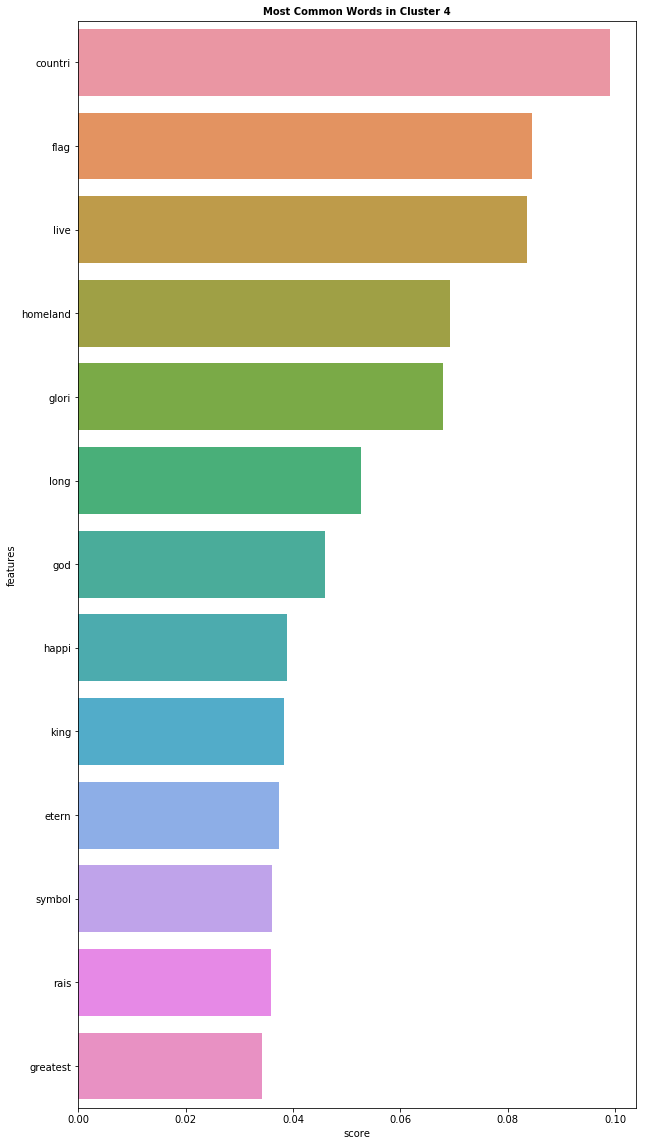

In [135]:
# you can clearly see 3 is the best k value 
kmeans = kmeans_results.get(5)
final_df_array = final_df.to_numpy()
# testing  
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [136]:
# get a word cloud for the created k means cluster model 
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

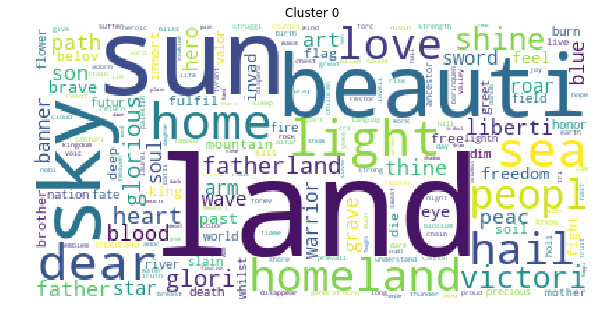

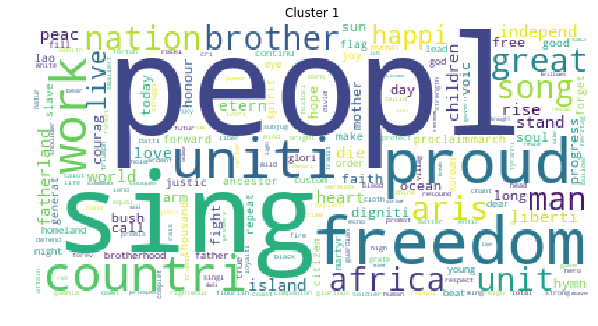

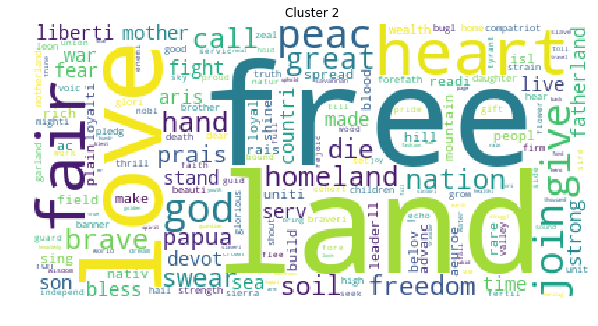

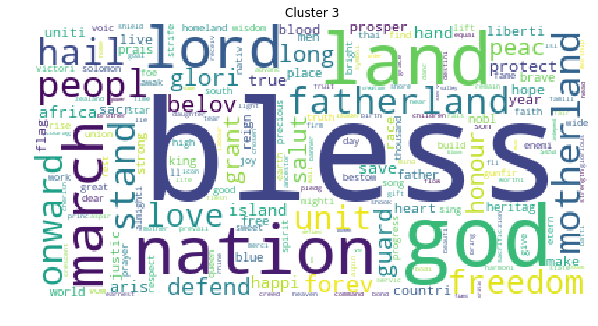

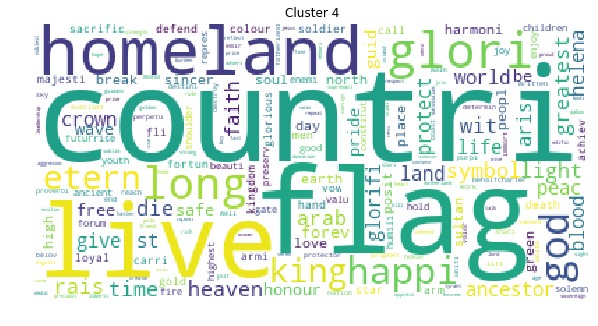

In [137]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [ ]:
"""
Cluster 0 — has words that praise the motherland of each nation
Cluster 1 — has words that praise liberty
Cluster 2 — has words with more religious terms
Cluster 3 — has words that are more related to war
Cluster 4 — has generic words that can be part of any cluster
"""

In [138]:
# assign the labels which are nothing but clusters 
labels = kmeans.labels_ 
data['label'] = labels
# you can clearly see Indian anthem is full of poetry praising liberty so cluster 1 
data[data['country']=='India']['label']

97    0
Name: label, dtype: int32

In [ ]:
# dimensionality reduction using PCA 

In [144]:
from sklearn.preprocessing import normalize
vectorizer = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
X = vectorizer.fit_transform(corpus)
tf_idf_norm = normalize(X)
tf_idf_array = tf_idf_norm.toarray()

In [145]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

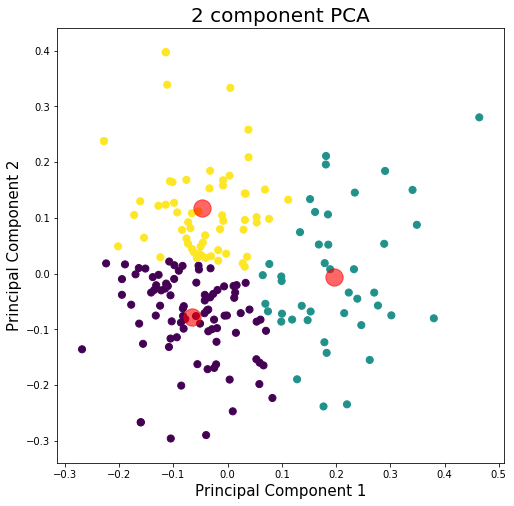

In [146]:
# fit and predict using K means 
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
# viz 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='red', s=300, alpha=0.6)

<h2 style="color:skyblue">Mini Batch K Means</h2><br>
The main idea is to use small random batches of data of a fixed size, so they can be stored in memory. Each iteration a new random sample from the dataset is obtained and used to update the clusters and this is repeated until convergence by applying a learning rate that decreases with the number of iterations. This learning rate is the inverse of the number of data assigned to a cluster during the process. As the number of iterations increases, the effect of new data is reduced, so convergence can be detected when no changes in the clusters occur in several consecutive iterations.The empirical results suggest that it can obtain a substantial saving of computational time at the expense of some loss of cluster quality

In [5]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs
batch_size = 45
centers = [[1, 1], [-2, -1], [1, -2], [1, 9]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples = 3000,
                            centers = centers,
                            cluster_std = 0.9)
# perform the mini batch K-means
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 4,
                      batch_size = batch_size, n_init = 10,
                      max_no_improvement = 10, verbose = 0)
mbk.fit(X)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)
# print the labels of each data
print(mbk_means_labels)

[2 0 2 ... 2 0 1]


<h1 style="color:skyblue">Hierarchical clustering</h1><br>
Hierarchical clustering is similar to regular clustering, except that you’re aiming to build a hierarchy of clusters In terms of outputs from the algorithm, in addition to cluster assignments you also build a nice tree that tells you about the hierarchies between the clusters. You can then pick the number of clusters you want from this tree.<br>
two types<br>
1)Agglomerative(bottom-up):-initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.<br>
steps:<br>
i)Compute the proximity matrix<br>
ii)Let each data point be a cluster<br>
iii)Repeat: Merge the two closest clusters and update the proximity matrix<br>
iv)Until only a single cluster remains<br>
The Hierarchical clustering Technique can be visualized using a Dendrogram;A Dendrogram is a tree-like diagram that records the sequences of merges or splits.<br>
2)Divisive(opp of above one - top down)<br>
The number of clusters we need will be the number of vertical lines which are being intersected by the line drawn using the threshold in the dendogram.

## calculating similarity between two clusters(Linkage Clustering) 
1)Min:-similarity of two clusters C1 and C2 is equal to the minimum of the similarity between points Pi and Pj/two closest points such that Pi belongs to C1 and Pj belongs to C2<br>
2)Max:-two farthest points<br>
3)Group Average:- Take all the pairs of points and compute their similarities and calculate the average of the similarities; sim(C1,C2) = ∑ sim(Pi, Pj)/|C1|*|C2|<br>
4)Ward's method(Euclidean dist):-calculates the sum of the square of the distances Pi and PJ; sim(C1,C2) = ∑ (dist(Pi, Pj))²/|C1|*|C2|

In [ ]:
# Customer Segmentation problem using Hierarchical Clustering

In [59]:
data = pd.read_csv('data/customers data.csv')
data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [60]:
# normalize the data 
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  0.000112  0.000168  0.708333  0.539874  0.422741  0.011965   
1  0.000125  0.000188  0.442198  0.614704  0.599540  0.110409   
2  0.000125  0.000187  0.396552  0.549792  0.479632  0.150119   
3  0.000065  0.000194  0.856837  0.077254  0.272650  0.413659   
4  0.000079  0.000119  0.895416  0.214203  0.284997  0.155010   

   Detergents_Paper  Delicassen  
0          0.149505    0.074809  
1          0.206342    0.111286  
2          0.219467    0.489619  
3          0.032749    0.115494  
4          0.070358    0.205294

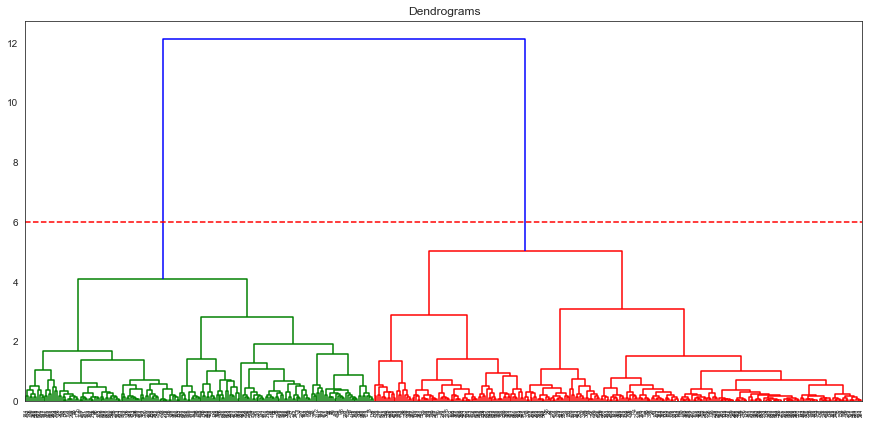

In [64]:
# draw dendogram to decide no of clusters and use a threshold of 6 
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [150]:
# you can see that 2 is no of clusters needed
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

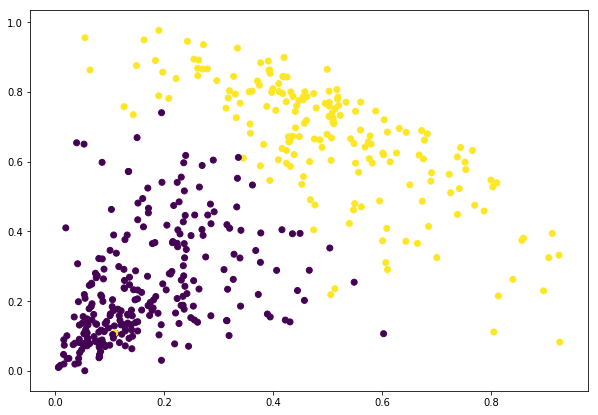

In [151]:
# viz it 
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

<h1 style="color:skyblue">Fuzzy C Means Clustering</h1>
<h2 style="color:skyblue">Hard Clustering vs Soft Clustering</h2>

In hard(exclusive) clustering, each data point is clustered or grouped to any one cluster. For each data point, it may either completely belong to a cluster or not, primary example is K Means. In soft(overlapping) clustering, instead of putting each data points into separate clusters, a probability of that point to be in that cluster assigned. In soft clustering or fuzzy clustering, each data point can belong to multiple clusters along with its probability score or likelihood.<br>
Fuzzy C-Means clustering is a soft clustering approach, where each data point is assigned a likelihood or probability score to belong to that cluster<br>

In [4]:
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [2]:
n_samples = 5000

X = np.concatenate((
    np.random.normal((-2, -2), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2))
))

In [3]:
fcm = FCM(n_clusters=2)
fcm.fit(X)

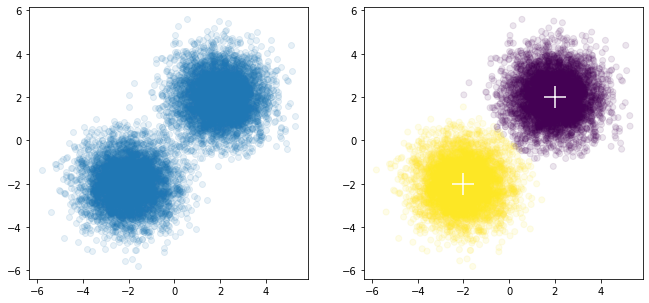

In [4]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.show()

<h1 style = "color:skyblue">Outlier Detection and Removal</h1> 

Outliers are defined as samples that are exceptionally far from the mainstream of data. The presence of outliers 
in a classification or regression dataset can result in a poor fit and lower predictive modeling performance.<br>

1.)Local Outlier Factor:-<br>
It uses nearest neighbours for outlier detection. Each example is assigned a scoring of how isolated or how likely 
it is to be outliers based on the size of its local neighborhood. Those examples with the largest score are more 
likely to be outliers.<br>

2.)Isolation Forrest:-Tree based anomoly detection<br>

In [3]:
# local outlier factor 
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(339, 13) (339,)
(305, 13) (305,)
MAE: 3.356


In [5]:
# isolation forrest
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
print('Isolation forrest predicted better than local outlier factor with less error')

(339, 13) (339,)
(305, 13) (305,)
MAE: 3.291
Isolation forrest predicted better than local outlier factor with less error


In [2]:
# local outlier factor 
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(339, 13) (339,)
(305, 13) (305,)
MAE: 3.356


<h1 style="color:skyblue">DBSCAN(Density-based spatial clustering of applications with noise) Clustering</h1><br>
DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.<br>
The main concept of DBSCAN algorithm is to locate regions of high density that are separated from one another by regions of low density<br>
terminologies:<br>
1)Density at a point P: Number of points within a circle of Radius Eps (ϵ) from point P.<br>
2)Dense Region: For each point in the cluster, the circle with radius ϵ contains at least minimum number of points<br>
3)Core Points: lie usually within the interior of a cluster; also called dense points<br> 
4)Border Point: lies in the neighborhood of another core point; A border point has ε-neighborhood that contains less than MinPts points (so it’s not a core point), but it belongs to the ε-neighborhood of another core point.<br> 
5)Noise: is any data point that is neither core nor border point<br>
6)Directly Density Reachable: a is directly density reachable from a point b if b is a core point and a is in the epsilon neighborhood of b.<br>
7)Density Reachable: Point a is density reachable from a point b with respect to ϵ and MinPts; for a chain of points b1 to bn bi+1 is Directly Density Reachable from bi<br>
8)Density Connected: if there exists a common core point, from which these borders points are density reachable<br>
Note:A point a is density connected to b w.r.t ϵ and MinPts if there is a point c such that a and b are density reachable from c w.r.t ϵ and MinPts<br>
Parameters:<br>
1)eps: specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors; small eps values are preferable.<br>
2)minPoints: the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region; The minimum value for the minPoints must be 3, but the larger the data set, the larger the minPoints value that should be chosen.<br>
steps:<br>
1)The algorithm starts with an arbitrary point which has not been visited and its neighborhood information is retrieved from the ϵ parameter.<br>
2)If this point contains MinPts within ϵ neighborhood, cluster formation starts. Otherwise the point is labeled as noise. This point can be later found within the ϵ neighborhood of a different point and, thus can be made a part of the cluster. Concept of density reachable and density connected points are important here.<br>
3)If a point is found to be a core point then the points within the ϵ neighborhood is also part of the cluster. So all the points found within ϵ neighborhood are added, along with their own ϵ neighborhood, if they are also core points.<br>
4)The above process continues until the density-connected cluster is completely found.<br>
5)The process restarts with a new point which can be a part of a new cluster or labeled as noise.

In [ ]:
# outlier detection for customer data 

In [152]:
from sklearn.cluster import DBSCAN

In [153]:
df = pd.read_csv("data/customers data with outliers.csv")
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [154]:
# feature selection
df.drop(["Channel", "Region"], axis = 1, inplace = True)

In [155]:
# feature scaling 
df = df[["Grocery", "Milk"]]
df = df.as_matrix().astype("float32", copy = False)
stscaler = StandardScaler().fit(df)
df = stscaler.transform(df)

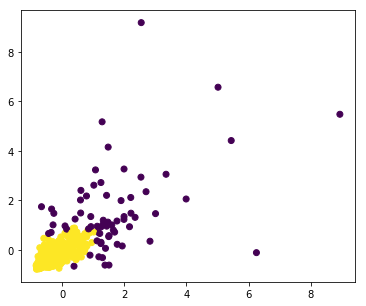

In [156]:
# train the model 
cluster = DBSCAN(eps = 0.3, min_samples= 15)
cluster.fit(df)
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(df[:,0], df[:,1], c=cluster.labels_)
# you can clearly see the outliers 
fig.show()

# Feature Extraction(Dimensionality Reduction)
Feature Extraction aims to reduce the number of features in a dataset by creating new features from the existing ones (and then discarding the original features). These new reduced set of features should then be able to summarize most of the information contained in the original set of features. In this way, a summarised version of the original features can be created from a combination of the original set.

<h1 style="color:skyblue"> Principal Component Analysis</h1><br>
Curse of Dimensionality:in large dimensional datasets, there might be lots of inconsistencies in the features or lots of redundant features in the dataset, which will only increase the computation time and make data processing and EDA more convoluted<br>
Dimensionality Reduction:To get rid of the curse of dimensionality, a process called dimensionality reduction was introduced. Dimensionality reduction techniques can be used to filter only a limited number of significant features needed for training and this is where PCA comes in.<br>
Principal components analysis (PCA) is a unsupervised dimensionality reduction technique that enables you to identify correlations and patterns in a data set so that it can be transformed into a data set of significantly lower dimension without loss of any important information.<br>
Steps:<br>
1)Standardization of the data<br>
scaling your data in such a way that all the variables and their values lie within a similar range.<br>
2)Computing the covariance matrix<br>
expresses the correlation between the different variables in the data set. It is essential to identify heavily dependent variables because they contain biased and redundant information which reduces the overall performance of the model;If the covariance value is negative, it denotes the respective variables are indirectly proportional to each other;A positive covariance denotes that the respective variables are directly proportional to each other<br>
3)Calculating the eigenvectors and eigenvalues<br>
The idea behind eigenvectors is to use the Covariance matrix to understand where in the data there is the most amount of variance. Since more variance in the data denotes more information about the data, eigenvectors are used to identify and compute Principal Components<br>
Av = λv; A is covariance matrix; v is eigen vector and λ is eigen value and determinant or | A − λI | = 0; use of eigen vectors is higher to lower dimension transformations<br>
4)Computing the Principal Components<br>
Once we have computed the Eigenvectors and eigenvalues, all we have to do is order them in the descending order, where the eigenvector with the highest eigenvalue is the most significant and thus forms the first principal component. The principal components of lesser significances can thus be removed in order to reduce the dimensions of the data.The final step in computing the Principal Components is to form a matrix known as the feature matrix that contains all the significant data variables that possess maximum information about the data.<br>
5)Reducing the dimensions of the data set<br>
The last step in performing PCA is to re-arrange the original data with the final principal components which represent the maximum and the most significant information of the data set. In order to replace the original data axis with the newly formed Principal Components, you simply multiply the transpose of the original data set by the transpose of the obtained feature vector.<br>
Principal Components:<br>
new set of variables that are obtained from the initial set of variables. The principal components are computed in such a manner that newly obtained variables are highly significant and independent of each other. The principal components compress and possess most of the useful information that was scattered among the initial variables.<br>
If your data set is of 5 dimensions, then 5 principal components are computed, such that, the first principal component stores the maximum possible information and the second one stores the remaining maximum info and so on, you get the idea.

In [ ]:
# PCA for data vizualization

In [183]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [184]:
df.head()

sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [185]:
# scaling 
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [186]:
from sklearn.decomposition import PCA

In [187]:
# fitting pca(4 dimensions to 2 dimensions)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [188]:
# The explained variance tells us how much information (variance) can be attributed to each of the principal 
# components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some 
# of the variance (information) when you do this.
print(pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))

[0.72770452 0.23030523] 0.9580097536148199


In [189]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [190]:
# principal components  
finalDf.head()

principal component 1  principal component 2       target
0              -2.264542               0.505704  Iris-setosa
1              -2.086426              -0.655405  Iris-setosa
2              -2.367950              -0.318477  Iris-setosa
3              -2.304197              -0.575368  Iris-setosa
4              -2.388777               0.674767  Iris-setosa

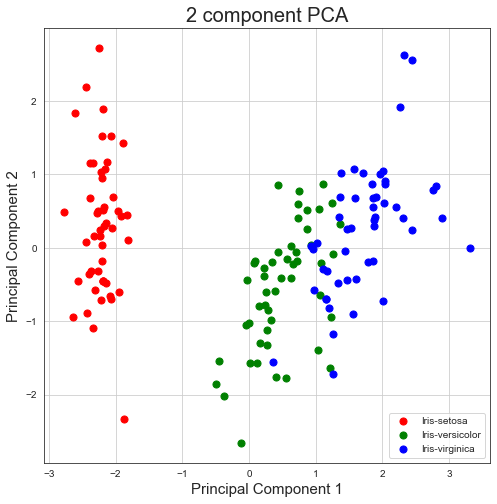

In [191]:
# viz the above pca 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [194]:
# viz mnist of 64 dimensions into 2 clusters 
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [195]:
print("Image Data Shape",digits.data.shape)

Image Data Shape (1797, 64)


[0.14890594 0.13618771] 0.2850936482369779

 Projecting 64-dimensional data to 2D


Text(0.5, 1.0, 'MNIST. PCA projection')

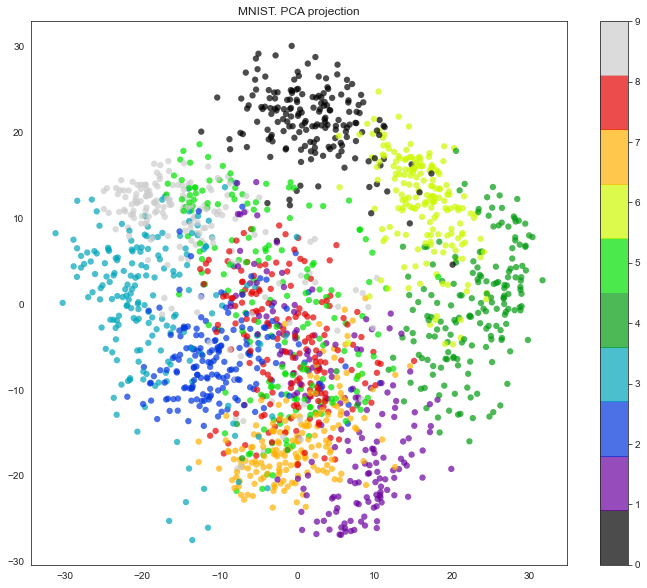

In [196]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
# we can clearly see lots of information is lost when we reduce 64 dimensions to 2d 
print(pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)) 
print('\n Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection')

In [ ]:
# applying pca with logistic regression to speed up the fitting of the algorithm. 

In [200]:
# Importing the dataset
dataset = pd.read_csv('data/Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA(12 dimensions to 2d so information loss will be medium)
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))
cm

[0.36884109 0.19318394] 0.5620250359227312


array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

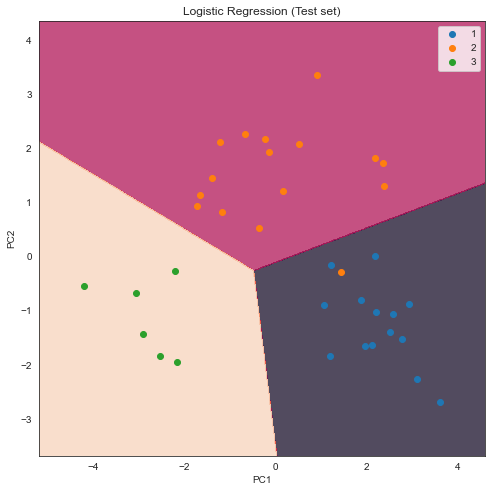

In [201]:
# plotting the components 
fig = plt.figure(figsize = (8,8))
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [202]:
# choose the minimum number of principal components such that 90% of the variance is retained
pca = PCA(n_components = .90)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
print(pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))
print('Number of dimensions after PCA: ' + str(pca.n_components_))
print('Classification accuracy: ' + str(classifier.score(X_test, y_test)))

[0.65627164 0.34372836] 1.0
Number of dimensions after PCA: 2
Classification accuracy: 0.9722222222222222


In [170]:
# applying kernel on PCA for non linear data(two interleaving half circles)
from sklearn.datasets import make_moons 
X, y = make_moons(n_samples = 500, noise = 0.02, random_state = 417) 

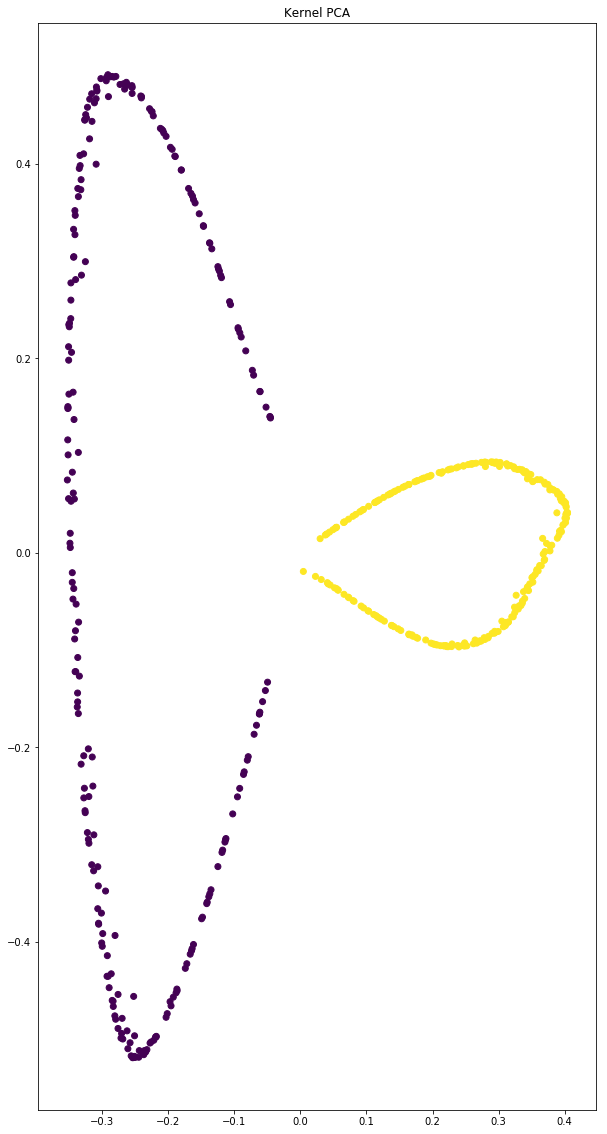

In [171]:
from sklearn.decomposition import KernelPCA 
kpca = KernelPCA(kernel ='rbf', gamma = 15) 
X_kpca = kpca.fit_transform(X) 
plt.title("Kernel PCA") 
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c = y) 
plt.show() 

<h1 style="color:skyblue">Linear Discriminant Analysis (LDA)</h1><br>
Linear Discriminant Analysis or Normal Discriminant Analysis or Discriminant Function Analysis is a dimensionality reduction technique that is commonly used for supervised classification problems. used to find a linear combination of features that best separates two or more classes. It is used for modelling differences in groups i.e. separating two or more classes by projecting the features in higher dimension space into a lower dimension space. It’s commonly used when the classes are linearly separable and the predictors are normally distributed.<br> 
Linear Discriminant Analysis uses both the axes (X and Y) to create a new axis and projects data onto a new axis in a way to maximize the separation of the two categories and hence, reducing the 2D graph into a 1D graph<br>
LDA is supervised learning dimensionality reduction technique; LDA aims to maximize the distance between the mean of each class and minimize the spreading within the class itself. LDA uses therefore within classes and between classes as measures. This is a good choice because maximizing the distance between the means of each class when projecting the data in a lower-dimensional space can lead to better classification results<br>
aim is the distance between data points of different categories after projection more significant and the distance between the data points of the same class more compact.<br>
steps:<br>
Turn the feature data into a matrix.<br>
Compute the mean vector for the different classes.<br>
Compute in-between-class (distance between the means) and within-class (distance between the mean and the data points) scatter matrices.<br>
Construct a lower dimensional space that maximises in-between-class variance and minimises the within-class variance by computing eigen vectors and values<br>
Project the original feature matrix onto this lower dimensional space.

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [81]:
# Importing the dataset
dataset = pd.read_csv('data/Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Applying LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

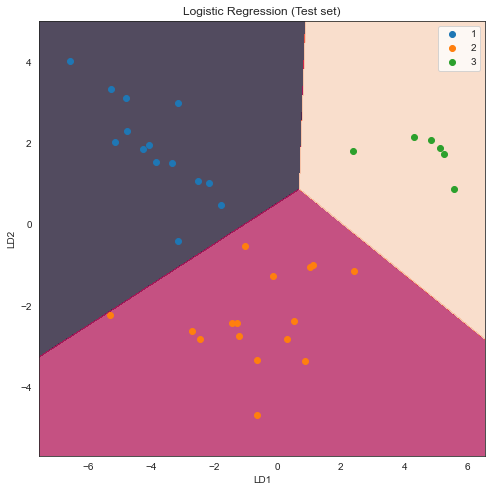

In [82]:
# Visualising the Test set results
fig = plt.figure(figsize = (8,8))
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

<h1 style="color:skyblue">t-Distributed Stochastic Neighbor Embedding (t-SNE)</h1><br>
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. It is extensively applied in image processing, NLP, genomic data and speech processing.It converts similarities between data points to joint probabilities. It minimizes the divergence between two probability distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.In this way, t-SNE maps the multi-dimensional data to a lower dimensional space and attempts to find patterns in the data by identifying clusters based on similarity of data points with multiple features.

   P0  P1  P2  P3  P4  P5  P6  P7  P8  P9  ...  P55  P56  P57  P58  P59  P60  \
0   0   0   5  14   4   0   0   0   0   0  ...    0    0    0    4   12   14   
1   0   0   0   3  16  11   1   0   0   0  ...    0    0    0    0    2   14   
2   0   0   7  11  11   6   0   0   0   9  ...    0    0    0   14   16   12   
3   0   0   9  13   1   0   0   0   0   0  ...    5    0    0    4   15   16   
4   0   0   0  10  12   0   0   0   0   0  ...    0    0    0    1   11   14   

   P61  P62  P63  y  
0    7    0    0  6  
1   14    1    0  1  
2   10    1    0  3  
3   16   16   16  1  
4   12    1    0  6  

[5 rows x 65 columns]


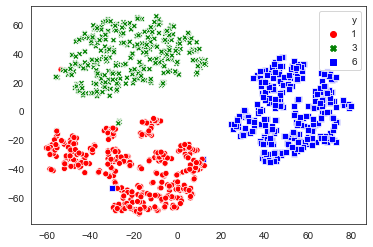

In [93]:
from sklearn.manifold import TSNE  # For tSNE
df = pd.read_csv('data/optdigits.csv') # optical representation of handwritten digits 
print(df.head())
# Separates the attributes P0-P63 into X
X = df.filter(regex='\d')
# Separates the class variable into y
y = df.y
# fit the model(perplexity-> no of neighbours)
tsne = TSNE(
    n_components=2,
    perplexity=10,
    random_state=1)
# Transforms the attribute data
X_tf = tsne.fit_transform(X)
# Creates a scatterplot of the data embedding
sns.scatterplot(
    x=X_tf[:, 0],
    y=X_tf[:, 1],
    style=y,
    hue=y,
    palette=['red', 'green', 'blue'])

<h1 style="color:Black">Regularization</h1><br>
<p>Overfitting vs Underfitting:</p>
If we have very few features on a data-set and the score is poor for both train, test set it’s a problem of under-fitt
On the other hand if we have large number of features and test score is relatively poor than the training score 
then it’s the problem of over fitting<br> 
 Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting<br>
Ridge(L2):-<br>
the cost function is altered by adding a penalty(α) equivalent to square of the magnitude of the coefficients.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;shrinks the coefficients and it helps to reduce the model complexity, as α increases coefficients decreases but we have to keep in mind that α must not be too big as it may shrink coefficients to 0 and cause under fitting<br>
Lasso(L1):-<br>
least absolute shrinkage and selection operator; instead of taking the square of the coefficients, magnitudes are taken into account<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Lasso regression not only helps in reducing over-fitting but it can help us in feature selection<br>
ElasticNet:-Lasso + Ridge 

In [175]:
# Ridge
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['Price']=boston.target
X, y = boston_df.iloc[:,:-1],boston_df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)
lr = LinearRegression()
lr.fit(X_train, y_train)
# ridge regression with shrinking factor given by alpha
# low alpha 
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
# higher alpha value 
rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)
# accuracy scores both train and test 
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.7419034960343789
linear regression test score: 0.7146895989294312
ridge regression train score low alpha: 0.7419030253527293
ridge regression test score low alpha: 0.7145115044376261
ridge regression train score high alpha: 0.7172809669938278
ridge regression test score high alpha: 0.6805838894731009


In [176]:
# Lasso
from sklearn.linear_model import Lasso
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X = cancer.data
Y = cancer.target
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)
# default value 1 
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)
# alpha 0.01
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001) 
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)
# alpha is 0.0001
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001) 
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print("LR training score:", lr_train_score) 
print("LR test score: ", lr_test_score)

training score: 0.5600974529893081
test score:  0.5832244618818156
number of features used:  4
training score for alpha=0.01: 0.7037865778498829
test score for alpha =0.01:  0.6641831577726229
number of features used: for alpha =0.01: 10
training score for alpha=0.0001: 0.7754092006936697
test score for alpha =0.0001:  0.7318608210757918
number of features used: for alpha =0.0001: 22
LR training score: 0.7842206194055069
LR test score:  0.7329325010888685


In [23]:
# Generate cross-validated estimates for each input data point.
from sklearn.linear_model import Lasso
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_predict
diabetes = load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = Lasso()
y_pred = cross_val_predict(lasso, X, y, cv=3)
y_pred

array([174.26933996, 117.6539241 , 164.60228641, 155.65049088,
       132.68647979, 128.49511245, 120.76146877, 141.069413  ,
       164.18904498, 182.37394949, 111.04181265, 127.94311443,
       135.0869234 , 162.83066014, 135.3573514 , 157.64516523,
       178.95843326, 163.3919841 , 143.85237903, 144.29748882,
       133.58117218, 124.77928571, 132.90918003, 208.52927   ,
       153.61908967, 154.16616341, 118.95351821, 163.50467541,
       145.89406196, 168.3308101 , 155.87411031, 123.45960148,
       185.70459144, 133.38468582, 117.2789469 , 150.27895019,
       174.1541028 , 160.03235091, 192.31389633, 161.58568256,
       154.2224809 , 119.35517679, 146.15706413, 133.82056934,
       179.68118754, 137.96619936, 146.07788398, 126.77579723,
       123.32101099, 166.26710247, 146.41559964, 161.67261029,
       147.47731459, 138.44595305, 144.85421048, 113.77990664,
       185.54970402, 115.31624749, 142.23672103, 171.07792136,
       132.5394716 , 177.80524864, 116.5616502 , 134.25

# Boosting

<h1 style="color:skyblue"> Ada Boosting</h1><br>
AdaBoost was the first really successful boosting algorithm developed for the purpose of binary classification. AdaBoost is short for Adaptive Boosting and is a very popular boosting technique that combines multiple “weak classifiers” into a single “strong classifier”.<br><br> 
<u>Steps:-</u><br>
1.)Initialise the dataset and assign equal weight to each of the data point.<br>
2.)Provide this as input to the model and identify the wrongly classified data points.<br>
3.)Increase the weight of the wrongly classified data points.<br>
4.)if (got required results)<br> 
  Goto step 5<br> 
else<br> 
  Goto step 2<br> 
<br><u>Algorithm:-</u><br>
1.)Initially, Adaboost selects a training subset randomly.<br>
2.)It iteratively trains the AdaBoost machine learning model by selecting the training set based on the accurate prediction of the last training.<br>
3.)It assigns the higher weight to wrong classified observations so that in the next iteration these observations will get the high probability for classification.<br>
4.)Also, It assigns the weight to the trained classifier in each iteration according to the accuracy of the classifier. The more accurate classifier will get high weight.<br>
5.)This process iterate until the complete training data fits without any error or until reached to the specified maximum number of estimators.

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [4]:
# DecisionTreeClassifier is the base estimator 
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [5]:
# use other base estimator(SVC)
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='linear')
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


<h1 style="color:skyblue">Gradient Boosting</h1><br>
Boosting: an ensemble technique that takes a iterative approach where it trains models in succession, with each new model being trained to correct the errors made by the previous ones. Models are added sequentially until no further improvements can be made.<br>
Gradient Boosting: an approach where new models are trained to predict the residuals (i.e bias errors) of prior models, It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.When a decision tree is the weak learner,the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest.A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function.<br>
Cost function for regressor is MSE and for classifier is logloss

In [3]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("data/SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
# divide into train and test split 
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)
# train the model
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, train_support = prfs_score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        est, max_depth, lr, round(precision, 3), round(recall, 3), 
        round((y_pred==y_test).sum()/len(y_pred), 3)))
# train the model  
train_GB(150, 11, 0.1)

Est: 150 / Depth: 11 / LR: 0.1 ---- Precision: 0.921 / Recall: 0.838 / Accuracy: 0.968


<h1 style="color:skyblue">XG Boost(Extreme Gradient Boosting)</h1><br>
<h2> Adv of Extreme Gradient Boosting: </h2><br>
1)Speed and performance : written in C++,comparatively faster than other ensemble classifiers.<br>
2)Core algorithm is parallelizable : Because the core XGBoost algorithm is parallelizable it can harness the power of multi-core computers. It is also parallelizable onto GPU’s and across networks of computers making it feasible to train on very large datasets as well.<br>
3)Consistently outperforms other algorithm methods : It has shown better performance on a variety of machine learning benchmark datasets.<br>
4)Wide variety of tuning parameters : XGBoost internally has parameters for cross-validation, regularization(reduce the complexity of the regression function without actually reducing the degree of the underlying polynomial function to avoid over fitting by adding a complexity term to the cost function), user-defined objective functions, missing values, tree parameters(pruning);

## hyper parameters:
1)learning_rate: step size shrinkage used to prevent overfitting(reducing the size of the coefficient estimates). 
  Range is [0,1]<br>
2)max_depth: determines how deeply each tree is allowed to grow during any boosting round.<br>
3)subsample: percentage of samples used per tree. Low value can lead to underfitting.<br>
4)colsample_bytree: percentage of features used per tree. High value can lead to overfitting.<br>
5)n_estimators: number of trees you want to build.<br>
6)objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.<br>
7)Booster:linear base learners and tree learner known as dart. gbtree (default),gblinear or dart.

## regularization parameters:
gamma: controls whether a given node will split based on the expected reduction in loss fn after the split. 
       A higher value leads to fewer splits.<br>
alpha: L1 regularization(sum of absolute values of weights) on leaf weights. A large value leads to more regularization.<br>
lambda: L2 regularization(sum of squared values of weights) on leaf weights and is smoother than L1 regularization.<br>

In [4]:
from sklearn.datasets import load_boston
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [5]:
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
# regression 

In [3]:
boston = load_boston()
import pandas as pd
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target

In [4]:
#DMatrix is a internal data structure that used by XGBoost which is optimized for both memory efficiency 
#and training speed.
X, y = data.iloc[:,:-1],data.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [6]:
# fitting 
# linear regression 
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# train
xg_reg.fit(X_train,y_train)
# test
preds = xg_reg.predict(X_test)

In [7]:
# evaluation
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.398127


In [ ]:
"""
k-fold Cross Validation using XGBoost
parameters
1)n folds:- number of cross validation sets you want to build
2)num_boost_round: denotes the number of trees you build (analogous to n_estimators)
3)metrics: tells the evaluation metrics to be watched during CV
4)as_pandas: to return the results in a pandas DataFrame.
5)early_stopping_rounds: finishes training of the model early if rmse does not improve for a given number of rounds.
seed: for reproducibility of results.
"""

In [8]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [9]:
# you can clearly see train, test errors dec after each boosting round  
cv_results.head()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0        21.680255        0.025604       21.719119       0.019027
1        19.740498        0.072069       19.818879       0.061769
2        18.007259        0.119788       18.109990       0.129533
3        16.463968        0.115143       16.587354       0.182495
4        14.990350        0.112047       15.133081       0.166416

In [10]:
# final boosting metric 
cv_results["test-rmse-mean"].tail(1)

49    3.866448
Name: test-rmse-mean, dtype: float64

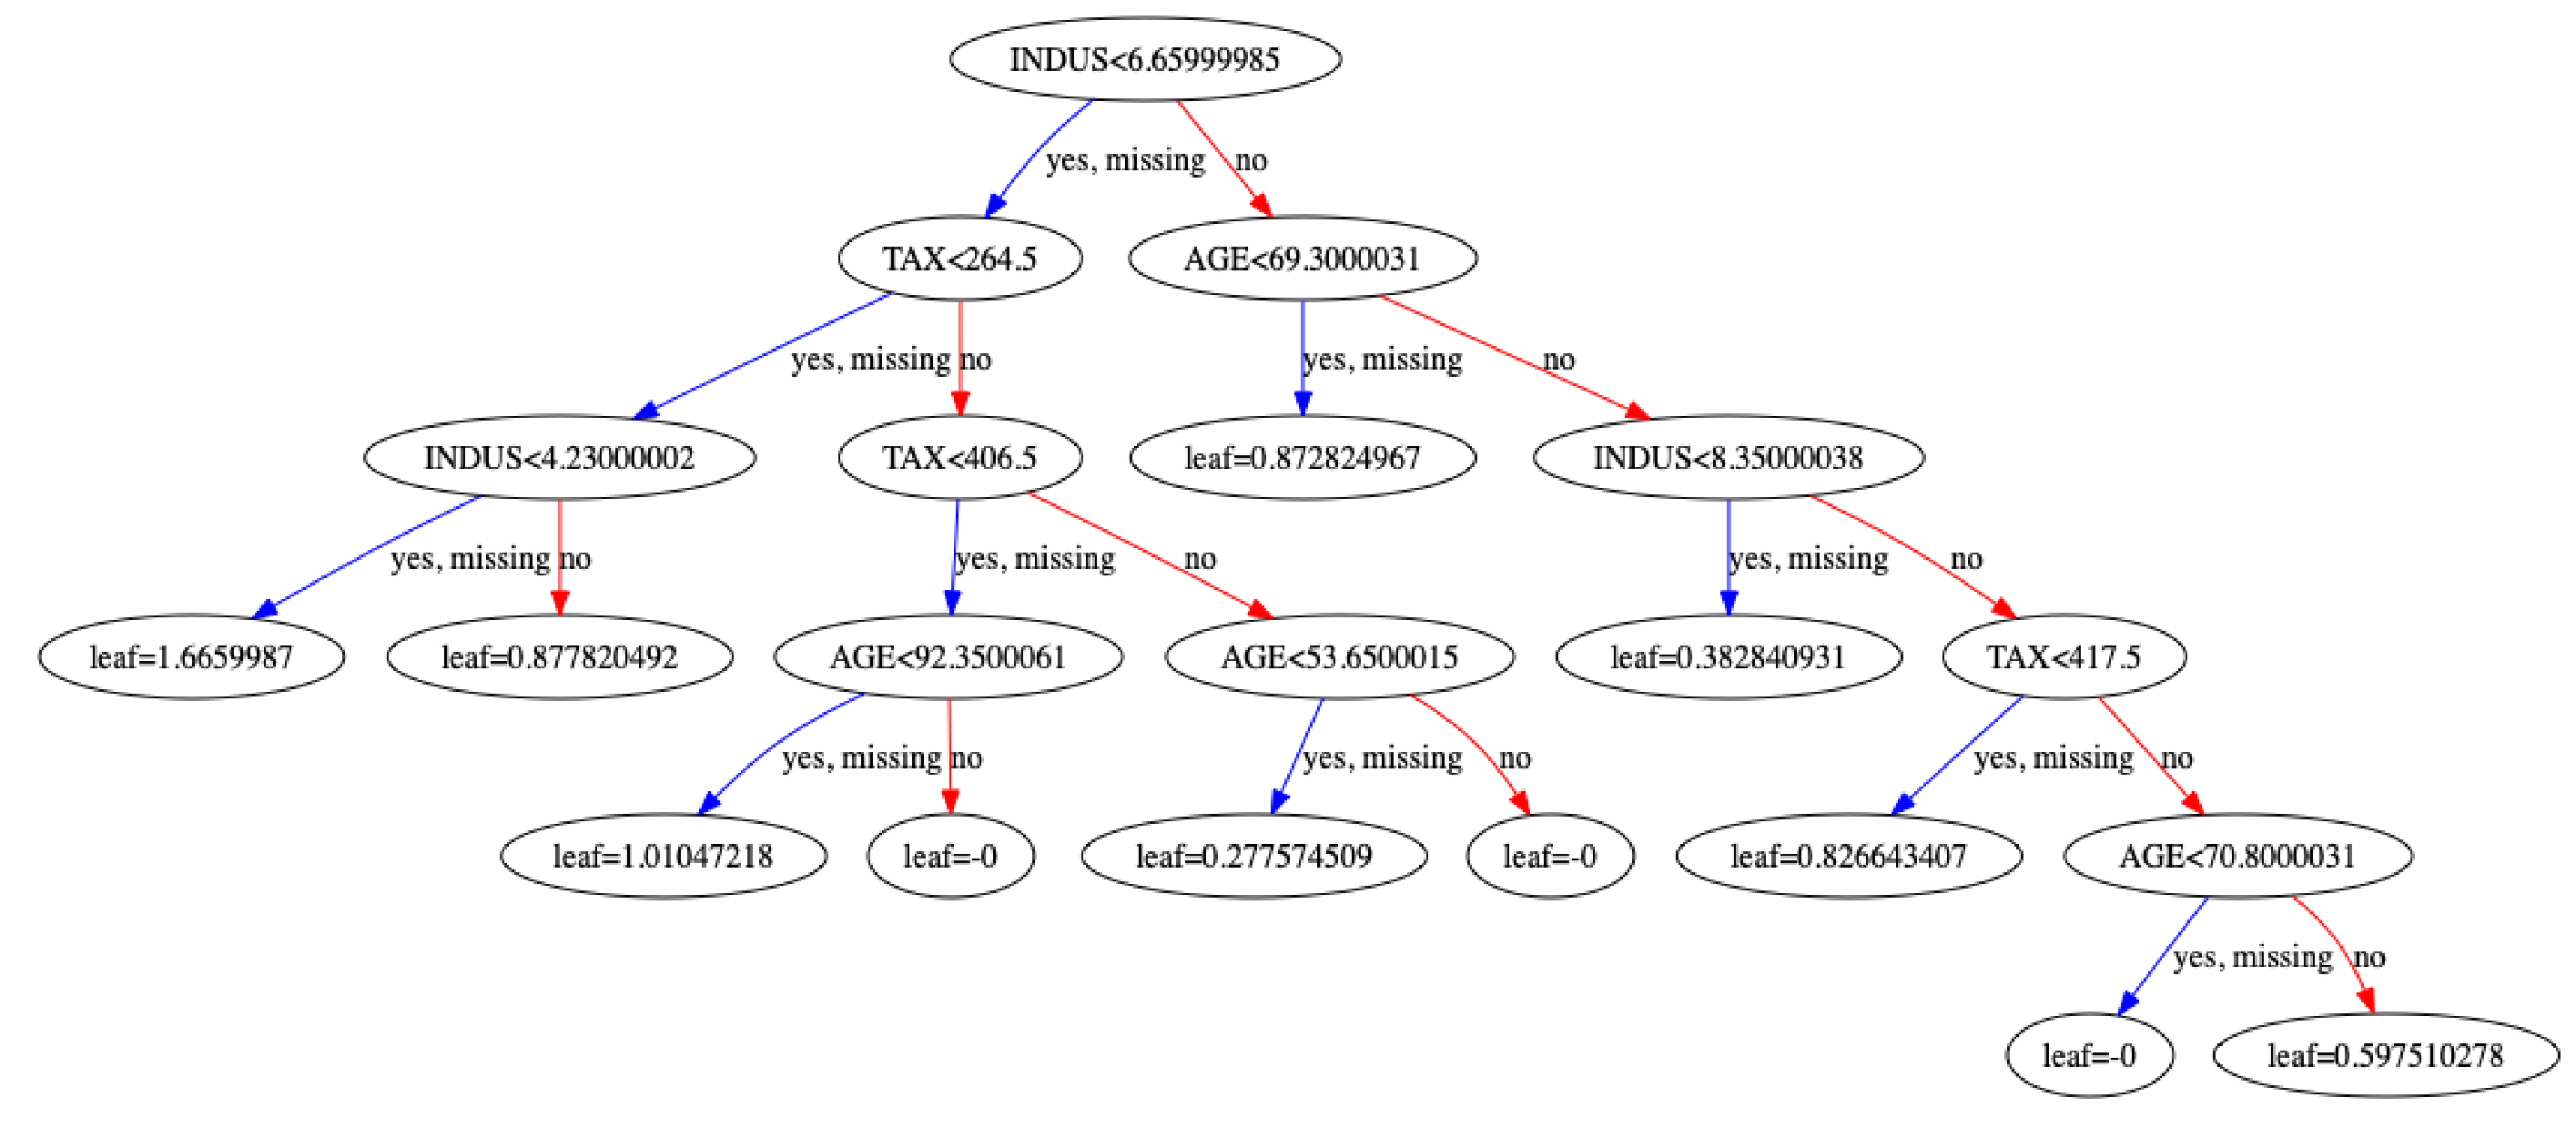

In [12]:
# plotting xg boost tree
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [50, 30]
xgb.plot_tree(xg_reg,num_trees=9)

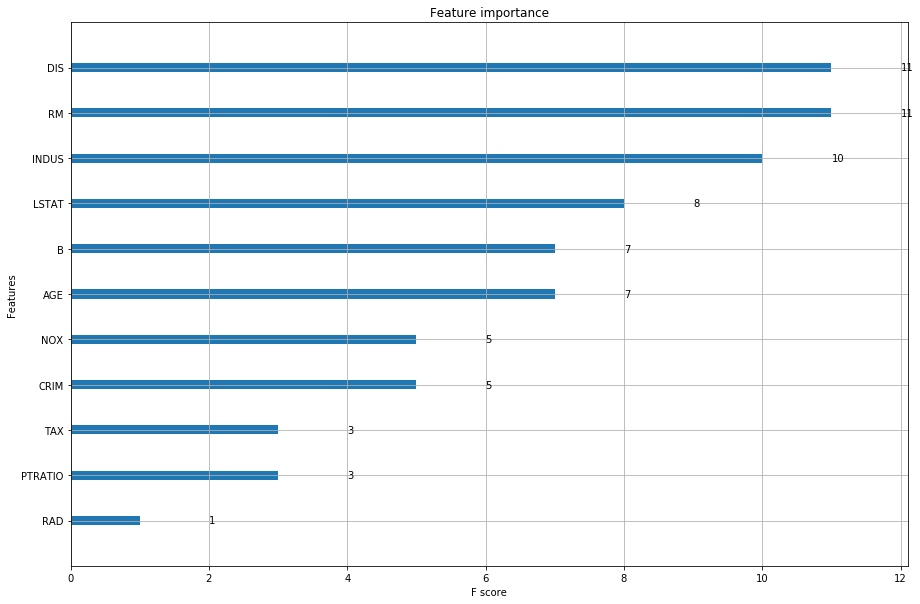

In [14]:
# plotting importance of all the features
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [ ]:
# classification

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [6]:
D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

In [7]:
# params
# eta:- learning rate 
# objective:-multiclass classification
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20 

In [8]:
# fit predict 
model = xgb.train(param, D_train, steps)
preds = model.predict(D_test)

In [9]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

best_preds = np.asarray([np.argmax(line) for line in preds])
print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))

Precision = 0.8897435897435897
Recall = 0.8863636363636364
Accuracy = 0.8666666666666667


In [10]:
# parameter tuning using grid search cv
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...ight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'eta': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'gamma': [0.0, 0.1, 0.

In [14]:
# the best param's, score and estimator are 
print(grid.best_params_,'\n')
print(grid.best_score_)
grid.best_estimator_

{'colsample_bytree': 0.5, 'eta': 0.05, 'gamma': 0.2, 'max_depth': 3, 'min_child_weight': 1} 

-0.09081652072879176


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.05, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Association Rule Mining

<h1 style="color:skyblue">Apriori</h1><br>
Suppose item x is being bought by the customer, then the chances of item y being picked by the customer too under the same Transaction ID is found out<br>
Association rule:an implication expression of the form x → y, where x and y are disjoint itemsets<br>
Market Basket Analysis:<br> 
a type of frequent itemset mining which analyzes customer buying habits by finding associations between the different items that customers place in their “shopping baskets”. The discovery of these associations can help retailers develop marketing strategies by gaining insight into which items are frequently purchased together by customers.<br>
With Market Basket Analysis, the buying patterns of the customers are represented using“Association Rules”.A rule is measured using two metrics viz. support and confidence.<br>
Metrics:<br>
1)support(A => B) = P(A U B) gives the fraction of transactions which contains item x and y; frequently bought items<br>
2)confidence(A => B) = P(B|A) = support(A U B) / support(A) tells us how often the items x and y occur together, given the number times x occurs.<br>
3)Lift(A => B) = Confidence(A, B)/Support(B) indicates the strength of a rule over the random occurrence of x and y<br>
Lift (A => B) = 1 means that there is no correlation within the itemset.<br>
Lift (A => B) > 1 means that there is a positive correlation within the itemset, i.e., products in the itemset, A, and B, are more likely to be bought together.<br>
Lift (A => B) < 1 means that there is a negative correlation within the itemset, i.e., products in itemset, A, and B, are unlikely to be bought together.<br>
It takes into consideration that, that a subset of a “frequent itemset” must also be a “frequent itemset”. The value of “frequent itemset” > than a threshold value(support)<br>
Apriori Algorithm Steps:<br>
1.)candidate item set generation(Mine all frequent item sets):<br>
It takes Fk-1 and returns candidates as superset of set of all frequent itemsets using <u>Pruning</u> & <u>Joining</u> steps.<br>
2.)Generating association rules from frequent item sets:<br>
X is a item set and A,B are candidates of that item set, then A->B is an association rule if<br> a.)confidence(A->B) >= minconf<br>
b.)support(A->B) = support(A U B) = support(X)<br>
c.)confidence(A -> B) = support(A U B) / support(A)<br>

In [25]:
dataset = pd.read_csv('data/Market_Basket_Optimisation.csv', header = None)
transactions = []
for i in range(0, 7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

# Training Apriori on the dataset
from apyori import apriori
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

# Visualising the results
results = list(rules)
# print results
for ind,val in enumerate(results): 
    print(f'frequently bought items {ind}: {val}\n')    

frequently bought items 0: RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])

frequently bought items 1: RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)])

frequently bought items 2: RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)])

frequently bought items 3: RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics

In [26]:
rules_df = pd.DataFrame(
    [{'From': list(rule[0])[0],
    'To': list(rule[0])[1],
    'Support': rule[1],
    'Confidence': rule[2][0][2],
    'Lift': rule[2][0][3]} for rule in results if len(rule[0]) == 2])
rules_df = rules_df.dropna()
rules_df.head()

From                    To   Support  Confidence      Lift
0      chicken           light cream  0.004533    0.290598  4.843951
1     escalope  mushroom cream sauce  0.005733    0.300699  3.790833
2        pasta              escalope  0.005866    0.372881  4.700812
3        honey         fromage blanc  0.003333    0.245098  5.164271
4  ground beef         herb & pepper  0.015998    0.323450  3.291994

In [27]:
# top 5 items based on support 
rules_df.sort_values('Support', ascending=False).head(5).reset_index(drop = True)

From                    To   Support  Confidence      Lift
0  ground beef         herb & pepper  0.015998    0.323450  3.291994
1    olive oil     whole wheat pasta  0.007999    0.271493  4.122410
2        pasta              escalope  0.005866    0.372881  4.700812
3     escalope  mushroom cream sauce  0.005733    0.300699  3.790833
4  ground beef          tomato sauce  0.005333    0.377358  3.840659

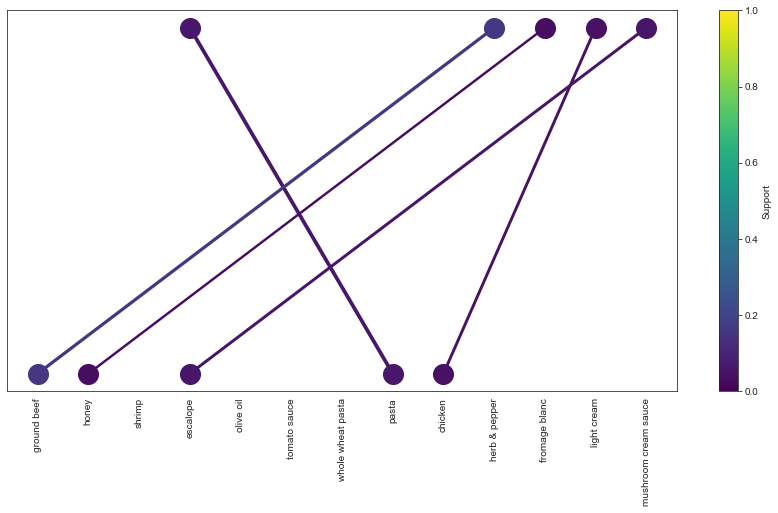

In [30]:
# viz
# List of all items
items = set(rules_df['From']) | set(rules_df['To'])
# Creates a mapping of items to numbers
imap = {item : i for i, item in enumerate(items)}
# Maps the items to numbers and adds the numeric 'FromNo' and 'ToNo' columns
rules_df['FromNo'] = rules_df['From'].map(imap)
rules_df['ToNo'] = rules_df['To'].map(imap)

fig = plt.figure(figsize=(15, 7))
# Draws a line between items for each rule
# Colors each line according to the support of the rule
for index, row in rules_df.head(5).iterrows():
    plt.plot([row['FromNo'], row['ToNo']], [0, 1], 'o-',
             c=plt.cm.viridis(row['Support'] * 10),
             markersize=20,
             lw=row['Confidence'] * 10)
# Adds a colorbar and its title  
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cb.set_label('Support')
# Adds labels to xticks and removes yticks
plt.xticks(range(len(items)), items, rotation='vertical')
plt.yticks([])
plt.show()

<h1 style="color:skyblue">Association Rule Mining(ECLAT)</h1><br>
It is a popular method of association rule mining. It works vertically(like a Depth First Search Traversal) where as
apriori works horizontally(like a Breadth First Search Traversal) and it works faster than apriori and uses less memory.The basic idea is to use Transaction Id Sets(tidsets) intersections to compute the support value of a candidate and avoiding the generation of subsets which do not exist in the prefix tree. In the first call of the function, all single items are used along with their tidsets. Then the function is called recursively and in each recursive call, each item-tidset pair is verified and combined with other item-tidset pairs. This process is continued until no candidate item-tidset pairs can be combined.In every call we filter out those transactions whose suport is less than min support. 

100%|██████████| 169/169 [00:00<00:00, 986.67it/s] 
8it [00:00, 72.63it/s]

Combination 2 by 2


946it [00:13, 70.93it/s]


                From                  To   Support  FromNo  ToNo
0   other vegetables          whole milk  0.074835      12     3
1         rolls/buns          whole milk  0.056634       8     3
2             yogurt          whole milk  0.056024      11     3
3    root vegetables          whole milk  0.048907       6     3
4    root vegetables    other vegetables  0.047382       6    12
5   other vegetables              yogurt  0.043416      12    11
6   other vegetables          rolls/buns  0.042603      12     8
7     tropical fruit          whole milk  0.042298      10     3
8         whole milk                soda  0.040061       3     0
9         rolls/buns                soda  0.038332       8     0
10  other vegetables      tropical fruit  0.035892      12    10
11     bottled water          whole milk  0.034367       7     3
12        rolls/buns              yogurt  0.034367       8    11
13            pastry          whole milk  0.033249       5     3
14  other vegetables     

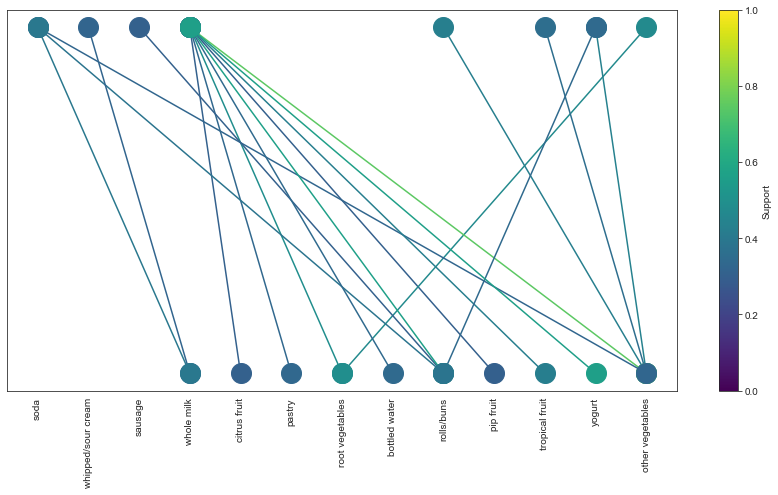

In [52]:
from pyECLAT import ECLAT        
df = pd.read_csv('data/Groceries.csv', header=None)
# create eclat model and fit it 
eclat_instance = ECLAT(data=df, verbose=True)
_, supports = eclat_instance.fit(min_support=0.03,min_combination=2,max_combination=2,separator=' & ',verbose=True)
rows = []
# create a df with items and support value
for rule, support in supports.items():
    from_, to = rule.split(' & ')
    rows.append({
        'From': from_,
        'To': to,
        'Support': support
    })
rules_df = pd.DataFrame(rows)
# List of all items
items = set(rules_df['From']) | set(rules_df['To'])
# Creates a mapping of items to numbers
imap = {item : i for i, item in enumerate(items)}
# Maps the items to numbers and adds the numeric 'FromNo' and 'ToNo' columns
rules_df['FromNo'] = rules_df['From'].map(imap)
rules_df['ToNo'] = rules_df['To'].map(imap)
# Displays the top 20 association rules, sorted by Support
print(rules_df.head(20).sort_values(by='Support', ascending=False).reset_index(drop=True))
# visualize 
fig = plt.figure(figsize=(15, 7))
# Draws a line between items for each rule
# Colors each line according to the support of the rule
for index, row in rules_df.iterrows():
    plt.plot([row['FromNo'], row['ToNo']], [0, 1], 'o-',
             c=plt.cm.viridis(row['Support'] * 10),
             markersize=20)
# Adds a colorbar and its title  
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cb.set_label('Support')
# Adds labels to xticks and removes yticks
plt.xticks(range(len(items)), items, rotation='vertical')
plt.yticks([])
plt.show()

<h1 style="color:skyblue">Association Rule Mining(FP Growth)</h1><br>
Similar to Eclat its faster than apriori for frequent pattern mining or associative rule mining by using a tree structure(FP-tree) to store all the information. The root represents null, each node represents an item, while the association of the nodes is the itemsets with the order maintained while forming the tree. The FP-tree is concise and is used to directly generating large itemsets. Once an FP-tree has been constructed, it uses a recursive divide-and-conquer approach to mine the frequent itemsets.<br>
<p>FP-tree Pseudocode and Explanation:</p>
Step 1: Deduce the ordered frequent items. For items with the same frequency, the order is given by the alphabetical order.<br>
Step 2: Construct the FP-tree from the above data<br>
Step 3: From the FP-tree above, construct the FP-conditional tree for each item (or itemset) using a header table built during construction of FP-tree.<br>
Step 4: Determine the frequent patterns.<br>

In [55]:
transactions = []
with open('data/Groceries.csv') as f:
    for line in f:
        transaction = [item for item in line.strip().split(',') if item != 'NaN']
        transactions.append(transaction)

     support                             itemsets                From  \
0   0.074835       (other vegetables, whole milk)    other vegetables   
1   0.056634             (rolls/buns, whole milk)          rolls/buns   
2   0.056024                 (yogurt, whole milk)              yogurt   
3   0.048907        (root vegetables, whole milk)     root vegetables   
4   0.047382  (root vegetables, other vegetables)     root vegetables   
5   0.043416           (yogurt, other vegetables)              yogurt   
6   0.042603       (rolls/buns, other vegetables)          rolls/buns   
7   0.042298         (tropical fruit, whole milk)      tropical fruit   
8   0.040061                   (soda, whole milk)                soda   
9   0.038332                   (rolls/buns, soda)          rolls/buns   
10  0.035892   (tropical fruit, other vegetables)      tropical fruit   
11  0.034367                 (rolls/buns, yogurt)          rolls/buns   
12  0.034367          (bottled water, whole milk)  

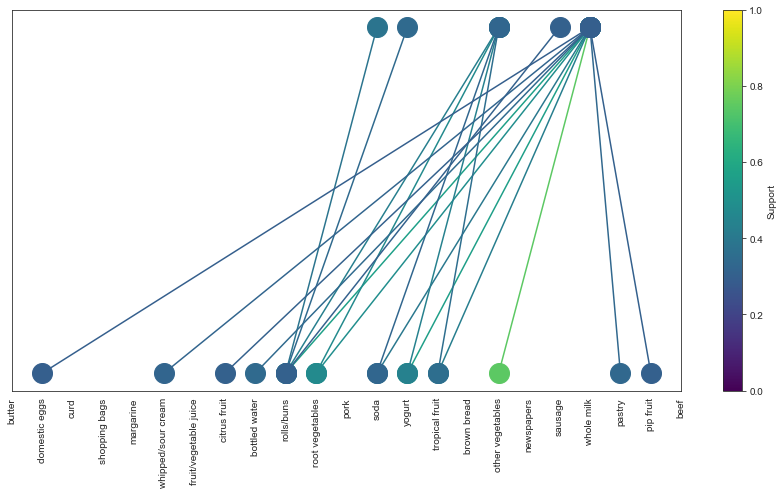

In [58]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
# encoding the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
# model fitting 
rules_df = fpgrowth(df, min_support=0.01, use_colnames=True, max_len=2, verbose=False)
rules_df = rules_df[rules_df.itemsets.map(len) == 2] # min support should be 2 
rules_df['From'] = rules_df['itemsets'].map(lambda x: list(x)[0])
rules_df['To'] = rules_df['itemsets'].map(lambda x: list(x)[1])
rules_df['N'] = (rules_df['support'] * len(transactions)).astype(int)
rules_df.sort_values('N', ascending=False, inplace=True)
rules_df = rules_df.sort_values('N', ascending=False).head(50)
# List of all items
items = set(rules_df['From']) | set(rules_df['To'])
# Creates a mapping of items to numbers
imap = {item : i for i, item in enumerate(items)}
# Maps the items to numbers and adds the numeric 'FromNo' and 'ToNo' columns
rules_df['FromNo'] = rules_df['From'].map(imap)
rules_df['ToNo'] = rules_df['To'].map(imap)
# Displays the top 20 association rules, sorted by Support
print(rules_df.head(20).reset_index(drop=True))
# viz 
fig = plt.figure(figsize=(15, 7))
# Draws a line between items for each rule
# Colors each line according to the support of the rule
for index, row in rules_df.head(20).iterrows():
    plt.plot([row['FromNo'], row['ToNo']], [0, 1], 'o-',
             c=plt.cm.viridis(row['support'] * 10),
             markersize=20)
# Adds a colorbar and its title  
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cb.set_label('Support')
# Adds labels to xticks and removes yticks
plt.xticks(range(len(items)), items, rotation='vertical')
plt.yticks([])
plt.show()

<h1 style="color:skyblue">recommendation systems</h1><br>
recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy etc<br><br>
1)collaborative filtering:-<br>
based on the past interactions recorded between users and items in order to produce new recommendations. These interactions are stored in the so-called “user-item interactions matrix”; to detect similar users and/or similar items.<br> 
Big companies like netflix and amazon use this.<br>
collaborative filtering algorithms is divided into memory based and model based approaches<br><br>
Item-Item Collaborative Filtering: “Users who liked this item also liked …”<br>
User-Item Collaborative Filtering: “Users who are similar to you also liked …”<br><br>
i)memory based:- approaches directly works with values of recorded interactions, and are essentially based on nearest neighbours search; have a low bias but a high variance.<br>
a)user-item:identifies users with the most similar “interactions profile” (nearest neighbours) in order to suggest items that are the most popular among these neighbours (and that are “new” to our user). This method is said to be “user-centred” as it represent users based on their interactions with items and evaluate distances between users; we consider that two users are similar if they have interacted with a lot of common items in the same way (similar rating, similar time hovering…); high variance; low bias<br>
b)item-item:find items similar to the ones the user already “positively” interacted with; Two items are considered to be similar if most of the users that have interacted with both of them did it in a similar way. This method is said to be “item-centred” as it represent items based on interactions users had with them and evaluate distances between those items; low variance; high bias<br><br>
ii)Model based: uses ML models that explains the user-item interactions and try to discover new predictions; has higher bias but a lower variance<br>
a)Matrix Factorization:-matrix factorisation algorithms consists in decomposing user-item interaction matrix into a product of user-factor matrix (containing users representations) that multiplies a factor-item matrix (containing items representations); The goal of MF is to learn the latent preferences of users and the latent attributes of items from known ratings (learn features that describe the characteristics of ratings) to then predict the unknown ratings through the dot product of the latent features of users and items;<br> 
steps:<br>
.)there exists some features describing (and telling apart) pretty well movies.<br>
..)these features can also be used to describe user preferences<br>
we don’t want to give explicitly these features to our model; we prefer to let the system discover these useful features by itself and make its own representations of both users and items<br>
a.1)Singular value decomposition:X=USV^T; U matrix represents the feature vectors corresponding to the users in the hidden feature space and the V matrix represents the feature vectors corresponding to the items in the hidden feature space; S are the singular value of X<br>
the more users interact with items the more new recommendations become accurate: for a fixed set of users and items, new interactions recorded over time bring new information and make the system more and more effective.<br>
disadv:-colab suffer from the “cold start problem”: it is impossible to recommend anything to new users or to recommend a new item to any users;<br> 
solution:-<br>
1)random:recommending random items to new users or new items to random users<br>
2)maximum expectation:recommending popular items to new users or new items to most active users<br>
3)exploratory:recommending a set of various items to new users or a new item to a set of various users<br><br>
2)Content Based Filtering:<br>
use additional information about users and/or items; Then, the idea of content based methods is to try to build a model, based on the available “features”, that explain the observed user-item interactions; If we manage to get such model, then, making new predictions for a user is pretty easy, ex's for such features or attributes is genre and year of release and info from IMDB like actor, director names and also critics ratings for movie reviews, there is future scope even to add scene data in movie or a trailer as attributes.    

In [16]:
# movie lens database(recommendation)
import numpy as np
import pandas as pd

In [17]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('data/movielens/u.data', sep='\t', names=column_names)
df.head()

user_id  item_id  rating  timestamp
0        0       50       5  881250949
1        0      172       5  881250949
2        0      133       1  881250949
3      196      242       3  881250949
4      186      302       3  891717742

In [18]:
movie_titles = pd.read_csv("data/movielens/Movie_Id_Titles")
movie_titles.head()

item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)

In [19]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

user_id  item_id  rating  timestamp             title
0        0       50       5  881250949  Star Wars (1977)
1      290       50       5  880473582  Star Wars (1977)
2       79       50       4  891271545  Star Wars (1977)
3        2       50       5  888552084  Star Wars (1977)
4        8       50       5  879362124  Star Wars (1977)

In [ ]:
#EDA

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [21]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

rating  num of ratings
title                                              
'Til There Was You (1997)  2.333333               9
1-900 (1994)               2.600000               5
101 Dalmatians (1996)      2.908257             109
12 Angry Men (1957)        4.344000             125
187 (1997)                 3.024390              41

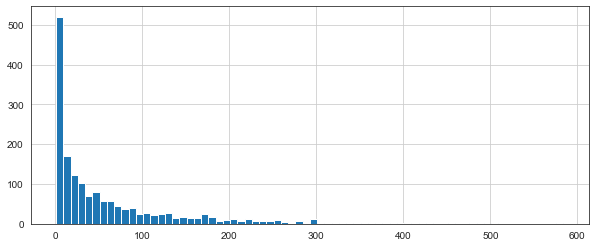

In [22]:
# hist of no of ratings 
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

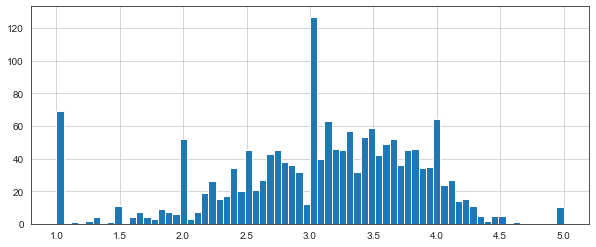

In [23]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

In [24]:
import warnings
warnings.simplefilter(action='ignore')

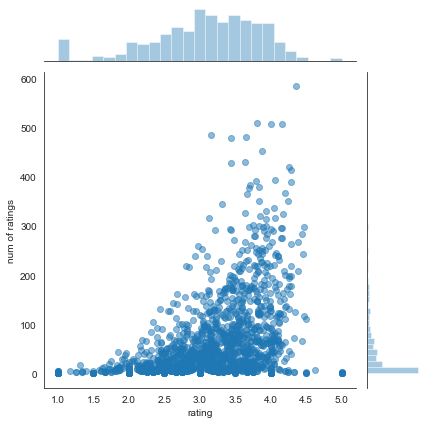

In [25]:
# distplot
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [ ]:
# user item interaction matrix
# now let's create a matrix that has the user ids on one access and the movie title on another axis. 
# Each cell will then consist of the rating the user gave to that movie

In [26]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
0                              NaN           NaN                    NaN   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
0                        NaN         NaN                          NaN   
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
0                                        NaN                           NaN   
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   

title    ...  Yankee Zulu (1994)  Year of the Horse (1997)  \
user_id  ...                                                 
0        ...                 NaN                       NaN   
1        ...                 NaN                       NaN   
2        ...                 NaN                       NaN   
3        ...                 NaN                       NaN   
4        ...                 NaN                       NaN   

title    You So Crazy (1994)  Young Frankenstein (1974)  Young Guns (1988)  \
user_id                                                                      
0                        NaN                        NaN                NaN   
1                        NaN                        5.0                3.0   
2                        NaN                        NaN                NaN   
3                        NaN                        NaN                NaN   
4                        NaN                        NaN                NaN   

title    Young Guns II (1990)  Young Poisoner's Handbook, The (1995)  \
user_id                                                                
0                         NaN                                    NaN   
1                         NaN                                    NaN   
2                         NaN                                    NaN   
3                         NaN                                    NaN   
4                         NaN                                    NaN   

title    Zeus and Roxanne (1997)  unknown  Á köldum klaka (Cold Fever) (1994)  
user_id                                                                        
0                            NaN      NaN                                 NaN  
1                            NaN      4.0                                 NaN  
2                            NaN      NaN                    

In [27]:
# most rated movie
ratings.sort_values('num of ratings',ascending=False).head(10)

rating  num of ratings
title                                                  
Star Wars (1977)               4.359589             584
Contact (1997)                 3.803536             509
Fargo (1996)                   4.155512             508
Return of the Jedi (1983)      4.007890             507
Liar Liar (1997)               3.156701             485
English Patient, The (1996)    3.656965             481
Scream (1996)                  3.441423             478
Toy Story (1995)               3.878319             452
Air Force One (1997)           3.631090             431
Independence Day (ID4) (1996)  3.438228             429

In [28]:
# movie user ratings
starwars_user_ratings = moviemat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [29]:
# get correlation of all movies with a movie w.r.t user ratings 
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

In [30]:
# remove missing values
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

Correlation
title                                 
'Til There Was You (1997)     0.872872
1-900 (1994)                 -0.645497
101 Dalmatians (1996)         0.211132
12 Angry Men (1957)           0.184289
187 (1997)                    0.027398

In [31]:
# top 10 similar movies to star wars 
corr_starwars.sort_values('Correlation',ascending=False).head(10)

Correlation
title                                                          
Man of the Year (1995)                                      1.0
Hollow Reed (1996)                                          1.0
Stripes (1981)                                              1.0
Beans of Egypt, Maine, The (1994)                           1.0
Old Lady Who Walked in the Sea, The (Vieille qu...          1.0
Outlaw, The (1943)                                          1.0
Line King: Al Hirschfeld, The (1996)                        1.0
Hurricane Streets (1998)                                    1.0
Good Man in Africa, A (1994)                                1.0
Safe Passage (1994)                                         1.0

In [32]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

Correlation  num of ratings
title                                                 
'Til There Was You (1997)     0.872872               9
1-900 (1994)                 -0.645497               5
101 Dalmatians (1996)         0.211132             109
12 Angry Men (1957)           0.184289             125
187 (1997)                    0.027398              41

In [33]:
# make sure the similar movie has ratings > 100
# finally get the similar movies and the recommended movies w.r.t star wars 
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

Correlation  \
title                                                             
Star Wars (1977)                                       1.000000   
Empire Strikes Back, The (1980)                        0.748353   
Return of the Jedi (1983)                              0.672556   
Raiders of the Lost Ark (1981)                         0.536117   
Austin Powers: International Man of Mystery (1997)     0.377433   

                                                    num of ratings  
title                                                               
Star Wars (1977)                                               584  
Empire Strikes Back, The (1980)                                368  
Return of the Jedi (1983)                                      507  
Raiders of the Lost Ark (1981)                                 420  
Austin Powers: International Man of Mystery (1997)             130

In [34]:
n_users = df.user_id.nunique()
n_items = df.item_id.nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Movies: '+str(n_items))

Num. of Users: 944
Num of Movies: 1682


In [35]:
# train test split
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25)

In [ ]:
# Memory based collaborative filtering 

In [36]:
#Create two user-item matrices, one for training and another for testing

train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]  

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [37]:
print(train_data_matrix,'\n\n\n',test_data_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 


 [[5. 3. 4. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [38]:
# cosine similarity for finding the neighbours w.r.t users and items 
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')
print(user_similarity, '\n\n\n', item_similarity)

[[0.         0.92499904 0.95845518 ... 0.88662806 0.67071425 0.8690543 ]
 [0.92499904 0.         0.96236829 ... 0.86650429 0.90764637 0.86491419]
 [0.95845518 0.96236829 0.         ... 0.92386691 0.98428603 1.        ]
 ...
 [0.88662806 0.86650429 0.92386691 ... 0.         0.90306439 0.89068263]
 [0.67071425 0.90764637 0.98428603 ... 0.90306439 0.         0.86462051]
 [0.8690543  0.86491419 1.         ... 0.89068263 0.86462051 0.        ]] 


 [[0.         0.68924455 0.77173066 ... 1.         1.         0.94501945]
 [0.68924455 0.         0.86441402 ... 1.         1.         0.91087361]
 [0.77173066 0.86441402 0.         ... 1.         1.         0.87322686]
 ...
 [1.         1.         1.         ... 0.         1.         1.        ]
 [1.         1.         1.         ... 1.         0.         1.        ]
 [0.94501945 0.91087361 0.87322686 ... 1.         1.         0.        ]]


In [39]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [40]:
# predict item based and user based  
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')
print(item_prediction, '\n\n\n', user_prediction)

[[0.35417292 0.36829639 0.39024354 ... 0.42547812 0.42355741 0.41056791]
 [0.08417788 0.09880979 0.09443999 ... 0.10077588 0.10172516 0.1015043 ]
 [0.05732532 0.06066311 0.05785457 ... 0.05691537 0.0594884  0.05984191]
 ...
 [0.12307112 0.13180015 0.13883969 ... 0.14263958 0.14277216 0.14323241]
 [0.21321971 0.21639223 0.23661565 ... 0.26854672 0.26650803 0.25916661]
 [0.00358899 0.00436926 0.00500736 ... 0.00599435 0.00594884 0.00587918]] 


 [[ 1.54747781  0.5582637   0.42895578 ...  0.27453235  0.27211662
   0.27419234]
 [ 1.27610667  0.28795424  0.10402236 ... -0.06439957 -0.06643285
  -0.0631729 ]
 [ 1.28706202  0.24133987  0.06818041 ... -0.10791738 -0.10950173
  -0.10621618]
 ...
 [ 1.3374919   0.31133825  0.15718437 ... -0.01740055 -0.01954061
  -0.01625311]
 [ 1.38784617  0.39759581  0.26858853 ...  0.1167631   0.1142516
   0.11660479]
 [ 1.18244947  0.17239215  0.0147396  ... -0.15667135 -0.15895285
  -0.15575598]]


In [41]:
# evaluation
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [42]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 3.1338328940984
Item-based CF RMSE: 3.4603641996086933


In [ ]:
#model based:- matrix factorization
#SVD(singular value decomposition):-R=IΣU^T
#R:- ratings matrix of users and items i.e movies 
#I:- Items matrix
#Σ:- diagonal matrix for scaling
#U^T:- User matrix transpose
# SVD++:- optimizes SVD by finding optimal solution via backtracking 

In [44]:
# svd using scipy
import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k.
# Compute the largest or smallest k singular values/vectors for a sparse matrix
i, d, ut = svds(train_data_matrix, k = 20)
diag_matrix=np.diag(d)
X_pred = np.dot(np.dot(i, diag_matrix), ut)
print('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

User-based CF MSE: 2.7300156536372007


In [51]:
#truncated svd(Linear dimensionality reduction)
from sklearn.decomposition import TruncatedSVD
columns = ['user_id', 'item_id', 'rating', 'timestamp']
users = pd.read_csv('data/ml-100k/u.data', sep='\t', names=columns)
columns = ['item_id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
          'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
          'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('data/ml-100k/u.item', sep='|', names=columns, encoding='latin-1')
users_movies_data = pd.merge(users, movies[['item_id', 'movie title']], on='item_id')
user_item_matrix = users_movies_data.pivot_table(values='rating', index='user_id', columns='movie title', fill_value=0)
X = user_item_matrix.T
SVD = TruncatedSVD(n_components=12, random_state=17)
resultant_matrix = SVD.fit_transform(X)
corr_mat = np.corrcoef(resultant_matrix)
corr_star_wars = corr_mat[list(user_item_matrix.columns).index('Star Wars (1977)')]
print('related movies to Star Wars (1977)')
list(user_item_matrix.columns[(corr_star_wars<1.0) & (corr_star_wars > 0.9)])

related movies to Star Wars (1977)


['Die Hard (1988)',
 'Empire Strikes Back, The (1980)',
 'Fugitive, The (1993)',
 'Raiders of the Lost Ark (1981)',
 'Return of the Jedi (1983)',
 'Star Wars (1977)',
 'Terminator 2: Judgment Day (1991)',
 'Terminator, The (1984)',
 'Toy Story (1995)']

In [ ]:
# model based :- low ranked matrix factorization
# lr matrix factorization:- The purpose of low-rank factorization is to factorize the matrix into 
# a product of two matrices with low dimensions

In [10]:
import numpy as np
import pandas as pd
import matrix_factorization
# Load user ratings
raw_dataset_df = pd.read_csv('data/movie_ratings_data_set.csv')
# Load movie titles
movies_df = pd.read_csv('data/movies.csv', index_col='movie_id')
# Convert the running list of user ratings into a matrix
ratings_df = pd.pivot_table(raw_dataset_df, index='user_id',
                            columns='movie_id',
                            aggfunc=np.max)
# Apply matrix factorization to find the latent features(users & movies)
U, M = matrix_factorization.low_rank_matrix_factorization(ratings_df.to_numpy(),
                                                                    num_features=15,
                                                                    regularization_amount=0.1)
# Find all predicted ratings by multiplying U and M matrices
predicted_ratings = np.matmul(U, M)
print("Enter a user_id to get recommendations (Between 1 and 100):")
user_id_to_search = int(input())
print("Movies previously reviewed by user_id {}:".format(user_id_to_search))
reviewed_movies_df = raw_dataset_df[raw_dataset_df['user_id'] == user_id_to_search]
reviewed_movies_df = reviewed_movies_df.join(movies_df, on='movie_id')
print(reviewed_movies_df[['title', 'genre', 'value']].reset_index(drop=True))
input("Press enter to continue.")
print("Movies we will recommend:")
user_ratings = predicted_ratings[user_id_to_search - 1]
movies_df['rating'] = user_ratings
already_reviewed = reviewed_movies_df['movie_id']
recommended_df = movies_df[movies_df.index.isin(already_reviewed) == False]
recommended_df = recommended_df.sort_values(by=['rating'], ascending=False)
print(recommended_df[['title', 'genre', 'rating']].head(5).reset_index(drop=True))

         Current function value: 32.504364
         Iterations: 3000
         Function evaluations: 4477
         Gradient evaluations: 4477
Enter a user_id to get recommendations (Between 1 and 100):
10
Movies previously reviewed by user_id 10:
                        title                      genre  value
0    Sci-Fi Murder Detectives      supernatural, mystery      4
1          Post-Apocalyptia 1  sci-fi, thriller, mystery      5
2            Trapped in Space            sci-fi, mystery      5
3               The Sheriff 2       crime drama, western      4
4               The Sheriff 1       crime drama, western      4
5  We Will Fight Those Aliens             sci-fi, action      5
6           Attack on Earth 2             sci-fi, action      4
7               The Sheriff 3       crime drama, western      5
Press enter to continue.
Movies we will recommend:
                       title                      genre    rating
0         Post-Apocalyptia 2  sci-fi, thriller, mystery  5.33

In [ ]:
# find similar movies using LR matrix factorization

In [15]:
df = pd.read_csv('data/movie_ratings_data_set.csv')
movies_df = pd.read_csv('data/movies.csv', index_col='movie_id')
ratings_df = pd.pivot_table(df, index='user_id', columns='movie_id', aggfunc=np.max)
U, M = matrix_factorization.low_rank_matrix_factorization(ratings_df.to_numpy(),
                                                                    num_features=15,
                                                                    regularization_amount=1.0)
M = np.transpose(M)
movie_id = 5
movie_information = movies_df.loc[movie_id]
print("We are finding movies similar to this movie:")
print("Movie title: {}".format(movie_information.title))
print("Genre: {}".format(movie_information.genre))
current_movie_features = M[movie_id - 1]
difference = M - current_movie_features
absolute_difference = np.abs(difference)
total_difference = np.sum(absolute_difference, axis=1)
movies_df['difference_score'] = total_difference
sorted_movie_list = movies_df.sort_values('difference_score')
print("The five most similar movies are:")
print(sorted_movie_list[['title','genre']][0:5])

Optimization terminated successfully.
         Current function value: 312.762757
         Iterations: 1582
         Function evaluations: 2365
         Gradient evaluations: 2365
We are finding movies similar to this movie:
Movie title: The Big City Judge 2
Genre: legal drama
The five most similar movies are:
                            title                   genre
movie_id                                                 
5            The Big City Judge 2             legal drama
10        Surrounded by Zombies 1  horror, zombie fiction
9                     Biker Gangs     crime drama, action
3                   The Sheriff 2    crime drama, western
24           The Big City Judge 3             legal drama


# sklearn pipeline

In [51]:
import numpy as np
import pandas as pd

In [ ]:
# yelp message reviews(count vectorizer/tf-idf transformer/multinomial nb) 

In [52]:
yelp = pd.read_csv('data/yelp.csv')

In [53]:
yelp['text length'] = yelp['text'].apply(len)

In [54]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [55]:
# init
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

In [56]:
# count vectorizer:
"""
The most straightforward one, it counts the number of times a token shows up in the document 
and uses this value as its weight.
"""
def wm2df(wm, feat_names):
    
    # create an index for each row
    # d is a placeholder
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)
  
# set of documents
corpora = ['The quick brown fox.','Jumps over the lazy dog!']

# instantiate the vectorizer object
cvec = CountVectorizer(lowercase=False)

# convert the documents into a document-term matrix
wm = cvec.fit_transform(corpora)

# retrieve the terms found in the corpora
tokens = cvec.get_feature_names()

# create a dataframe from the matrix
wm2df(wm, tokens)

Jumps  The  brown  dog  fox  lazy  over  quick  the
Doc0      0    1      1    0    1     0     0      1    0
Doc1      1    0      0    1    0     1     1      0    1

In [57]:
# create a pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [58]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [59]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [60]:
import warnings
warnings.simplefilter(action='ignore')

In [61]:
predictions = pipeline.predict(X_test)

In [62]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



# Text classification(Naive bayes and SVC)

In [63]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/moviereviews.tsv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
label     6000 non-null object
review    5980 non-null object
dtypes: object(2)
memory usage: 93.8+ KB


In [64]:
from IPython.display import Markdown, display
display(Markdown('> '+df['review'][0]))

> I loved this movie and will watch it again. Original twist to Plot of Man vs Man vs Self. I think this is Kurt Russell's best movie. His eyes conveyed more than most actors words. Perhaps there's hope for Mankind in spite of Government Intervention?

In [65]:
display(Markdown('> '+df['review'][0]))

> I loved this movie and will watch it again. Original twist to Plot of Man vs Man vs Self. I think this is Kurt Russell's best movie. His eyes conveyed more than most actors words. Perhaps there's hope for Mankind in spite of Government Intervention?

In [66]:
# drop missing values and empty strings 
df.dropna(inplace=True)

blanks = []  # start with an empty list

for i,lb,rv in df.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)
df.drop(blanks, inplace=True)

In [67]:
# counts of pos and neg
df['label'].value_counts()

pos    2990
neg    2990
Name: label, dtype: int64

In [68]:
# test train split 
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
# pipelines for naive bayes and svm(linear) 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

In [70]:
# train 
text_clf_nb.fit(X_train, y_train)
text_clf_lsvc.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [71]:
# test
nb_predictions = text_clf_nb.predict(X_test)
svc_predictions = text_clf_lsvc.predict(X_test)

In [72]:
# metrics
from sklearn import metrics
print('----naive bayes-------')
print(metrics.confusion_matrix(y_test,nb_predictions))
print(metrics.classification_report(y_test,nb_predictions))
print(metrics.accuracy_score(y_test,nb_predictions))
print('\n----scalar vector classifier(linear)-------')
print(metrics.confusion_matrix(y_test,svc_predictions))
print(metrics.classification_report(y_test,svc_predictions))
print(metrics.accuracy_score(y_test,svc_predictions))

----naive bayes-------
[[940  51]
 [136 847]]
             precision    recall  f1-score   support

        neg       0.87      0.95      0.91       991
        pos       0.94      0.86      0.90       983

avg / total       0.91      0.91      0.91      1974

0.9052684903748733

----scalar vector classifier(linear)-------
[[900  91]
 [ 63 920]]
             precision    recall  f1-score   support

        neg       0.93      0.91      0.92       991
        pos       0.91      0.94      0.92       983

avg / total       0.92      0.92      0.92      1974

0.9219858156028369


In [ ]:
# predict new data 

In [73]:
myreview = "A movie I really wanted to love was terrible. \
I'm sure the director had the best intentions, but the execution was lacking."

In [74]:
print(text_clf_nb.predict([myreview]))
print(text_clf_lsvc.predict([myreview]))

['neg']
['neg']


<h1 style="color:skyblue">Topic Modelling(LDA:- Latent Dirichlet Allocation)</h1><br>
Topic modeling is a branch of unsupervised natural language processing which is used to represent a text document with the help of several topics, that can best explain the underlying information in a particular document<br>
we have a collection of words that we want to group together in such a way that each group represents a topic in a document.<br>
Latent: This refers to everything that we don’t know a priori and are hidden in the data. Here, the topics that document consists of are unknown, but they are believed to be present as the text is generated based on those topics.<br>
Dirichlet: It is a ‘distribution of distributions’.In the context of topic modeling, the Dirichlet is the distribution of topics in documents and distribution of words in the topic.<br> 
Allocation: This means that once we have Dirichlet, we will allocate topics to the documents and words of the document to topics.<br>
here we have two matrices:<br>
1. ϴtd = P(t|d) which is the probability distribution of topics in documents<br>
2. Фwt = P(w|t) which is the probability distribution of words in topics<br>
And, we can say that the probability of a word given document i.e. P(w|d) is equal to: Σ t∈T P(w|t) P(t|d)<br>
we decompose the probability distribution matrix of word in document in two matrices consisting of distribution of topic in a document and distribution of words in a topic.<br>
It gives better results with long texts and gets better with adding more text to the model<br>
<h2 style="color:skyblue">Topic Modelling Metrics</h2><br>
1.)Perplexity:- It captures how surprised a model is of new data it has not seen before, and is measured as the normalized log-likelihood of a held-out test set.However,recent studies have shown that perplexity and human judgment are often not correlated, and even sometimes slightly anti-correlated.<br>
2.)Coherence:- A set of statements or facts is said to be coherent, if they support each other. Thus, a coherent fact set can be interpreted in a context that covers all or most of the facts. Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. Its a number that represents the overall topics’ interpretability and is used to assess the topics’ quality.They try to represent the ‘quality human perception’ about topics in a unique, objective, and easy-to-evaluate number.<br>
What a Topic Coherence Metric assesses is how well a topic is ‘supported’ by a text set (called reference corpus).It uses statistics and probabilities drawn from the reference corpus, especially focused on the word’s context, to give a coherence score to a topic.<br>
<h3 style="color:skyblue"> Topic Coherence</h3><br>
Topic coherence measure is a pipeline that receives the topics and the reference corpus as inputs and outputs a single real value meaning the ‘overall topic coherence’. The hope is that this process can assess topics in the same way that humans do.<br>
<u>Modules in the topic coherence pipeline:-</u><br> 
1.)Segmentation:-</br>
The segmentation module is responsible for creating pairs of word subsets that we’re gonna use to assess the topic’s coherence.Considering W={w_1, w_2, …, w_n} as the top-n most important words of a topic t, the application of a segmentation S results in a set of subset pairs from W.If we have segmented W into W’ and W*, W* is gonna be used to confirm W’.Another example is the segmentation <u>S-one-all</u>, which says that we need to make pairs of each word with all other words.<br>
2.)Probability Calculation:-<br>
Coherence metrics use probabilities drawn from the textual corpus. The Probability Calculation step defines how these probabilities are calculated. For example, let's say we’re interested in two different probabilities:-P(w): The occurrence probability of word w & P(w1 and w2): The occurrence probability of words w1 and w2.Different techniques will estimate these probabilities differently.<br>
a.)pbd(probability document):-calculate P(w) as the number of documents that word w occurs divided by the total number of documents and P(w1 and w2) as the number of documents that both words occurs divided by the total.<br>
b.)pbs(probability sentence):-calculate P(w) as the number of sentences that word w occurs divided by the total number of sentences and P(w1 and w2) as the number of documents that both words occurs divided by the total.<br> 
c.)psw(sliding window):-It considers the occurrences in a sliding window over the texts.<br> 
3.)Confirmation Measure:-<br>
The confirmation measure is the core of the topic coherence.The confirmation measure is calculated over the pairs S using the probabilities calculated in P. It computes ‘how well’ the subset W* supports the subset W’ in each pair.So, if the words of W’ are connected with the words in W* for example, being very often in the same document, the confirmation measure will be high.Its of 2 types direct(These measures compute the confirmation value by directly using the subsets W’ and W* and the probabilities) and indirect(they compute a direct confirmation measure um over the words in W’ with all other words in W & same vm for W* and The final confirmation measure is the cosine similarity between these two vectors).The idea behind indirect process is to highlight some relations that the direct method can miss.<br>
4.)Aggregation:-<br>
It takes all the values calculated in the previous step and aggregates them into a single value, which is our final topic coherence score.This aggregation could be the arithmetic mean, the median, the geometric mean, and so on.<br>
In the case where we have many topics (which is the most usual), the final result is just the mean individual Topic Coherence.<br>
The 4 most common <u>coherence models</u> are u_mass, c_v, c_uci, c_npmi; good value for c_v is b/w 0.5 to 0.7<br>
<h2 style="color:skyblue">Topic Modelling Hyper Parameters</h2><br>
1.)document-topic density factor(α):- no of topics extracted in the document<br>
2.)topic-word density factor(β):- distribution of words per topic

In [2]:
npr = pd.read_csv('data/tweets.csv')

In [3]:
# df:- document frequency threshold 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidfv = TfidfVectorizer(**cv.get_params())

In [6]:
dtm = cv.fit_transform(npr['Article'])
dtm_tfidf = tfidfv.fit_transform(npr['Article'])

In [7]:
tfidfv

TfidfVectorizer(dtype=<class 'numpy.int64'>, max_df=0.95, min_df=2,
                stop_words='english')

In [8]:
cv.vocabulary_

{'washington': 53112,
 '2016': 436,
 'policy': 37382,
 'bipartisan': 5867,
 'politics': 37411,
 'sense': 43740,
 'year': 54403,
 'shows': 44460,
 'little': 28875,
 'sign': 44648,
 'ending': 16578,
 'dec': 12950,
 '31': 604,
 'president': 38079,
 'obama': 34145,
 'moved': 32459,
 'sanction': 42732,
 'russia': 42390,
 'alleged': 2437,
 'interference': 25508,
 'election': 16123,
 'just': 26752,
 'concluded': 10646,
 'republicans': 41011,
 'long': 29070,
 'called': 7832,
 'similar': 44724,
 'severe': 43916,
 'measures': 30766,
 'scarcely': 43060,
 'bring': 7061,
 'approve': 3373,
 'house': 23698,
 'speaker': 45934,
 'paul': 36007,
 'ryan': 42428,
 'appropriate': 3364,
 'overdue': 35153,
 'prime': 38202,
 'example': 17430,
 'administration': 1762,
 'ineffective': 24926,
 'foreign': 19398,
 'left': 28266,
 'america': 2689,
 'weaker': 53234,
 'eyes': 17881,
 'world': 54102,
 'gop': 21161,
 'leaders': 28148,
 'sounded': 45783,
 'theme': 49105,
 'urging': 51889,
 'years': 54412,
 'strong': 4716

In [9]:
import warnings
warnings.simplefilter(action='ignore')

In [10]:
from sklearn.decomposition import LatentDirichletAllocation

In [11]:
LDA = LatentDirichletAllocation(n_components=7,random_state=42)
LDA.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

In [12]:
# finding hidden words per each topic 
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['companies', 'money', 'year', 'federal', '000', 'new', 'percent', 'government', 'company', 'million', 'care', 'people', 'health', 'said', 'says']


THE TOP 15 WORDS FOR TOPIC #1
['military', 'house', 'security', 'russia', 'government', 'npr', 'reports', 'says', 'news', 'people', 'told', 'police', 'president', 'trump', 'said']


THE TOP 15 WORDS FOR TOPIC #2
['way', 'world', 'family', 'home', 'day', 'time', 'water', 'city', 'new', 'years', 'food', 'just', 'people', 'like', 'says']


THE TOP 15 WORDS FOR TOPIC #3
['time', 'new', 'don', 'years', 'medical', 'disease', 'patients', 'just', 'children', 'study', 'like', 'women', 'health', 'people', 'says']


THE TOP 15 WORDS FOR TOPIC #4
['voters', 'vote', 'election', 'party', 'new', 'obama', 'court', 'republican', 'campaign', 'people', 'state', 'president', 'clinton', 'said', 'trump']


THE TOP 15 WORDS FOR TOPIC #5
['years', 'going', 've', 'life', 'don', 'new', 'way', 'music', 'really', 'time', 'know', 'think',

In [13]:
topic_results = LDA.transform(dtm)

In [14]:
# allocatting topic labels to individual documents 
npr['Topic'] = topic_results.argmax(axis=1)

In [15]:
npr.head(25)

Article  Topic
0   In the Washington of 2016, even when the polic...      1
1     Donald Trump has used Twitter  —   his prefe...      1
2     Donald Trump is unabashedly praising Russian...      1
3   Updated at 2:50 p. m. ET, Russian President Vl...      1
4   From photography, illustration and video, to d...      2
5   I did not want to join yoga class. I hated tho...      3
6   With a   who has publicly supported the debunk...      3
7   I was standing by the airport exit, debating w...      2
8   If movies were trying to be more realistic, pe...      3
9   Eighteen years ago, on New Year’s Eve, David F...      2
10  For years now, some of the best, wildest, most...      5
11  For years now, some of the best, wildest, most...      5
12  The Colorado River is like a giant bank accoun...      2
13  For the last installment of NPR’s holiday reci...      2
14  Being overweight can raise your blood pressure...      3
15  Who’s the YouTube star of 2016? Adele singing ...      5
16  Here’s a quick roundup of some of the   you ma...      2
17  Ben Johnston doesn’t follow the rules of music...      5
18  David Bowie, Prince and George Michael are all...      5
19  In November, the typically straitlaced Office ...      1
20  This is the time of year when everybody is mak...      5
21  Terrorist attacks, hurricanes, a divisive U. S...      6
22  We all experience stress at work, no matter th...      6
23  When John Fahey recorded The New Possibility i...      5
24  This year was one of   hacks, exploding smartp...      6

In [ ]:
# evaluation metrics

In [16]:
# log lkelihood and perplexity
print(LDA.score(dtm),LDA.perplexity(dtm))

-38967812.597254105 5537.59372192337


In [23]:
# coherence metrics
from tmtoolkit.topicmod.evaluate import metric_coherence_gensim
tokens = [doc.split() for doc in npr['Article']]
coherence_list = metric_coherence_gensim(measure='c_v',top_n=7,
                                         topic_word_distrib = LDA.components_,
                       dtm = dtm, vocab = np.array(cv.get_feature_names()),
                       texts=tokens)
for val in coherence_list:
    print(val)

0.47862067049923435
0.3619420248006498
0.4112516909389291
0.4606273307955258
0.49512866940093436
0.5008539223072602


<h1 style="color:skyblue">Topic Modelling(NMF:- Non Negative Matrix) Factorization</h1><br>
Non-Negative Matrix Factorization is a statistical method to reduce the dimension of the input corpora. It uses factor analysis method to provide comparatively less weightage to the words with less coherence(consistency).For a general case, consider we have an input matrix V of shape m x n. This method factorizes V into two matrices W and H, such that the dimension of W is m x k and that of H is n x k. For our situation, V represent the term document matrix, each row of matrix H is a word embedding and each column of the matrix W represent the weightage of each word get in each sentences ( semantic relation of words with each sentence).<br>
Suppose we have a dataset consisting of reviews of superhero movies. In the document term matrix (input matrix), we have individual documents along the rows of the matrix and each unique term along the columns. In case, the review consists of texts like Tony Stark, Ironman, Mark 42 among others. It may be grouped under the topic Ironman. In this method, each of the individual words in the document term matrix are taken into account. While factorizing, each of the words are given a weightage based on the semantic relationship between the words. But the one with highest weight is considered as the topic for a set of words. So this process is a weighted sum of different words present in the documents.<br>
NMF is a kind of unsupervised machine learning. The main core of unsupervised learning is the quantification of distance between the elements. Here we are using <u>Generalized Kullback–Leibler divergence</u> for calculating distance. It is a statistical measure which is used to quantify how one distribution is different from another. Closer the value of Kullback–Leibler divergence to zero, the closeness of the corresponding words increases. In other words, the divergence value is less. We can even use eucledian distance for calculating similarities between topics. An optimization process is mandatory to improve the model and achieve high accuracy in finding relation between the topics.<br>
This can be used when we strictly require fewer topics.NMF produces more coherent topics compared to LDA.

In [6]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [12]:
# importing the data 
text_data= fetch_20newsgroups(remove=('headers', 'footers', 'quotes')).data
text_data[:1]

['I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.']

In [13]:
# get feature vectors 
vectorizer = TfidfVectorizer(max_features=1500, min_df=10, stop_words='english')
X = vectorizer.fit_transform(text_data)
words = np.array(vectorizer.get_feature_names())
print("X = ", words)

X =  ['00' '000' '01' ... 'york' 'young' 'zip']


In [14]:
# we will look at 10 topics that the model has generated. We will use Multiplicative Update solver 
# for optimizing the model.
nmf = NMF(n_components=10, solver="mu")
nmf.fit(X)
H = nmf.components_
for i, topic in enumerate(H):
     print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in words[topic.argsort()[-10:]]])))

Topic 1: really,people,time,ve,good,know,think,like,just,don
Topic 2: info,help,looking,hi,card,know,advance,mail,does,thanks
Topic 3: church,does,christians,christian,faith,believe,christ,bible,jesus,god
Topic 4: league,win,hockey,play,players,season,year,games,team,game
Topic 5: bus,floppy,card,controller,ide,hard,drives,disk,scsi,drive
Topic 6: 20,price,condition,shipping,offer,space,10,sale,new,00
Topic 7: running,problem,using,use,program,files,window,dos,file,windows
Topic 8: nsa,use,algorithm,escrow,government,keys,clipper,encryption,chip,key
Topic 9: said,war,turkish,armenians,government,armenian,jews,israeli,israel,people
Topic 10: email,internet,pub,ftp,article,com,university,cs,soon,edu


In [16]:
# test with your own data 
test_articles = [
    "stock market is on the rise",
    "half life 3 video game might be coming soon"
]
nmf.transform(vectorizer.transform(test_articles)).argsort(axis=1)[:,-1]

array([7, 3])

<h1 style="color:skyblue">Reinforcement Learning</h1><br> 
Let’s have a look at our day to day life. We perform numerous tasks in the environment and some of those tasks bring us rewards while some do not. We keep looking for different paths and try to find out which path will lead to rewards and based on our action we improve our strategies on achieving goals. This is one of the simplest analogy of Reinforcement Learning. Reinforcement Learning is the branch of machine learning that permits systems to learn from the outcomes of their own decisions. It solves a particular kind of problem where decision making is sequential, and the goal is long-term.<br>
Ex:- The problem is as follows: We have an agent and a reward, with many hurdles in between. The agent is supposed to find the best possible path to reach the reward. The following problem explains the problem more easily. We have a robot, diamond, and fire. The goal of the robot is to get the reward that is the diamond and avoid the hurdles that are fire. The robot learns by trying all the possible paths and then choosing the path which gives him the reward with the least hurdles. Each right step will give the robot a reward and each wrong step will subtract the reward of the robot. The total reward will be calculated when it reaches the final reward that is the diamond.<br> 
<u>Terminologies:-</u><br>
1.)Agent:- AI that can observe, and that observation is also called <u>state</u> & the agent interacts with the environment which is called <u>Action</u><br>
2.)Environment:- Changes by actions made by Agent or itself<br>
3.)Policy:- Set of rules used by agent to decide what action to take next based on observations & rewards received from environment.It's of 2 types deterministic & stochastic<br> 
4.)Deterministic policy:- Directly maps a state to an action<br>
5.)Stochastic policy:- Represents a family of conditional probability distributions from set of states to set of actions. This is the most efficient way of achieving a task as it gives alternative ways to achieve the goal.<br>
<h2 style="color:skyblue">Bellman Equation</h2><br>
1.) According to the Bellman Equation, long-term reward in a given action is equal to the reward from the current action combined with the expected reward from the future actions taken at the following time.<br>2.) Here for ex we have a maze which is our environment and the sole goal of our agent is to reach the trophy state where (R => 1) or to get Good reward and to avoid the fire state because it will be a failure where (R => -1) or will get Bad reward.<br>3.) To solve the following problem we will use bellman equation Initially, we will give our agent some time to explore the environment and let it figure out a path to the goal. As soon as it reaches its goal, it will back trace its steps back to its starting position and mark values of all the states which eventually leads towards the goal as V = 1.The agent will face no problem until we change its starting position, as it will not be able to find a path towards the trophy state since the value of all the states is equal to 1.<br><u>Formula:-</u> <b>V(s)=maxa(R(s,a)+ γV(s’))</b><br>State(s): current state where the agent is in the environment<br>Next State(s’): After taking action(a) at state(s) the agent reaches s’<br>Value(V): Numeric representation of a state which helps the agent to find its path. V(s) here means the value of the state s.<br>Reward(s,a): reward for being in the state and performing an action a<br>Action(a): set of possible actions that can be taken by the agent in the state(s). e.g. (LEFT, RIGHT, UP, DOWN)<br>Discount factor(γ): determines how much the agent cares about rewards in the distant future relative to those in the immediate future. It has a value between 0 and 1. Lower value encourages short–term rewards while higher value promises long-term reward<br>max: denotes the most optimum action among all the actions that the agent can take in a particular state which can lead to the reward after repeating this process every consecutive step.<br>  
<h1 style="color:skyblue">Q(quality) learning</h1><br> 
Q-learning is an off policy reinforcement learning algorithm that seeks to find the best action to take given the current state where policy is a mapping from perceived states of the environment to actions to be taken when in those states. It’s considered off-policy because the q-learning function learns from actions that are outside the current policy, like taking random actions, and therefore a policy isn’t needed. More specifically, q-learning seeks to learn a policy that maximizes the total reward.It uses recurring update of table of states & actions to learn how to accomplish a task<br>
<h2 style="color:skyblue">Q</h2><br> 
The ‘q’ in q-learning stands for quality. Quality in this case represents how useful a given action is in gaining some future reward.<br>
<h2 style="color:skyblue">Q table</h2><br> 
When q-learning is performed we create what’s called a q-table or matrix that follows the shape of |state, action| and we initialize our values to zero. We then update and store our q-values after an episode which is all states that come in between an initial-state and a terminal-state. This q-table becomes a reference table for our agent to select the best action based on the q-value.<br>
<h2 style="color:skyblue">Interacting with the environment</h2><br> 
1)Exploiting:- The first is to use the q-table as a reference and view all possible actions for a given state. The agent then selects the action based on the max future reward of those actions. This is known as exploiting since we use the information we have available to us to make a decision.<br> 
2)Exploring:- Instead of selecting actions based on the max future reward we select an action at random. Acting randomly is important because it allows the agent to explore and discover new states that otherwise may not be selected during the exploitation process. You can balance exploration/exploitation using epsilon (ε) and setting the value of how often you want to explore vs exploit.<br>
<h2 style="color:skyblue">Updating the q table using temporal difference or TD-Update</h2><br> 
The updates occur after each step or action and ends when an episode is done. Done in this case means reaching some terminal point by the agent. A terminal state for example can be anything like reaching the end of some game, completing some desired objective, etc. The agent will not learn much after a single episode, but eventually with enough exploring (steps and episodes) it will converge and learn the optimal q-values<br>below is the q learning update function<br> 
Q|state, action| = Q|state, action| + lr(reward + gamma * max(Q|new_state, next_best_action|) — Q|state, action|)<br>q Learning error:- lr(reward + gamma * max(Q|new_state, next_best_action|) — Q|state, action|)<br>q learning target:- reward + gamma * max(Q|new_state, next_best_action|)<br>we adjust our q-values based on the difference between the discounted new values and the old values. We discount the new values using gamma and we adjust our step size using learning rate.<br> 
1)Learning Rate: lr or learning rate, often referred to as alpha or α, can simply be defined as how much you accept the new value vs the old value. Above we are taking the difference between new and old and then multiplying that value by the learning rate. This value then gets added to our previous q-value which essentially moves it in the direction of our latest update.<br> 
2)Gamma: gamma or γ is a discount factor. It’s used to balance immediate and future reward. From our update rule above you can see that we apply the discount to the future reward as they are less valuable than current rewards. Typically this value can range anywhere from 0.8 to 0.99.<br>
3)Reward: reward is the value received after completing a certain action at a given state. A reward can happen at any given time step or only at the terminal time step.<br>
4)Max: is taking the maximum of the future reward and applying it to the reward for the current state. What this does is impact the current action by the possible future reward. This is the beauty of q-learning. We’re allocating future reward to current actions to help the agent select the highest return action at any given state.<br>
5)next_best_action:- pick the action with the maximum Q-value in the next state.<br> 
<h2 style="color:skyblue">Steps</h2><br> 
1)Agent starts in a state (s1) takes an action (a1) and receives a reward (r1)<br>
2)Agent selects action by referencing Q-table with highest value (max) OR by random (epsilon, ε)<br>
3)Update q-values<br>
<h2 style="color:skyblue">ε greedy policy</h2><br> 
is a very simple policy of choosing actions using the current Q-value estimations. It goes as follows:<br>
1)With probability (1-ε) choose the action which has the highest Q-value.<br>
2)With probability (ε) choose any action at random.<br>  

In [ ]:
# Example Automobile Factory Analogy:
"""
We are at an Automobile Factory filled with robots. These robots help the Factory workers 
by conveying the necessary parts required to assemble a car. These different parts are 
located at different locations within the factory in 9 stations. The parts include 
Chassis, Wheels, Dashboard, Engine and so on. Factory Master has prioritized the location 
where chassis is being installed as the highest priority
states:- The Location a which a robot is present at a particular instance is called its 
state
Actions:- Actions are nothing but the moves made by the robots to any location
Reward:- A Reward will be given to the robot for going directly from one state to another;
Remember when the Factory 
Master Prioritized the chassis location. It was L7, so we are going to incorporate this 
fact into our rewards table. 
So, we’ll assign a very large number(999 in our case) in the (L7, L7) location i.e our 
ending state.
"""

In [ ]:
# Imports, Parameters, States, Actions, and Rewards

In [1]:
import numpy as np
 
gamma = 0.75 # Discount factor
alpha = 0.9 # Learning rate
 
location_to_state = {
    'L1' : 0,
    'L2' : 1,
    'L3' : 2,
    'L4' : 3,
    'L5' : 4,
    'L6' : 5,
    'L7' : 6,
    'L8' : 7,
    'L9' : 8
}
 
actions = [0,1,2,3,4,5,6,7,8]
 
rewards = np.array([[0,1,0,0,0,0,0,0,0],
              [1,0,1,0,0,0,0,0,0],
              [0,1,0,0,0,1,0,0,0],
              [0,0,0,0,0,0,1,0,0],
              [0,1,0,0,0,0,0,1,0],
              [0,0,1,0,0,0,0,0,0],
              [0,0,0,1,0,0,0,1,0],
              [0,0,0,0,1,0,1,0,1],
              [0,0,0,0,0,0,0,1,0]])

In [2]:
# map indices to locations 
state_to_location = dict((state,location) for location,state in location_to_state.items())
print(state_to_location) 

{0: 'L1', 1: 'L2', 2: 'L3', 3: 'L4', 4: 'L5', 5: 'L6', 6: 'L7', 7: 'L8', 8: 'L9'}


In [3]:
# get optimal route using q learning 
def get_optimal_route(start_location,end_location):
    # rewards matrix with end state with highest priority 
    rewards_new = np.copy(rewards)
    ending_state = location_to_state[end_location] # 8 
    # update the rewards such that end state has a very large no or priority   
    rewards_new[ending_state,ending_state] = 999
    
    # q matrix 
    Q = np.array(np.zeros([9,9]))
 
    # Q-Learning process for 1000 iterations 
    for i in range(1000):
        
        # Picking up a random state as a current state 
        current_state = np.random.randint(0,9) # think 2  
        
        # iterate through the rewards matrix to get the states that are directly reachable from the randomly chosen 
        # current state and we will assign those state in a list named playable_actions.
        playable_actions = []
        for j in range(9):
            if rewards_new[current_state,j] > 0: #[2,0:8]
                playable_actions.append(j)
        
        # Pick a random action that will lead us to next state
        # We will now choose a state randomly from the playable_actions
        next_state = np.random.choice(playable_actions)
        # Computing Temporal Difference
        TD = rewards_new[current_state,next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])] /
        - Q[current_state,next_state]
        # Updating the Q-Value using the Bellman equation
        Q[current_state,next_state] += alpha * TD
 
    # Initialize the optimal route with the starting location
    route = [start_location]
    #Initialize next_location with starting location
    next_location = start_location
    
    # fetch the optimal route from starting location upto terminal state by taking next state having highest q value  
    
    # We don't know about the exact number of iterations needed to reach to the final location hence while loop will 
    # be a good choice for iteratiing where we check if next location is end location 
    while(next_location != end_location):
        # Fetch the starting state
        starting_state = location_to_state[start_location]
        # Fetch the highest Q-value pertaining to starting state
        next_state = np.argmax(Q[starting_state,])
        # We got the index of the next state. But we need the corresponding letter.
        next_location = state_to_location[next_state]
        route.append(next_location)
        # Update the starting location for the next iteration
        start_location = next_location
 
    return route

In [4]:
result = get_optimal_route('L1', 'L9')
print(result)

['L9', 'L8', 'L5', 'L2', 'L1']


# !Hurray We completed Machine Learning on scikit-learn  